In [ ]:
#####################################################################
#   PROJET 5 - Catégorisez automatiquement des questions            #
#-------------------------------------------------------------------#
#   NOTEBOOK DE TEST :                                              #
#      ---> test des différents modèles.                            #
#####################################################################

In [ ]:
#####################################################################
#   GITHUB                                                          #
#-------------------------------------------------------------------#
# GitHub              : https://github.com/irribarre                #
# Repository projet 5 : https://github.com/irribarre/Texte_1        #
# Notebook 2          : 2_notebook_test.ipynb                       #
#####################################################################

In [1]:
# Constantes
# Exécution sur google colab ou pas
C_EXECUTION_SUR_GOOGLE_COLAB = False  # False --> PC
                                      # True --> Google colab : https://colab.research.google.com/

In [ ]:
if (C_EXECUTION_SUR_GOOGLE_COLAB):
    !pip install pyldavis

In [6]:
# built-in (librairie par défaut avec python)
import os

# Data
import pandas as pd
import numpy as np

# NLP
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from pprint import pprint
import tqdm
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis

# Réduction de dimension
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Preprocessing
from sklearn.preprocessing import MultiLabelBinarizer

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

# Algorithmes
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC       # SVM
from sklearn.svm import LinearSVC # SVM
from sklearn.ensemble import RandomForestClassifier

# Métriques
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, f1_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html
from sklearn.metrics import jaccard_score
from sklearn.metrics import multilabel_confusion_matrix

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import itertools

# Time
import time
from time import perf_counter

# Word2Vec
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# ------------------------------- Pour google colab -------------------------------
if (C_EXECUTION_SUR_GOOGLE_COLAB):
    from google.colab import drive

NameError: name 'C_EXECUTION_SUR_GOOGLE_COLAB' is not defined

In [3]:
# Montage disques réseau avec google drive + demande autorisation connexion)
# Google drive : https://drive.google.com/drive/my-drive
if (C_EXECUTION_SUR_GOOGLE_COLAB):
    drive.mount('/content/drive', force_remount = True)
    # vérification fichier
    !ls /content/drive/MyDrive/Colab_Notebooks/data_P5

In [3]:
# Constantes
# Google colab
if (C_EXECUTION_SUR_GOOGLE_COLAB):
    C_DATASET_SOURCE  = '/content/drive/MyDrive/Colab_Notebooks/data_P5/source/'        
    C_DATASET_CLEANED = '/content/drive/MyDrive/Colab_Notebooks/data_P5/cleaned/'
# PC
else:
    C_DATASET_SOURCE  = './data/source/'
    C_DATASET_CLEANED = './data/cleaned/'

In [4]:
###############################################################
# Affichage durée programme                                   #
###############################################################
def affichage_duree_programme(time_start_sec, time_stop_sec) :
    
    # Delta time in seconds
    delta_time_sec = time_stop_sec - time_start_sec
    
    # Delta time in minutes
    delta_time_min = delta_time_sec / 60
    
    print('Durée programme (start : {:.3f}'.format(time_start_sec), '--> stop : {:.3f}'.format(time_stop_sec), ') = '
          '{:.3f}'.format(delta_time_sec), 'sec ou {:.3f}'.format(delta_time_min), 'min\n')

# 1. DONNEES

In [131]:
################################################
#      Chargement jeu de données               #
################################################
# Données nettoyées
#df = pd.read_csv(C_DATASET_CLEANED + 'TMP__NB_2.csv', sep = '\t')
df = pd.read_csv(C_DATASET_CLEANED + 'QueryResults_2008_to_2023_clean.csv', sep = '\t')

# Données nettoyées réduites
df_light = pd.read_csv(C_DATASET_CLEANED + 'QueryResults_2008_to_2023_clean_light.csv', sep = '\t')

In [133]:
print('df shape\t=', df.shape)
print('df_light shape\t=', df_light.shape)

df shape	= (60001, 7)
df_light shape	= (182412, 6)


In [95]:
df.columns

Index(['_Tag_1', '_Tag_2', '_Text_sans_html', '_Tokens_stemmer_clean_final',
       '_Tokens_lemma_clean_final', '_Stemmer_clean_final',
       '_Lemma_clean_final'],
      dtype='object')

In [77]:
df_light.columns

Index(['_Tag_1', '_Tag_2', '_Tokens_stemmer_clean_final',
       '_Tokens_lemma_clean_final', '_Stemmer_clean_final',
       '_Lemma_clean_final'],
      dtype='object')

# 1.1. CORPUS TEXTE

In [ ]:
###########################
# Corpus au format texte  #
###########################
# on reconstitue le corpus en joignant l'ensemble des lignes / documents entre eux.

In [134]:
# Colonne _Stemmer_clean_final
corpus_stemmer = ' '.join(df['_Stemmer_clean_final'])

print('taille corpus_stemmer =', f"{len(corpus_stemmer):,}", '\n') # avec séparateur de milliers
print(corpus_stemmer[:1_000])

taille corpus_stemmer = 10,862,748 

registri file store edit store appli button registri local file file null setter null throw spars project matric calcul short matrix spars store undefin preset store memori store zero class system binari search tree tree store system construct singleton singleton object singleton static singleton object construct static case integr static static imag singleton turn guard creation singleton static dynam pod static atom solut function boost call web project web servic web servic consol runner server version server final box server perform class radio time process time process perform store configur load input web configur instanc partial trust solut add memori disk tell time final save disk verifi handl load test perform limit limit behind enumer rang take repeat wizard limit return string format string cat cat append append cat string string cat cat string string format cat edit string string inject string get environ get environ set host solut asp s

In [135]:
# Colonne _Lemma_clean_final
corpus_lemma = ' '.join(df['_Lemma_clean_final'])

print('taille corpus_lemma =', f"{len(corpus_lemma):,}", '\n') # avec séparateur de milliers
print(corpus_lemma[:1_000])

taille corpus_lemma = 11,764,434 

registry file store edit store apply button registry local file file null setter null throw sparse project matrix calculation short matrix sparse store undefined preset store memory store zero class system binary search tree tree store system construction singleton singleton object singleton static singleton object construction static case integral static static image singleton turn guard creation singleton static dynamic pod static atomic solution function boost call web project web service web service console runner server version server finally box server performance class radio time process time process performance store configuration load input web configuration instance partial trust solution add memory disk tell time final save disk verify handle load testing performance limit limit behind enumerable range take repeater wizard limit return string format string cat cat append append cat string string cat cat string string format cat edit string 

# 1.2. TOKEN TEXTE

In [136]:
# Colonne _Stemmer_clean_final
token_stemmer = corpus_stemmer.split()

print('taille token_stemmer =', f"{len(token_stemmer):,}")
print(token_stemmer[0:10])

taille token_stemmer = 1,734,362
['registri', 'file', 'store', 'edit', 'store', 'appli', 'button', 'registri', 'local', 'file']


In [137]:
# Colonne _Lemma_clean_final
token_lemma = corpus_lemma.split()

print('taille token_lemma =', f"{len(token_lemma):,}")
print(token_lemma[0:10])

taille token_lemma = 1,732,025
['registry', 'file', 'store', 'edit', 'store', 'apply', 'button', 'registry', 'local', 'file']


In [262]:
##########################################
#        DISTRIBUTION DES TOKENS         #
##########################################

In [138]:
count_stemmer = pd.Series(token_stemmer).value_counts()

# Nombre de valeurs uniques
print('count_stemmer :', len(count_stemmer), 'valeurs uniques')

count_stemmer : 1629 valeurs uniques


In [139]:
# Affichage des 20 premiers éléments
count = 0

for idx, name in enumerate(count_stemmer.index.tolist()):
    if (count < 20):
        print(count_stemmer[idx], "\t:", name)
    else:
        break
    count = count + 1

33395 	: class
32173 	: get
31772 	: java
29312 	: file
28788 	: string
27490 	: public
21342 	: set
21102 	: return
19763 	: function
18971 	: system
17421 	: object
16600 	: android
15725 	: void
15548 	: time
15423 	: text
15169 	: server
13207 	: web
13189 	: add
12749 	: null
12698 	: list


In [140]:
count_lemma = pd.Series(token_lemma).value_counts()

# Nombre de valeurs uniques
print('count_lemma :', len(count_lemma), 'valeurs uniques')

count_lemma : 1818 valeurs uniques


In [141]:
# Affichage des 20 premiers éléments
count = 0

for idx, name in enumerate(count_lemma.index.tolist()):
    if (count < 20):
        print(count_lemma[idx], "\t:", name)
    else:
        break
    count = count + 1

33395 	: class
32173 	: get
31772 	: java
29312 	: file
28788 	: string
27490 	: public
21102 	: return
19763 	: function
18971 	: system
18636 	: set
17421 	: object
16600 	: android
15725 	: void
15423 	: text
15169 	: server
15140 	: time
13207 	: web
13189 	: add
12749 	: null
12698 	: list


# 1.3. CORPUS LISTE DOC

In [ ]:
# https://www.kaggle.com/adamschroeder/countvectorizer-tfidfvectorizer-predict-comments
##############################################
#   Corpus sous forme de liste de documents  #
##############################################

In [143]:
corpus_liste_doc_stemmer = []
corpus_liste_doc_lemma   = []

# Updating corpus list : one string for one document :
# corpus = ['This is the first document.',
#           'This document is the second document.',
#           'And this is the third one.',
#           'Is this the first document?']

for index, row in df.iterrows():
    corpus_liste_doc_stemmer.append(row['_Stemmer_clean_final'])
    corpus_liste_doc_lemma.append(row['_Lemma_clean_final'])

In [144]:
print('taille corpus_liste_doc_stemmer =', f"{len(corpus_liste_doc_stemmer):,}", '\n') # avec séparateur de milliers
print(corpus_liste_doc_stemmer[:10]) # 10 premiers éléments de la liste

taille corpus_liste_doc_stemmer = 60,001 

['registri file store edit store appli button registri local file file', 'null setter null throw', 'spars project matric calcul short matrix spars store undefin preset store memori store zero class system binari search tree tree store system', 'construct singleton singleton object singleton static singleton object construct static case integr static static imag singleton turn guard creation singleton static dynam pod static atom solut function boost call', 'web project web servic web servic', 'consol runner', 'server version server final box server', 'perform class radio time process time process perform store configur load input web configur instanc partial trust solut add memori disk tell time final save disk verifi handl load test perform', 'limit limit behind enumer rang take repeat wizard limit return', 'string format string cat cat append append cat string string cat cat string string format cat edit string string inject string']


In [145]:
print('taille corpus_liste_doc_lemma =', f"{len(corpus_liste_doc_lemma):,}", '\n') # avec séparateur de milliers
print(corpus_liste_doc_lemma[:10])  # 10 premiers éléments de la liste

taille corpus_liste_doc_lemma = 60,001 

['registry file store edit store apply button registry local file file', 'null setter null throw', 'sparse project matrix calculation short matrix sparse store undefined preset store memory store zero class system binary search tree tree store system', 'construction singleton singleton object singleton static singleton object construction static case integral static static image singleton turn guard creation singleton static dynamic pod static atomic solution function boost call', 'web project web service web service', 'console runner', 'server version server finally box server', 'performance class radio time process time process performance store configuration load input web configuration instance partial trust solution add memory disk tell time final save disk verify handle load testing performance', 'limit limit behind enumerable range take repeater wizard limit return', 'string format string cat cat append append cat string string cat cat st

# 1.4. TAGS : CORPUS & TOKENS

In [146]:
###########################
# Corpus au format texte  #
###########################
# on reconstitue le corpus en joignant l'ensemble des lignes / documents entre eux.
corpus_tags_1 = ' '.join(df['_Tag_1'])
corpus_tags_1[:500]

'windows java c++ c++ .net .net sql c# c# c# c# c# java c# c++ asp.net c++ c html c++ .net c# c# c# php performance c# c# php python asp.net c++ python c# c# c# c# c# html java python c++ ruby-on-rails .net css java javascript java php sql c# php python sql c# c++ c# linux linux java python java html java python java c# python windows ios python c++ python c++ python java android ruby-on-rails c# c# c# c# windows python jquery php javascript javascript php asp.net php sql python c# java sql jquer'

In [147]:
corpus_tags_2 = ' '.join(df['_Tag_2'])
corpus_tags_2[:500]

'None None None None None None None .net asp.net performance c++ .net json .net None performance None None None linux performance .net .net None None mysql .net None mysql windows None None None None None asp.net .net asp.net css jquery linux None None performance None None None c++ None None .net None None None .net performance .net None None None sql c++ None None None None .net None None iphone None linux linux windows sql c++ iphone None javascript None .net asp.net None linux None sql jquery'

In [148]:
corpus_tags = corpus_tags_1 + ' ' + corpus_tags_2
corpus_tags[len(corpus_tags_1) - 100: len(corpus_tags_1) + 200] # affichage corpus à cheval entre corpus_1 et corpus_2

'os ruby-on-rails ios c++ ios c# c# ios javascript ruby-on-rails linux python javascript ios html php None None None None None None None .net asp.net performance c++ .net json .net None performance None None None linux performance .net .net None None mysql .net None mysql windows None None None None '

In [149]:
###########################
# Corpus au format token  #
###########################
token_tags = corpus_tags.split()
len(token_tags)

120002

In [150]:
print(token_tags[0:40])

['windows', 'java', 'c++', 'c++', '.net', '.net', 'sql', 'c#', 'c#', 'c#', 'c#', 'c#', 'java', 'c#', 'c++', 'asp.net', 'c++', 'c', 'html', 'c++', '.net', 'c#', 'c#', 'c#', 'php', 'performance', 'c#', 'c#', 'php', 'python', 'asp.net', 'c++', 'python', 'c#', 'c#', 'c#', 'c#', 'c#', 'html', 'java']


In [151]:
count_tags = pd.Series(token_tags).value_counts()
count_tags

None             35250
c#               11670
java              8981
.net              6874
c++               6193
javascript        5413
python            4701
ios               3922
objective-c       3455
android           3165
c                 3087
php               3080
html              3023
iphone            2970
jquery            2358
sql               2279
linux             1966
ruby-on-rails     1947
asp.net           1821
performance       1465
windows           1372
mysql             1279
css               1046
spring             901
xcode              682
json               601
node.js            483
swift               18
Name: count, dtype: int64

In [152]:
# Nombre de valeurs uniques
print('count_tags :', len(count_tags), 'valeurs uniques')

count_tags : 28 valeurs uniques


In [153]:
liste_tags = count_tags.index.tolist()
print(liste_tags)

['None', 'c#', 'java', '.net', 'c++', 'javascript', 'python', 'ios', 'objective-c', 'android', 'c', 'php', 'html', 'iphone', 'jquery', 'sql', 'linux', 'ruby-on-rails', 'asp.net', 'performance', 'windows', 'mysql', 'css', 'spring', 'xcode', 'json', 'node.js', 'swift']


# 2. MACHINE LEARNING NON SUPERVISE

# 2.1. TF-IDF

In [68]:
# https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

#############################################
#               TF-IDF matrix               #
#############################################
def tf_idf_matrix(corpus_liste_doc_in):
    # TF-IDF matrix
    tfidfvectorizer = TfidfVectorizer()
    train_data = tfidfvectorizer.fit_transform(corpus_liste_doc_in)

    sparsity = 1 - train_data.size / (train_data.shape[0] * train_data.shape[1])
    print("Sparsity =", sparsity)
    
    return tfidfvectorizer, train_data

In [15]:
# TF-IDF matrix du corpus corpus_stemmer
tfidfvectorizer_stemmer, train_data_stemmer = tf_idf_matrix(corpus_liste_doc_in = corpus_liste_doc_stemmer)

Sparsity = 0.9989575248242523


In [16]:
# TF-IDF matrix du corpus corpus_lemma
tfidfvectorizer_lemma, train_data_lemma = tf_idf_matrix(corpus_liste_doc_in = corpus_liste_doc_lemma)

Sparsity = 0.9991728921862256


# 2.2. TOPIC MODEL AVEC LDA (LATENT DIRICHLET ALLOCATION)

# 2.2.1. METHODE 1

In [ ]:
# Topic modeling is a method for unsupervised classification of documents, similar to clustering on numeric data,
# which finds some natural groups of items (topics) even when we’re not sure what we’re looking for.

In [91]:
################################################################
#    Topic modeling using LDA (Latent Dirichlet Allocation)    #
################################################################
# https://machinelearninggeek.com/latent-dirichlet-allocation-using-scikit-learn/
# https://www.pluralsight.com/guides/topic-identification-nlp
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

# num_components_in = number of topics or components
def topic_modeling_with_LDA(normalization_type_in,
                            num_components_in, 
                            num_word_per_topic_in, 
                            tfidfvectorizer_in, 
                            train_data_in):
    
    # Generate TF-IDF Features
    ###################################
    #          Perform LDA            #
    ###################################
    # Create LDA object
    model = LatentDirichletAllocation(n_components = num_components_in)
    
    # Fit and Transform SVD model on data
    lda_matrix = model.fit_transform(train_data_in)

    # Get Components 
    lda_components = model.components_
    
    
    ###################################
    #   Extract topics and terms      #
    ###################################
    # Print the topics with their terms
    terms = tfidfvectorizer_in.get_feature_names()
    
    
    # affichage
    for index, component in enumerate(lda_components):
        zipped = zip(terms, component)
        top_terms_key = sorted(zipped, key = lambda t: t[1], reverse=True)[:num_word_per_topic_in]
        top_terms_list = list(dict(top_terms_key).keys())
        print("Topic " + str(index) + " : " , top_terms_list)
        
    return lda_components, terms

In [121]:
dict_tags = {}
for tag in liste_tags:
    dict_tags[tag] = 0
    print(tag, dict_tags[tag] )
    

/ 0
java 0
c# 0
javascript 0
python 0
c++ 0
android 0
ios 0
.net 0
html 0
php 0
objective-c 0
c 0
node.js 0
jquery 0
spring 0
linux 0
sql 0
swift 0
iphone 0
ruby-on-rails 0
asp.net 0
css 0
performance 0
c++11 0
windows 0
reactjs 0
python-3.x 0
mysql 0
json 0
django 0
unit-testing 0
ruby 0
r 0
arrays 0
sql-server 0
macos 0
xcode 0
wpf 0
multithreading 0
asp.net-mvc 0
typescript 0
algorithm 0
amazon-web-services 0
git 0
angular 0
pandas 0
visual-studio 0
string 0
database 0
bash 0
docker 0
eclipse 0
scala 0
machine-learning 0
gcc 0
angularjs 0
postgresql 0
image 0
xml 0
laravel 0
rest 0
spring-boot 0
numpy 0
google-chrome 0
asp.net-core 0
maven 0
security 0
hibernate 0
http 0
qt 0
android-studio 0
ssl 0
authentication 0
firebase 0
assembly 0
templates 0
testing 0
debugging 0
shell 0
entity-framework 0
python-2.7 0
list 0
selenium 0
ubuntu 0
ajax 0
asynchronous 0
mongodb 0
regex 0
optimization 0
api 0
gradle 0
winforms 0
exception 0
cocoa 0
cocoa-touch 0
jpa 0
dataframe 0
twitter-bootstra

In [185]:
def graphique_topic_modeling_with_LDA(normalization_type_in, num_word_per_topic_in, lda_components_in, terms_in):
    
    # Dictionnaire avec le nombre de tags rencontrés
    dict_tags = {}
    
    
    for index_topic, component in enumerate(lda_components_in):
            zipped = zip(terms_in, component)
            top_terms_key = sorted(zipped, key = lambda t: t[1], reverse=True)[:num_word_per_topic_in]
            top_terms_list = list(dict(top_terms_key).keys())
            print('\n\n', '@' * 100)
            print('Topic ' + str(index_topic) + ' : ' , top_terms_list, '\n')
        
        
            # Initialisation d'un dictionnaire avec le nombre de tags rencontrés (avant d'étudier chaque
            # nouvelle liste de mots)
            for tag in liste_tags:
                dict_tags[tag] = 0
        
        
            for word in top_terms_list:
                if (normalization_type_in == 'lemma'):
                    colonne = '_Tokens_lemma_clean_final'
                else:
                    colonne = '_Tokens_stemmer_clean_final'

                # sous-dataframe contenant le mot
                df_word = df[df[colonne].str.contains(word)]
                print('word =', word, ', df_word.shape =', df_word.shape)
                
                # Parcours des lignes contenant le mot pour comptage
                for index_word, row in df_word.iterrows():
                    tag_1 = row['_Tag_1']
                    tag_2 = row['_Tag_2']
            
                    dict_tags[tag_1] = dict_tags[tag_1] + 1
                    dict_tags[tag_2] = dict_tags[tag_2] + 1            
                print('word =', word, ', _Tag_1 =', dict_tags[tag_1], ', _Tag_2 =', dict_tags[tag_2])
            
            print('\ndict_tags =', dict_tags, '\n')
            
            
            # Affichage graphique
            plt.figure(figsize = (12, 4))

            # Suppression des éléments les plus rares
            # https://www.mypycode.com/fr/Python/1001006101.html
            for key, value in dict(dict_tags).items():
                if ((key == '/') | (value <= 2000)):
                    del dict_tags[key]

            myList = dict_tags.items()
            print(myList)
            myList = sorted(myList) 
            x, y = zip(*myList) 

            # couleur
            if (normalization_type_in == 'lemma'):
                color = 'red'
            elif(normalization_type_in == 'stemmer'):
                color = 'green'
                
            plt.plot(x, y, marker = 'o', color = color)
            plt.xticks(rotation = 90)
            plt.xlabel('Key')
            plt.ylabel('Value')
            plt.title('Tags ' + normalization_type_in + ' - topic ' + str(index_topic) + ' : ' + str(top_terms_list))
            plt.show() 

In [176]:
####################################
# LDA corpus stemmer               #
####################################

In [92]:
lda_components_stemmer, terms_stemmer = topic_modeling_with_LDA(normalization_type_in = 'stemmer',
                                                                num_components_in     = 8, 
                                                                num_word_per_topic_in = 12, 
                                                                tfidfvectorizer_in    = tfidfvectorizer_stemmer, 
                                                                train_data_in         = train_data_stemmer)  # 4 min

Topic 0 :  ['doubl', 'vector', 'float', 'column', 'integ', 'audio', 'rang', 'matrix', 'sum', 'scala', 'express', 'oper']
Topic 1 :  ['div', 'react', 'compon', 'label', 'titl', 'cell', 'swift', 'grid', 'li', 'bind', 'render', 'span']
Topic 2 :  ['android', 'activ', 'anim', 'click', 'font', 'chrome', 'scroll', 'intent', 'overrid', 'canva', 'mobil', 'document']
Topic 3 :  ['token', 'password', 'authent', 'login', 'secur', 'certif', 'train', 'author', 'account', 'plot', 'proxi', 'domain']
Topic 4 :  ['entiti', 'asp', 'git', 'control', 'column', 'session', 'valid', 'person', 'tabl', 'rout', 'repositori', 'schema']
Topic 5 :  ['studio', 'visual', 'docker', 'angular', 'rubi', 'chrome', 'selenium', 'bash', 'browser', 'mac', 'shell', 'echo']
Topic 6 :  ['char', 'assembl', 'boost', 'oper', 'gener', 'lock', 'pointer', 'queue', 'clang', 'await', 'link', 'free']
Topic 7 :  ['spring', 'eclips', 'jar', 'apach', 'hibern', 'boot', 'depend', 'bean', 'annot', 'mock', 'tomcat', 'sun']


C:\Users\valdu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)




 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Topic 0 :  ['doubl', 'vector', 'float', 'column', 'integ', 'audio', 'rang', 'matrix', 'sum', 'scala', 'express', 'oper'] 

word = doubl , df_word.shape = (4588, 11)
word = doubl , _Tag_1 = 728 , _Tag_2 = 241
word = vector , df_word.shape = (3219, 11)
word = vector , _Tag_1 = 251 , _Tag_2 = 451
word = float , df_word.shape = (4009, 11)
word = float , _Tag_1 = 1570 , _Tag_2 = 4427
word = column , df_word.shape = (7995, 11)
word = column , _Tag_1 = 3390 , _Tag_2 = 100
word = integ , df_word.shape = (8102, 11)
word = integ , _Tag_1 = 4339 , _Tag_2 = 243
word = audio , df_word.shape = (1721, 11)
word = audio , _Tag_1 = 1716 , _Tag_2 = 101
word = rang , df_word.shape = (8432, 11)
word = rang , _Tag_1 = 6808 , _Tag_2 = 1419
word = matrix , df_word.shape = (2097, 11)
word = matrix , _Tag_1 = 810 , _Tag_2 = 1177
word = sum , df_word.shape = (14088, 11)
word = sum , _Tag_1 = 2724 , _Tag_2 = 77

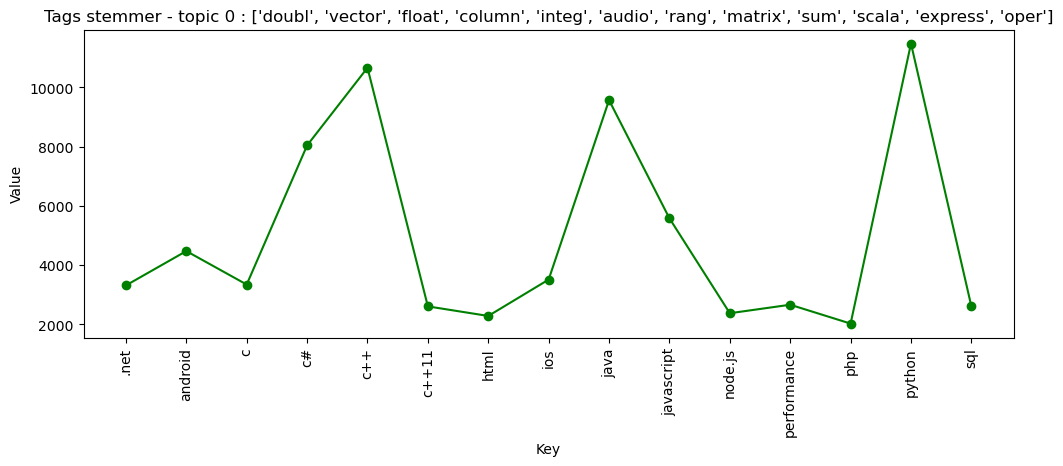



 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Topic 1 :  ['div', 'react', 'compon', 'label', 'titl', 'cell', 'swift', 'grid', 'li', 'bind', 'render', 'span'] 

word = div , df_word.shape = (10987, 11)
word = div , _Tag_1 = 4283 , _Tag_2 = 220
word = react , df_word.shape = (4978, 11)
word = react , _Tag_1 = 772 , _Tag_2 = 89
word = compon , df_word.shape = (6262, 11)
word = compon , _Tag_1 = 8582 , _Tag_2 = 5814
word = label , df_word.shape = (4800, 11)
word = label , _Tag_1 = 1237 , _Tag_2 = 296
word = titl , df_word.shape = (8496, 11)
word = titl , _Tag_1 = 673 , _Tag_2 = 10076
word = cell , df_word.shape = (2408, 11)
word = cell , _Tag_1 = 547 , _Tag_2 = 278
word = swift , df_word.shape = (3051, 11)
word = swift , _Tag_1 = 11503 , _Tag_2 = 358
word = grid , df_word.shape = (2307, 11)
word = grid , _Tag_1 = 860 , _Tag_2 = 12190
word = li , df_word.shape = (98868, 11)
word = li , _Tag_1 = 8933 , _Tag_2 = 45156
word = bind , df_

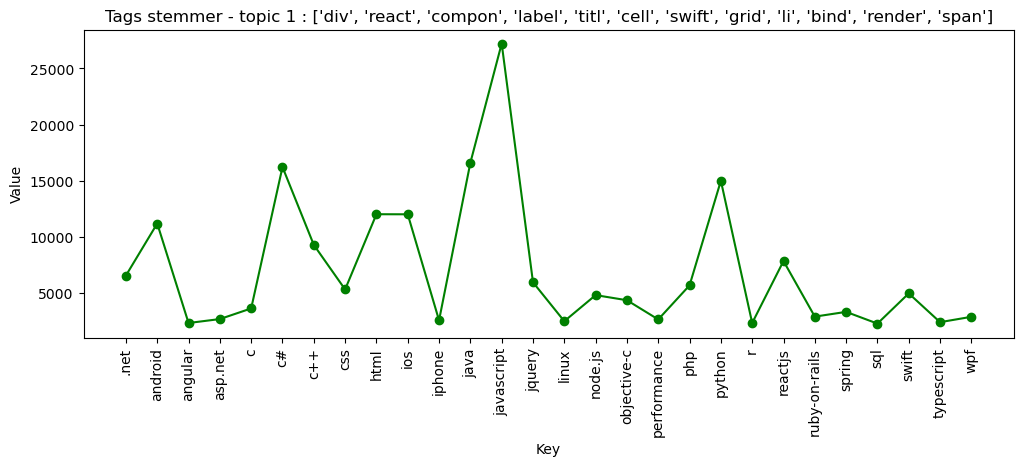



 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Topic 2 :  ['android', 'activ', 'anim', 'click', 'font', 'chrome', 'scroll', 'intent', 'overrid', 'canva', 'mobil', 'document'] 

word = android , df_word.shape = (14486, 11)
word = android , _Tag_1 = 12720 , _Tag_2 = 289
word = activ , df_word.shape = (9117, 11)
word = activ , _Tag_1 = 4737 , _Tag_2 = 148
word = anim , df_word.shape = (3543, 11)
word = anim , _Tag_1 = 2081 , _Tag_2 = 272
word = click , df_word.shape = (8817, 11)
word = click , _Tag_1 = 536 , _Tag_2 = 13019
word = font , df_word.shape = (2882, 11)
word = font , _Tag_1 = 497 , _Tag_2 = 13918
word = chrome , df_word.shape = (6233, 11)
word = chrome , _Tag_1 = 2143 , _Tag_2 = 428
word = scroll , df_word.shape = (2758, 11)
word = scroll , _Tag_1 = 5041 , _Tag_2 = 2298
word = intent , df_word.shape = (2437, 11)
word = intent , _Tag_1 = 1010 , _Tag_2 = 336
word = overrid , df_word.shape = (9165, 11)
word = overrid , _Tag_1

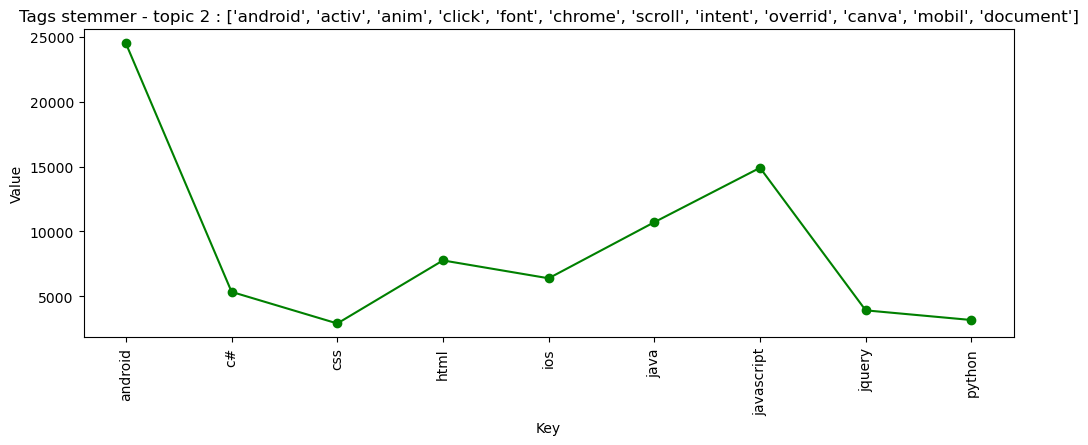



 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Topic 3 :  ['token', 'password', 'authent', 'login', 'secur', 'certif', 'train', 'author', 'account', 'plot', 'proxi', 'domain'] 

word = token , df_word.shape = (5035, 11)
word = token , _Tag_1 = 209 , _Tag_2 = 1638
word = password , df_word.shape = (7024, 11)
word = password , _Tag_1 = 1633 , _Tag_2 = 496
word = authent , df_word.shape = (5656, 11)
word = authent , _Tag_1 = 1045 , _Tag_2 = 317
word = login , df_word.shape = (5487, 11)
word = login , _Tag_1 = 684 , _Tag_2 = 266
word = secur , df_word.shape = (7033, 11)
word = secur , _Tag_1 = 1305 , _Tag_2 = 309
word = certif , df_word.shape = (2089, 11)
word = certif , _Tag_1 = 431 , _Tag_2 = 78
word = train , df_word.shape = (3794, 11)
word = train , _Tag_1 = 3793 , _Tag_2 = 166
word = author , df_word.shape = (4913, 11)
word = author , _Tag_1 = 884 , _Tag_2 = 385
word = account , df_word.shape = (3690, 11)
word = account , _Tag_1

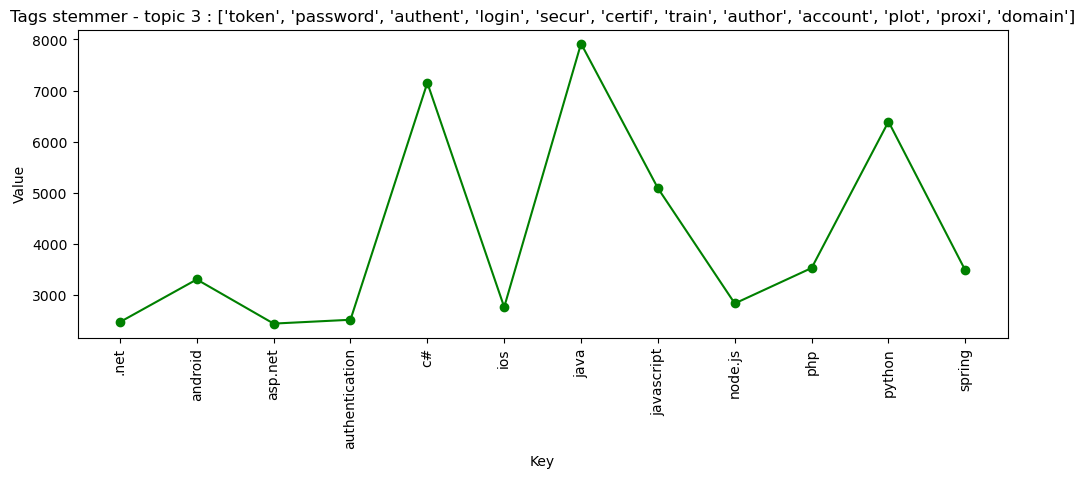



 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Topic 4 :  ['entiti', 'asp', 'git', 'control', 'column', 'session', 'valid', 'person', 'tabl', 'rout', 'repositori', 'schema'] 

word = entiti , df_word.shape = (5349, 11)
word = entiti , _Tag_1 = 526 , _Tag_2 = 199
word = asp , df_word.shape = (7744, 11)
word = asp , _Tag_1 = 5247 , _Tag_2 = 1721
word = git , df_word.shape = (4928, 11)
word = git , _Tag_1 = 278 , _Tag_2 = 160
word = control , df_word.shape = (7974, 11)
word = control , _Tag_1 = 951 , _Tag_2 = 6639
word = column , df_word.shape = (7995, 11)
word = column , _Tag_1 = 2668 , _Tag_2 = 192
word = session , df_word.shape = (6052, 11)
word = session , _Tag_1 = 575 , _Tag_2 = 10643
word = valid , df_word.shape = (5262, 11)
word = valid , _Tag_1 = 4224 , _Tag_2 = 465
word = person , df_word.shape = (2907, 11)
word = person , _Tag_1 = 1682 , _Tag_2 = 793
word = tabl , df_word.shape = (8936, 11)
word = tabl , _Tag_1 = 1462 , _T

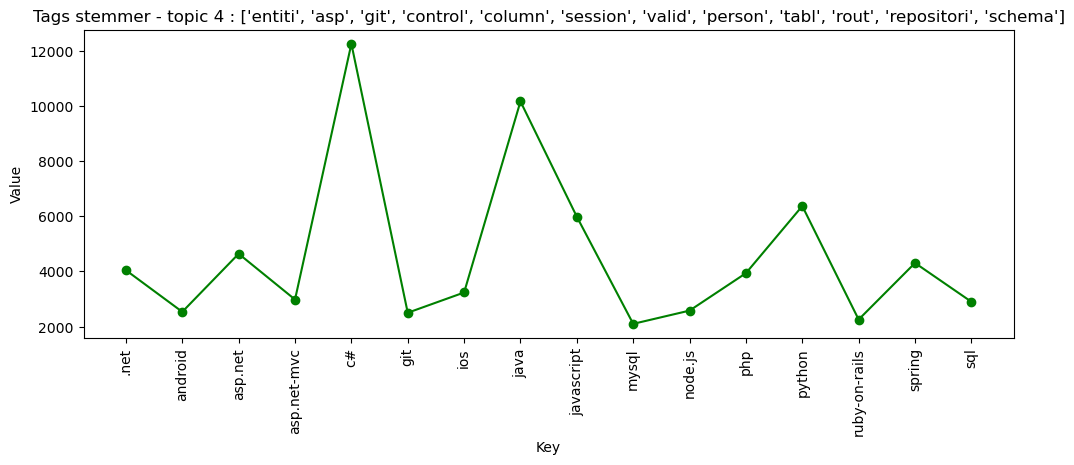



 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Topic 5 :  ['studio', 'visual', 'docker', 'angular', 'rubi', 'chrome', 'selenium', 'bash', 'browser', 'mac', 'shell', 'echo'] 

word = studio , df_word.shape = (7922, 11)
word = studio , _Tag_1 = 1851 , _Tag_2 = 126
word = visual , df_word.shape = (7201, 11)
word = visual , _Tag_1 = 234 , _Tag_2 = 36
word = docker , df_word.shape = (2165, 11)
word = docker , _Tag_1 = 309 , _Tag_2 = 46
word = angular , df_word.shape = (4145, 11)
word = angular , _Tag_1 = 1566 , _Tag_2 = 102
word = rubi , df_word.shape = (2827, 11)
word = rubi , _Tag_1 = 1535 , _Tag_2 = 1557
word = chrome , df_word.shape = (6233, 11)
word = chrome , _Tag_1 = 1420 , _Tag_2 = 291
word = selenium , df_word.shape = (1496, 11)
word = selenium , _Tag_1 = 1953 , _Tag_2 = 939
word = bash , df_word.shape = (2317, 11)
word = bash , _Tag_1 = 1011 , _Tag_2 = 266
word = browser , df_word.shape = (8799, 11)
word = browser , _Tag_1 =

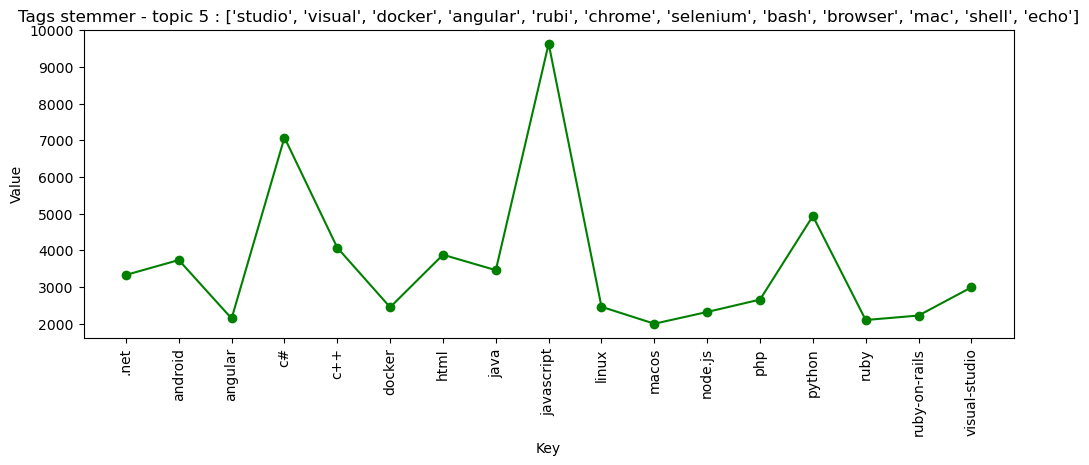



 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Topic 6 :  ['char', 'assembl', 'boost', 'oper', 'gener', 'lock', 'pointer', 'queue', 'clang', 'await', 'link', 'free'] 

word = char , df_word.shape = (6521, 11)
word = char , _Tag_1 = 239 , _Tag_2 = 9
word = assembl , df_word.shape = (3605, 11)
word = assembl , _Tag_1 = 2733 , _Tag_2 = 505
word = boost , df_word.shape = (1622, 11)
word = boost , _Tag_1 = 4103 , _Tag_2 = 465
word = oper , df_word.shape = (12292, 11)
word = oper , _Tag_1 = 2167 , _Tag_2 = 431
word = gener , df_word.shape = (12765, 11)
word = gener , _Tag_1 = 379 , _Tag_2 = 12686
word = lock , df_word.shape = (5934, 11)
word = lock , _Tag_1 = 4766 , _Tag_2 = 1154
word = pointer , df_word.shape = (3331, 11)
word = pointer , _Tag_1 = 10037 , _Tag_2 = 15647
word = queue , df_word.shape = (2454, 11)
word = queue , _Tag_1 = 2442 , _Tag_2 = 634
word = clang , df_word.shape = (2237, 11)
word = clang , _Tag_1 = 636 , _Tag_2 = 

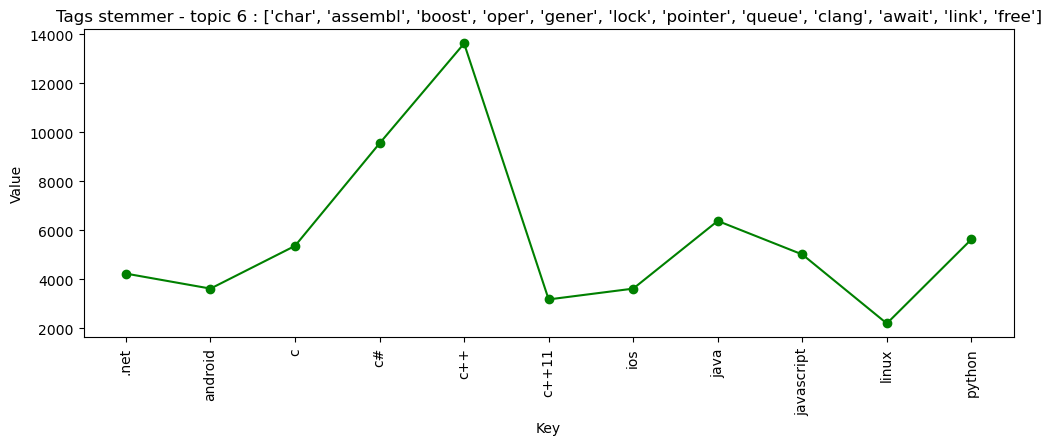



 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Topic 7 :  ['spring', 'eclips', 'jar', 'apach', 'hibern', 'boot', 'depend', 'bean', 'annot', 'mock', 'tomcat', 'sun'] 

word = spring , df_word.shape = (6634, 11)
word = spring , _Tag_1 = 4796 , _Tag_2 = 24
word = eclips , df_word.shape = (3357, 11)
word = eclips , _Tag_1 = 6775 , _Tag_2 = 309
word = jar , df_word.shape = (3631, 11)
word = jar , _Tag_1 = 1490 , _Tag_2 = 252
word = apach , df_word.shape = (4944, 11)
word = apach , _Tag_1 = 11582 , _Tag_2 = 1146
word = hibern , df_word.shape = (2580, 11)
word = hibern , _Tag_1 = 1435 , _Tag_2 = 269
word = boot , df_word.shape = (6094, 11)
word = boot , _Tag_1 = 2637 , _Tag_2 = 5575
word = depend , df_word.shape = (9300, 11)
word = depend , _Tag_1 = 331 , _Tag_2 = 112
word = bean , df_word.shape = (2467, 11)
word = bean , _Tag_1 = 19311 , _Tag_2 = 1746
word = annot , df_word.shape = (3161, 11)
word = annot , _Tag_1 = 3062 , _Tag_2 = 474

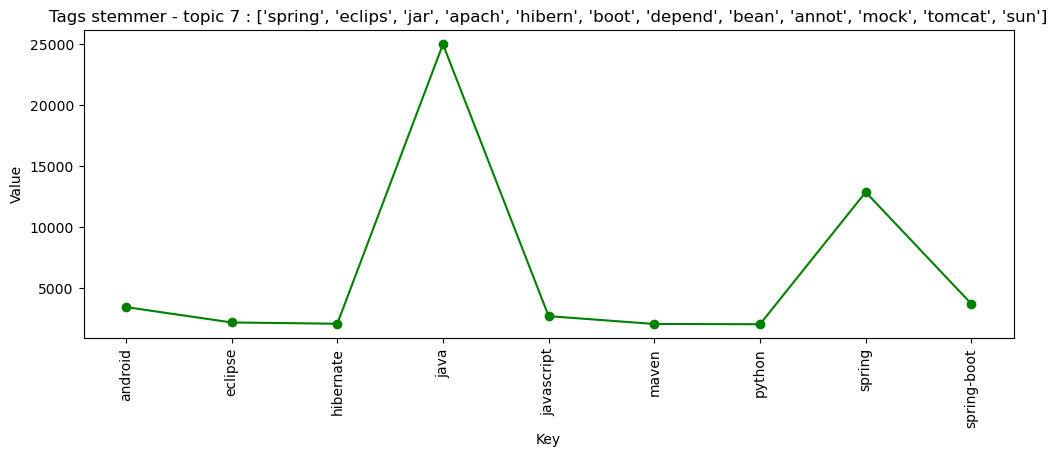

In [186]:
# graphique
graphique_topic_modeling_with_LDA(normalization_type_in = 'stemmer', 
                                  num_word_per_topic_in = 12, 
                                  lda_components_in     = lda_components_stemmer, 
                                  terms_in              = terms_stemmer)

In [ ]:
##################################################################
# ANALYSE GRAPHIQUE STEMMER :                                    #
# Synthèse des 5 premiers tags fournis par LDA pour chaque topic #
##################################################################
#
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# Topic 0 :  ['doubl', 'vector', 'float', 'column', 'integ', 'audio', 'rang', 'matrix', 'sum', 'scala', 'express', 'oper'] 
#
# ('python',     11482)
# ('c++',        10666)
# ('java',        9573)
# ('c#',          8045)
# ('javascript',  5584)
#
#
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# Topic 1 :  ['div', 'react', 'compon', 'label', 'titl', 'cell', 'swift', 'grid', 'li', 'bind', 'render', 'span'] 
#
# ('javascript', 27215)
# ('java',       16609)
# ('c#',         16225)
# ('python',     15002)
# ('html',       12023)
#
#
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# Topic 2 :  ['android', 'activ', 'anim', 'click', 'font', 'chrome', 'scroll', 'intent', 'overrid', 'canva', 'mobil', 
#             'document'] 
#
# ('android',    24496)
# ('javascript', 14907)
# ('java',       10711)
# ('html',        7763)
# ('ios',         6385)
# 
#
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# Topic 3 :  ['token', 'password', 'authent', 'login', 'secur', 'certif', 'train', 'author', 'account', 'plot', 'proxi',
#             'domain'] 
#
# ('java',       7918)
# ('c#',         7150)
# ('python',     6391)
# ('javascript', 5088)
# ('php',        3527)
#
#
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# Topic 4 :  ['entiti', 'asp', 'git', 'control', 'column', 'session', 'valid', 'person', 'tabl', 'rout', 'repositori',
#             'schema'] 
#
# ('c#',        12242)
# ('java',      10155)
# ('python',     6365)
# ('javascript', 5978)
# ('asp.net',    4636)
# 
#
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# Topic 5 :  ['studio', 'visual', 'docker', 'angular', 'rubi', 'chrome', 'selenium', 'bash', 'browser', 'mac', 'shell',
#             'echo'] 
#
# ('javascript', 9629)
# ('c#',         7074)
# ('python',     4935)
# ('c++',        4073)
# ('html',       3881)
#
#
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# Topic 6 :  ['char', 'assembl', 'boost', 'oper', 'gener', 'lock', 'pointer', 'queue', 'clang', 'await', 'link', 'free'] 
#
# ('c++',   13622)
# ('c#',     9548)
# ('java',   6385)
# ('python', 5633)
# ('c',      5367)
#
#
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# Topic 7 :  ['spring', 'eclips', 'jar', 'apach', 'hibern', 'boot', 'depend', 'bean', 'annot', 'mock', 'tomcat', 'sun'] 
#
# ('java',        25012)
# ('spring',      12872)
# ('spring-boot',  3703)
# ('android',      3438)
# ('javascript',   2693)

In [ ]:
####################################
# LDA corpus lemma                 #
####################################

In [179]:
lda_components_lemma, terms_lemma = topic_modeling_with_LDA(normalization_type_in = 'lemma',
                                                            num_components_in     = 8, 
                                                            num_word_per_topic_in = 12, 
                                                            tfidfvectorizer_in    = tfidfvectorizer_lemma, 
                                                            train_data_in         = train_data_lemma) # 6 min

Topic 0 :  ['token', 'password', 'asp', 'session', 'login', 'authentication', 'spring', 'security', 'visual', 'studio', 'certificate', 'controller']
Topic 1 :  ['matrix', 'float', 'double', 'plot', 'range', 'vector', 'sum', 'shape', 'algorithm', 'spark', 'train', 'column']
Topic 2 :  ['git', 'chrome', 'apache', 'eclipse', 'browser', 'jar', 'ruby', 'selenium', 'site', 'driver', 'dependency', 'remote']
Topic 3 :  ['char', 'pointer', 'operator', 'clang', 'boost', 'expression', 'constructor', 'vector', 'member', 'bool', 'assembly', 'generic']
Topic 4 :  ['div', 'font', 'swift', 'cell', 'click', 'scroll', 'grid', 'label', 'binding', 'title', 'nil', 'menu']
Topic 5 :  ['android', 'docker', 'play', 'audio', 'activity', 'intent', 'studio', 'camera', 'player', 'phone', 'permission', 'emulator']
Topic 6 :  ['column', 'entity', 'hibernate', 'spring', 'div', 'schema', 'product', 'person', 'validation', 'table', 'group', 'annotation']
Topic 7 :  ['react', 'angular', 'component', 'mock', 'export', '

C:\Users\valdu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)




 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Topic 0 :  ['token', 'password', 'asp', 'session', 'login', 'authentication', 'spring', 'security', 'visual', 'studio', 'certificate', 'controller'] 

word = token , df_word.shape = (5035, 11)
word = token , _Tag_1 = 209 , _Tag_2 = 1638
word = password , df_word.shape = (7024, 11)
word = password , _Tag_1 = 1633 , _Tag_2 = 496
word = asp , df_word.shape = (7744, 11)
word = asp , _Tag_1 = 5294 , _Tag_2 = 1664
word = session , df_word.shape = (6054, 11)
word = session , _Tag_1 = 188 , _Tag_2 = 7043
word = login , df_word.shape = (5487, 11)
word = login , _Tag_1 = 659 , _Tag_2 = 273
word = authentication , df_word.shape = (4645, 11)
word = authentication , _Tag_1 = 1798 , _Tag_2 = 438
word = spring , df_word.shape = (6637, 11)
word = spring , _Tag_1 = 9422 , _Tag_2 = 159
word = security , df_word.shape = (5465, 11)
word = security , _Tag_1 = 1760 , _Tag_2 = 469
word = visual , df_word.s

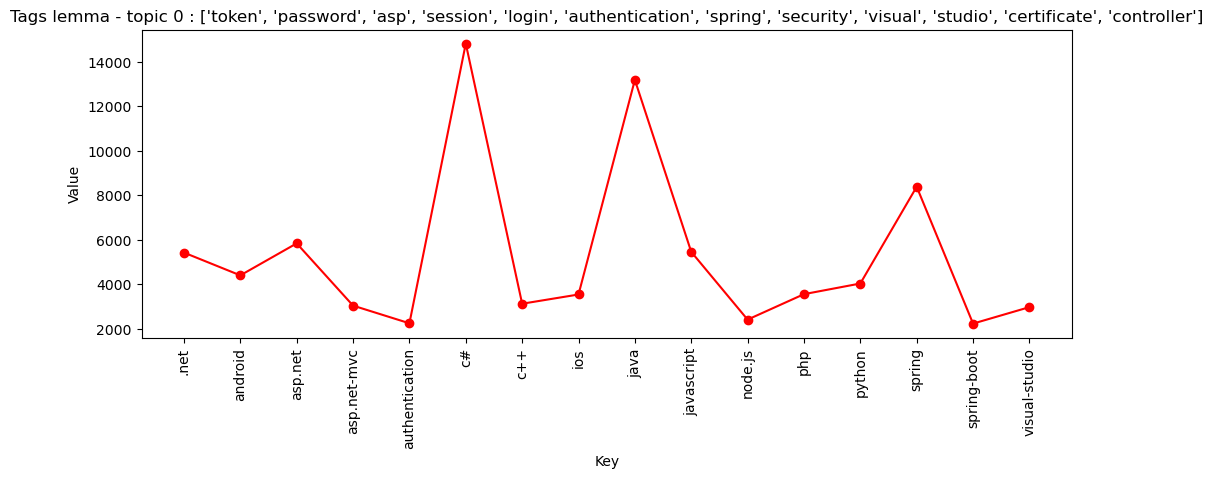



 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Topic 1 :  ['matrix', 'float', 'double', 'plot', 'range', 'vector', 'sum', 'shape', 'algorithm', 'spark', 'train', 'column'] 

word = matrix , df_word.shape = (2197, 11)
word = matrix , _Tag_1 = 114 , _Tag_2 = 283
word = float , df_word.shape = (4009, 11)
word = float , _Tag_1 = 1712 , _Tag_2 = 2380
word = double , df_word.shape = (4515, 11)
word = double , _Tag_1 = 1186 , _Tag_2 = 824
word = plot , df_word.shape = (2209, 11)
word = plot , _Tag_1 = 952 , _Tag_2 = 5188
word = range , df_word.shape = (8336, 11)
word = range , _Tag_1 = 5719 , _Tag_2 = 966
word = vector , df_word.shape = (3219, 11)
word = vector , _Tag_1 = 1366 , _Tag_2 = 1174
word = sum , df_word.shape = (14088, 11)
word = sum , _Tag_1 = 1943 , _Tag_2 = 583
word = shape , df_word.shape = (2540, 11)
word = shape , _Tag_1 = 4012 , _Tag_2 = 15122
word = algorithm , df_word.shape = (3436, 11)
word = algorithm , _Tag_1 = 102

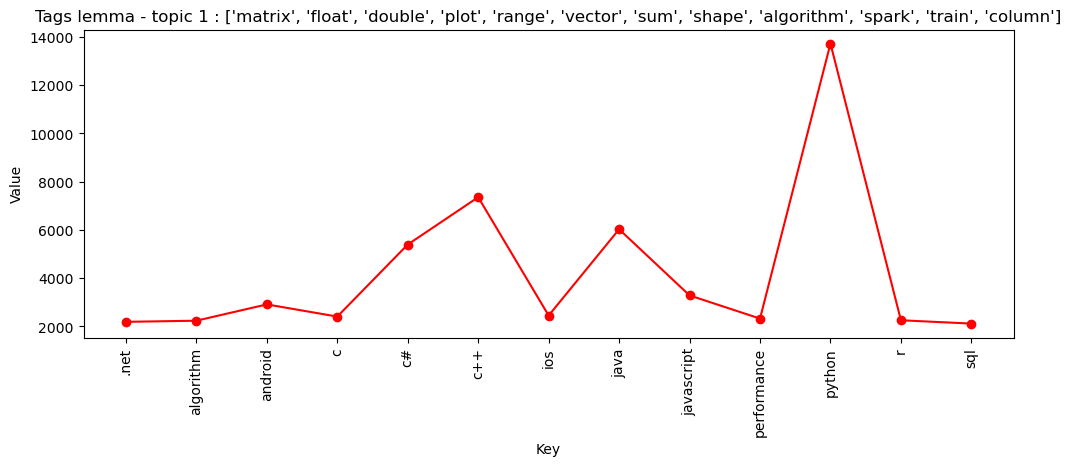



 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Topic 2 :  ['git', 'chrome', 'apache', 'eclipse', 'browser', 'jar', 'ruby', 'selenium', 'site', 'driver', 'dependency', 'remote'] 

word = git , df_word.shape = (4928, 11)
word = git , _Tag_1 = 206 , _Tag_2 = 128
word = chrome , df_word.shape = (6256, 11)
word = chrome , _Tag_1 = 849 , _Tag_2 = 238
word = apache , df_word.shape = (4944, 11)
word = apache , _Tag_1 = 3051 , _Tag_2 = 508
word = eclipse , df_word.shape = (3357, 11)
word = eclipse , _Tag_1 = 5030 , _Tag_2 = 709
word = browser , df_word.shape = (8799, 11)
word = browser , _Tag_1 = 530 , _Tag_2 = 399
word = jar , df_word.shape = (3631, 11)
word = jar , _Tag_1 = 2982 , _Tag_2 = 305
word = ruby , df_word.shape = (2827, 11)
word = ruby , _Tag_1 = 1978 , _Tag_2 = 1810
word = selenium , df_word.shape = (1496, 11)
word = selenium , _Tag_1 = 2603 , _Tag_2 = 1220
word = site , df_word.shape = (8813, 11)
word = site , _Tag_1 = 2294 

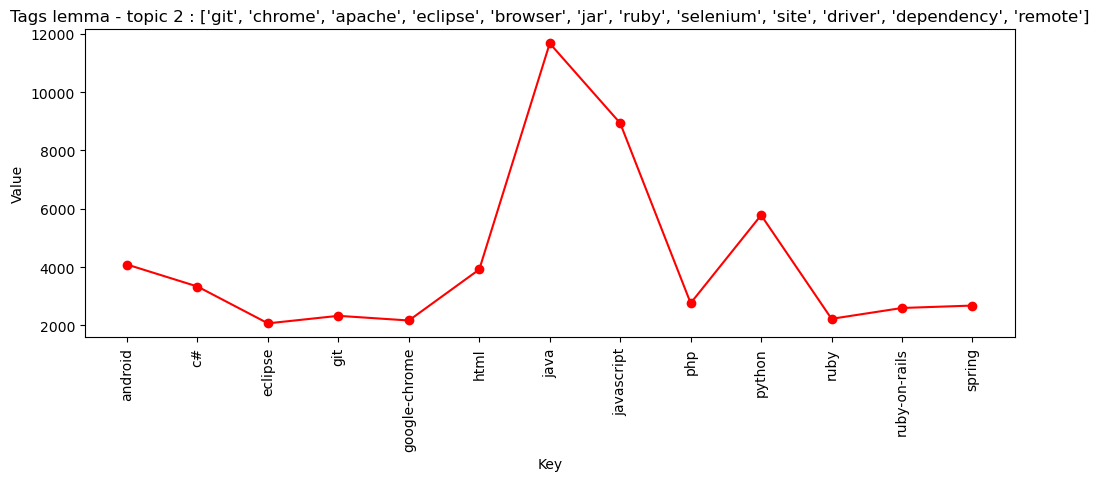



 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Topic 3 :  ['char', 'pointer', 'operator', 'clang', 'boost', 'expression', 'constructor', 'vector', 'member', 'bool', 'assembly', 'generic'] 

word = char , df_word.shape = (6521, 11)
word = char , _Tag_1 = 239 , _Tag_2 = 9
word = pointer , df_word.shape = (3331, 11)
word = pointer , _Tag_1 = 3802 , _Tag_2 = 3365
word = operator , df_word.shape = (2755, 11)
word = operator , _Tag_1 = 5282 , _Tag_2 = 4400
word = clang , df_word.shape = (2237, 11)
word = clang , _Tag_1 = 83 , _Tag_2 = 74
word = boost , df_word.shape = (1622, 11)
word = boost , _Tag_1 = 8256 , _Tag_2 = 681
word = expression , df_word.shape = (3274, 11)
word = expression , _Tag_1 = 1335 , _Tag_2 = 26
word = constructor , df_word.shape = (5226, 11)
word = constructor , _Tag_1 = 10038 , _Tag_2 = 8454
word = vector , df_word.shape = (3219, 11)
word = vector , _Tag_1 = 1979 , _Tag_2 = 766
word = member , df_word.shape = (428

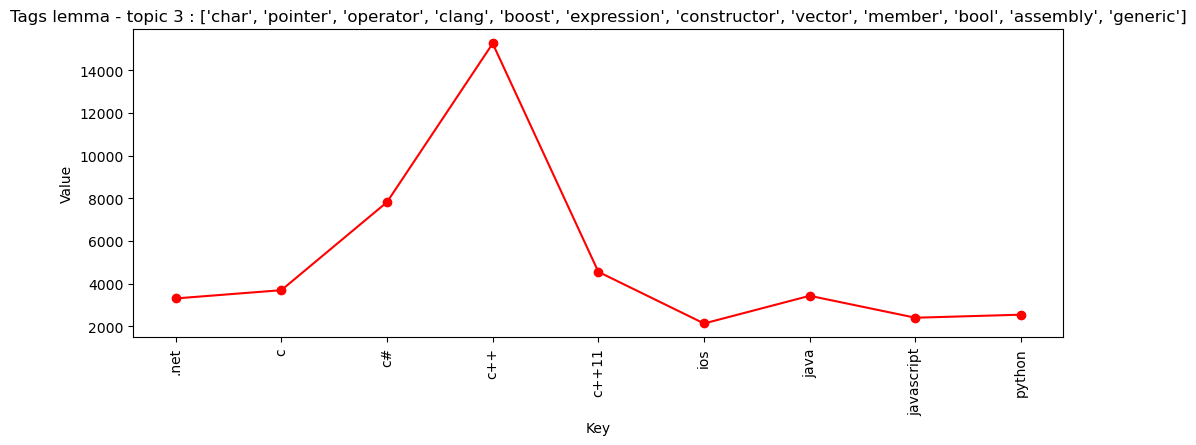



 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Topic 4 :  ['div', 'font', 'swift', 'cell', 'click', 'scroll', 'grid', 'label', 'binding', 'title', 'nil', 'menu'] 

word = div , df_word.shape = (10987, 11)
word = div , _Tag_1 = 4283 , _Tag_2 = 220
word = font , df_word.shape = (2882, 11)
word = font , _Tag_1 = 793 , _Tag_2 = 3390
word = swift , df_word.shape = (3051, 11)
word = swift , _Tag_1 = 4944 , _Tag_2 = 185
word = cell , df_word.shape = (2946, 11)
word = cell , _Tag_1 = 261 , _Tag_2 = 143
word = click , df_word.shape = (8817, 11)
word = click , _Tag_1 = 378 , _Tag_2 = 7188
word = scroll , df_word.shape = (2758, 11)
word = scroll , _Tag_1 = 5772 , _Tag_2 = 2583
word = grid , df_word.shape = (2307, 11)
word = grid , _Tag_1 = 462 , _Tag_2 = 8922
word = label , df_word.shape = (4800, 11)
word = label , _Tag_1 = 5492 , _Tag_2 = 3183
word = binding , df_word.shape = (3155, 11)
word = binding , _Tag_1 = 3009 , _Tag_2 = 70
word = t

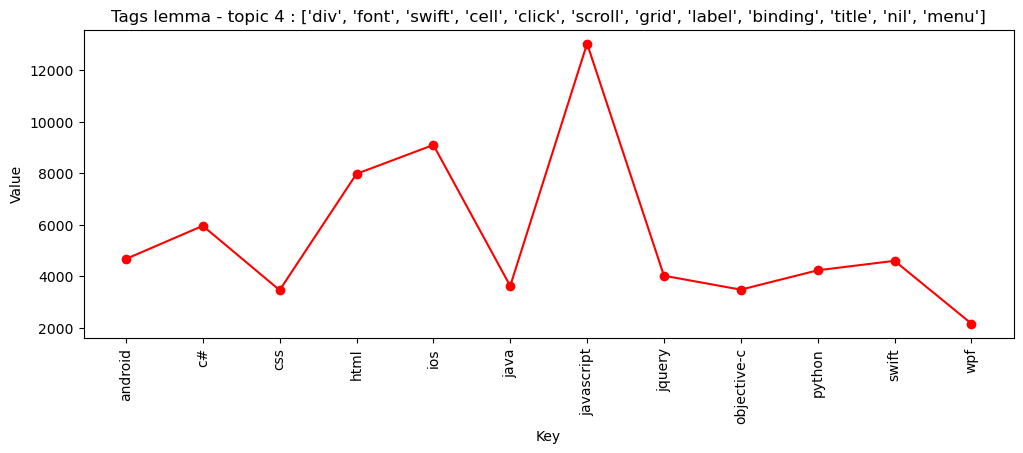



 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Topic 5 :  ['android', 'docker', 'play', 'audio', 'activity', 'intent', 'studio', 'camera', 'player', 'phone', 'permission', 'emulator'] 

word = android , df_word.shape = (14486, 11)
word = android , _Tag_1 = 12720 , _Tag_2 = 289
word = docker , df_word.shape = (2165, 11)
word = docker , _Tag_1 = 274 , _Tag_2 = 81
word = play , df_word.shape = (7836, 11)
word = play , _Tag_1 = 14452 , _Tag_2 = 381
word = audio , df_word.shape = (1721, 11)
word = audio , _Tag_1 = 2215 , _Tag_2 = 126
word = activity , df_word.shape = (3891, 11)
word = activity , _Tag_1 = 17939 , _Tag_2 = 405
word = intent , df_word.shape = (2437, 11)
word = intent , _Tag_1 = 525 , _Tag_2 = 141
word = studio , df_word.shape = (7922, 11)
word = studio , _Tag_1 = 21321 , _Tag_2 = 545
word = camera , df_word.shape = (1512, 11)
word = camera , _Tag_1 = 21850 , _Tag_2 = 547
word = player , df_word.shape = (1271, 11)
word = 

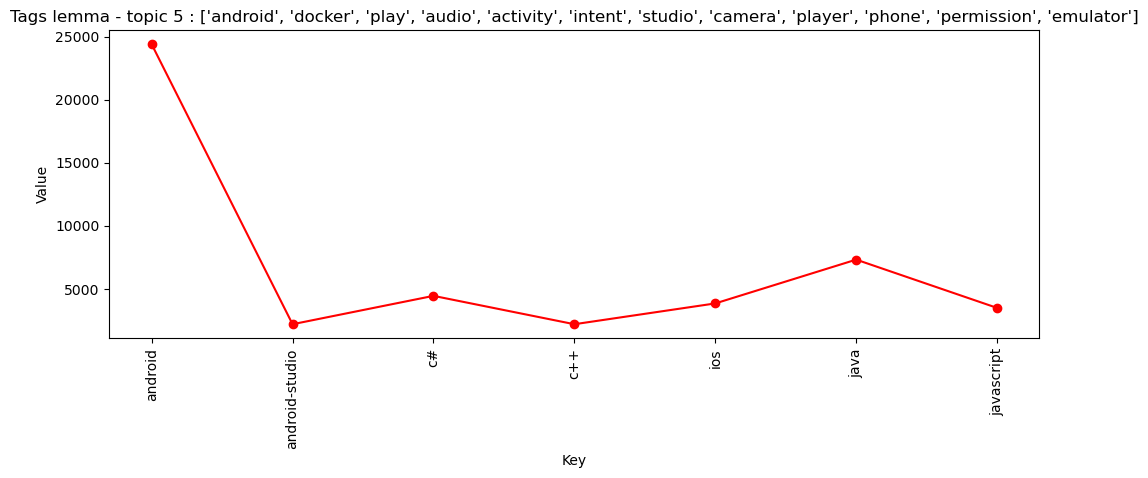



 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Topic 6 :  ['column', 'entity', 'hibernate', 'spring', 'div', 'schema', 'product', 'person', 'validation', 'table', 'group', 'annotation'] 

word = column , df_word.shape = (7995, 11)
word = column , _Tag_1 = 1820 , _Tag_2 = 72
word = entity , df_word.shape = (7230, 11)
word = entity , _Tag_1 = 813 , _Tag_2 = 286
word = hibernate , df_word.shape = (2577, 11)
word = hibernate , _Tag_1 = 1744 , _Tag_2 = 427
word = spring , df_word.shape = (6637, 11)
word = spring , _Tag_1 = 9660 , _Tag_2 = 92
word = div , df_word.shape = (10987, 11)
word = div , _Tag_1 = 5017 , _Tag_2 = 398
word = schema , df_word.shape = (3057, 11)
word = schema , _Tag_1 = 3159 , _Tag_2 = 8122
word = product , df_word.shape = (5915, 11)
word = product , _Tag_1 = 738 , _Tag_2 = 10153
word = person , df_word.shape = (2907, 11)
word = person , _Tag_1 = 1162 , _Tag_2 = 514
word = validation , df_word.shape = (3140, 11)
wo

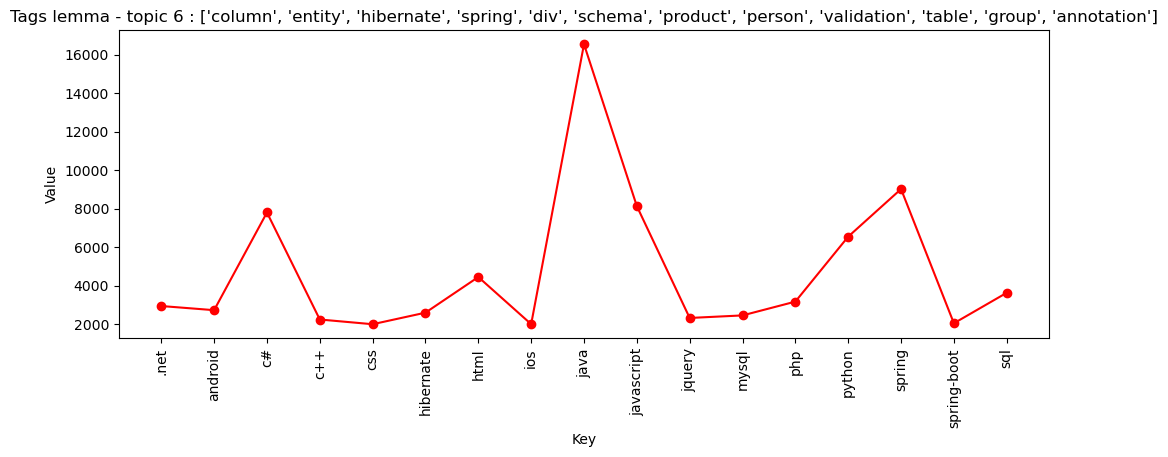



 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Topic 7 :  ['react', 'angular', 'component', 'mock', 'export', 'typescript', 'err', 'prop', 'loader', 'fragment', 'router', 'div'] 

word = react , df_word.shape = (4978, 11)
word = react , _Tag_1 = 207 , _Tag_2 = 25
word = angular , df_word.shape = (4145, 11)
word = angular , _Tag_1 = 1516 , _Tag_2 = 137
word = component , df_word.shape = (6261, 11)
word = component , _Tag_1 = 5989 , _Tag_2 = 4164
word = mock , df_word.shape = (2160, 11)
word = mock , _Tag_1 = 335 , _Tag_2 = 94
word = export , df_word.shape = (5209, 11)
word = export , _Tag_1 = 225 , _Tag_2 = 6185
word = typescript , df_word.shape = (1651, 11)
word = typescript , _Tag_1 = 3477 , _Tag_2 = 6530
word = err , df_word.shape = (15731, 11)
word = err , _Tag_1 = 1989 , _Tag_2 = 887
word = prop , df_word.shape = (8993, 11)
word = prop , _Tag_1 = 1743 , _Tag_2 = 15047
word = loader , df_word.shape = (1950, 11)
word = loader ,

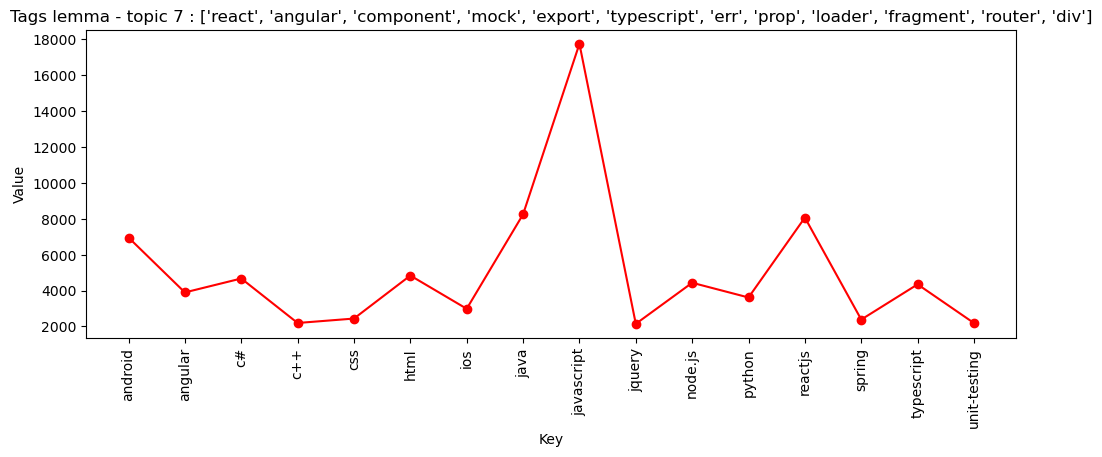

In [187]:
# graphique
graphique_topic_modeling_with_LDA(normalization_type_in = 'lemma', 
                                  num_word_per_topic_in = 12, 
                                  lda_components_in     = lda_components_lemma, 
                                  terms_in              = terms_lemma)

In [ ]:
##################################################################
# ANALYSE GRAPHIQUE LEMMA :                                      #
# Synthèse des 5 premiers tags fournis par LDA pour chaque topic #
##################################################################
#
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# Topic 0 :  ['token', 'password', 'asp', 'session', 'login', 'authentication', 'spring', 'security', 'visual', 'studio',
#             'certificate', 'controller'] 
# 
# ('c#',        14811)
# ('java',      13179)
# ('spring',     8377)
# ('asp.net',    5832)
# ('javascript', 5451) 
# 
# 
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# Topic 1 :  ['matrix', 'float', 'double', 'plot', 'range', 'vector', 'sum', 'shape', 'algorithm', 'spark', 'train', 
#             'column'] 
# 
# ('python',   13722)
# ('c++',       7357)
# ('java',       6028)
# ('c#',         5395)
# ('javascript', 3287)
# 
# 
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# Topic 2 :  ['git', 'chrome', 'apache', 'eclipse', 'browser', 'jar', 'ruby', 'selenium', 'site', 'driver', 'dependency', 
#             'remote'] 
# 
# ('java',       11671)
# ('javascript',  8933)
# ('python',      5778)
# ('android',     4085)
# ('html',        3917)
# 
# 
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# Topic 3 :  ['char', 'pointer', 'operator', 'clang', 'boost', 'expression', 'constructor', 'vector', 'member', 'bool', 
#             'assembly', 'generic'] 
# 
# ('c++',   15251)
# ('c#',     7817)
# ('c++11',  4549)
# ('c',      3690)
# ('java',   3427)
# 
# 
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# Topic 4 :  ['div', 'font', 'swift', 'cell', 'click', 'scroll', 'grid', 'label', 'binding', 'title', 'nil', 'menu'] 
# 
# ('javascript', 13034)
# ('ios',         9095)
# ('html',        7972)
# ('c#',          5953)
# ('android',     4665)
# 
# 
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# Topic 5 :  ['android', 'docker', 'play', 'audio', 'activity', 'intent', 'studio', 'camera', 'player', 'phone', 
#            'permission', 'emulator'] 
# 
# ('android',   24395)
# ('java',       7321)
# ('c#',         4449)
# ('ios',        3850)
# ('javascript', 3494)
# 
# 
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# Topic 6 :  ['column', 'entity', 'hibernate', 'spring', 'div', 'schema', 'product', 'person', 'validation', 'table', 
#             'group', 'annotation'] 
# 
# ('java',       16535)
# ('spring',      9020)
# ('javascript',  8134)
# ('c#',          7804)
# ('python',      6551)
#  
# 
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# Topic 7 :  ['react', 'angular', 'component', 'mock', 'export', 'typescript', 'err', 'prop', 'loader', 'fragment', 
#             'router', 'div'] 
# 
# ('javascript', 17751)
# ('java',        8246)
# ('reactjs',     8065)
# ('android',     6952)
# ('html',        4834)

In [ ]:
# => la pertinence du machine learning non supervisé est plutôt globale et imprécise.

# 2.2.2. METHODE 2

In [ ]:
# https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0
# Topic model : LDA
# ------------------------------------------------
# 1) Data transformation: Corpus and Dictionary
# 2) Base Model
# 3) Hyperparameter Tuning
# 4) Final Model
# 5) Visualize Results

In [13]:
#####################################################
#  1) Data Transformation : Corpus and Dictionary   #
#####################################################
# https://stackoverflow.com/questions/33229360/gensim-typeerror-doc2bow-expects-an-array-of-unicode-tokens-on-input-not-a-si
# The two main inputs to the LDA topic model are the dictionary (id2word) and the corpus.
def LDA_Data_Transformation(normalization_type_in, corpus_liste_in):
       
    # Create Dictionary
    id2word = corpora.Dictionary(corpus_liste_in)

    # Create Corpus
    texts = corpus_liste_in

    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]

    # View
    print('Term Document Frequency for', normalization_type_in, ':', corpus[:1][0][:30])
    
    return id2word, texts, corpus

In [14]:
# corpus_lemma = ' '.join(df['_Lemma_clean_final'])
id2word_lemma, texts_lemma, corpus_lemma = LDA_Data_Transformation(normalization_type_in = 'lemma',
                                                                   corpus_liste_in       = [token_lemma])

Term Document Frequency for lemma : [(0, 837), (1, 15), (2, 15), (3, 73), (4, 837), (5, 36), (6, 18), (7, 3), (8, 3), (9, 126), (10, 136), (11, 9), (12, 2), (13, 22), (14, 9), (15, 2), (16, 4), (17, 2), (18, 7), (19, 62), (20, 2), (21, 14), (22, 2), (23, 9), (24, 2), (25, 3), (26, 4), (27, 2), (28, 2), (29, 19)]


In [15]:
# corpus_stemmer = ' '.join(df['_Stemmer_clean_final'])
id2word_stemmer, texts_stemmer, corpus_stemmer = LDA_Data_Transformation(normalization_type_in = 'stemmer',
                                                                         corpus_liste_in       = [token_stemmer])

Term Document Frequency for stemmer : [(0, 837), (1, 15), (2, 15), (3, 73), (4, 837), (5, 36), (6, 18), (7, 3), (8, 3), (9, 262), (10, 9), (11, 2), (12, 22), (13, 11), (14, 4), (15, 2), (16, 2), (17, 69), (18, 16), (19, 9), (20, 2), (21, 7), (22, 2), (23, 2), (24, 6), (25, 25), (26, 3), (27, 1395), (28, 128), (29, 16)]


In [16]:
#####################################################
# 2) Base Model                                     #
#####################################################
def LDA_Base_Model(normalization_type_in, corpus_in, id2word_in):
    
    # Build LDA model
    lda_model = gensim.models.LdaMulticore(corpus          = corpus_in,
                                           id2word         = id2word_in,
                                           num_topics      = 10, 
                                           random_state    = 100,
                                           chunksize       = 100,
                                           passes          = 10,
                                           per_word_topics = True)

    # View the topics in LDA model
    # Print the Keyword in the 10 topics
    print('10 topics in LDA model for', normalization_type_in, ':')
    pprint(lda_model.print_topics())
    doc_lda = lda_model[corpus_in]
    
    return lda_model

In [18]:
lda_model_lemma = LDA_Base_Model(normalization_type_in = 'lemma',
                                 corpus_in             = corpus_lemma,
                                 id2word_in            = id2word_lemma)

10 topics in LDA model for lemma :
[(0,
  '0.021*"android" + 0.007*"div" + 0.005*"spring" + 0.005*"apache" + '
  '0.004*"override" + 0.004*"jar" + 0.004*"component" + 0.004*"column" + '
  '0.004*"site" + 0.003*"security"'),
 (1,
  '0.016*"android" + 0.007*"div" + 0.005*"apache" + 0.005*"spring" + '
  '0.004*"site" + 0.004*"jar" + 0.004*"react" + 0.003*"release" + '
  '0.003*"browser" + 0.003*"label"'),
 (2,
  '0.020*"android" + 0.007*"div" + 0.006*"apache" + 0.005*"spring" + '
  '0.004*"jar" + 0.004*"title" + 0.004*"session" + 0.004*"override" + '
  '0.003*"dependency" + 0.003*"security"'),
 (3,
  '0.022*"android" + 0.008*"div" + 0.005*"apache" + 0.004*"jar" + '
  '0.004*"password" + 0.004*"action" + 0.004*"column" + 0.003*"title" + '
  '0.003*"spring" + 0.003*"final"'),
 (4,
  '0.019*"android" + 0.006*"div" + 0.005*"spring" + 0.004*"session" + '
  '0.004*"react" + 0.004*"jar" + 0.004*"apache" + 0.003*"controller" + '
  '0.003*"security" + 0.003*"title"'),
 (5,
  '0.025*"android" + 0.0

In [19]:
lda_model_stemmer = LDA_Base_Model(normalization_type_in = 'stemmer',
                                   corpus_in             = corpus_stemmer,
                                   id2word_in            = id2word_stemmer)

10 topics in LDA model for stemmer :
[(0,
  '0.021*"android" + 0.007*"div" + 0.006*"jar" + 0.005*"apach" + 0.004*"activ" '
  '+ 0.004*"password" + 0.004*"token" + 0.004*"session" + 0.004*"titl" + '
  '0.004*"secur"'),
 (1,
  '0.023*"android" + 0.008*"div" + 0.005*"jar" + 0.004*"apach" + '
  '0.004*"spring" + 0.004*"activ" + 0.004*"depend" + 0.004*"releas" + '
  '0.003*"password" + 0.003*"react"'),
 (2,
  '0.018*"android" + 0.007*"div" + 0.006*"apach" + 0.005*"spring" + '
  '0.005*"final" + 0.005*"jar" + 0.004*"activ" + 0.004*"column" + 0.003*"site" '
  '+ 0.003*"action"'),
 (3,
  '0.021*"android" + 0.009*"div" + 0.005*"apach" + 0.004*"secur" + '
  '0.004*"spring" + 0.004*"activ" + 0.004*"jar" + 0.004*"control" + '
  '0.003*"final" + 0.003*"product"'),
 (4,
  '0.021*"android" + 0.009*"div" + 0.005*"apach" + 0.005*"jar" + 0.004*"final" '
  '+ 0.004*"secur" + 0.004*"activ" + 0.004*"spring" + 0.004*"session" + '
  '0.004*"site"'),
 (5,
  '0.014*"android" + 0.006*"div" + 0.006*"spring" + 0.

In [51]:
####################################################
#   Compute Model Perplexity and Coherence Score   #
####################################################
def LDA_Coherence_Score(normalization_type_in, lda_model_in, corpus_liste_in, id2word_in):
    
    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model      = lda_model_in, 
                                         texts      = corpus_liste_in, 
                                         dictionary = id2word_in, 
                                         coherence  = 'c_v')

    coherence_lda = coherence_model_lda.get_coherence()
    print('Coherence Score for', normalization_type_in, ':', coherence_lda)

In [26]:
LDA_Coherence_Score(normalization_type_in = 'lemma',
                    lda_model_in          = lda_model_lemma, 
                    corpus_liste_in       = [token_lemma], 
                    id2word_in            = id2word_lemma)

Coherence Score for lemma : 0.3067311449555698


In [52]:
LDA_Coherence_Score(normalization_type_in = 'stemmer',
                    lda_model_in          = lda_model_stemmer, 
                    corpus_liste_in       = [token_stemmer], 
                    id2word_in            = id2word_stemmer)

Coherence Score for stemmer : 0.29796233974032593


In [ ]:
#####################################################
# 3) Hyperparameter Tuning                          #
#####################################################
#   --> k : Number of Topics
#   --> a (Dirichlet hyperparameter alpha) : Document-Topic Density
#   --> b (Dirichlet hyperparameter beta) : Word-Topic Density

In [20]:
# supporting function
def compute_coherence_values(corpus_in, id2word_in, k_in, a_in, b_in, lda_model_in, corpus_liste_in):
    
    lda_model = gensim.models.LdaMulticore(corpus       = corpus_in,
                                           id2word      = id2word_in,
                                           num_topics   = k_in, 
                                           random_state = 100,
                                           chunksize    = 100,
                                           passes       = 10,
                                           alpha        = a_in,
                                           eta          = b_in)
    
    coherence_model_lda = CoherenceModel(model      = lda_model_in,
                                         texts      = corpus_liste_in,
                                         dictionary = id2word_in, 
                                         coherence  = 'c_v')
    
    return coherence_model_lda.get_coherence()

In [21]:
# Let’s call the function, and iterate it over the range of topics, alpha, and beta parameter values.
def LDA_hyperparameters_tuning(normalization_type_in, corpus_in, id2word_in, lda_model_in, corpus_liste_in):

    grid = {}
    grid['Validation_Set'] = {}

    # Topics range
    topics_range = [8, 10, 12]

    # Alpha parameter
    alpha = [0.01, 0.1, 1]

    # Beta parameter
    beta = [0.01, 0.1, 1]    

    # Validation sets
    num_of_docs = len(corpus_in)
    corpus_sets = [gensim.utils.ClippedCorpus(corpus_in, int(num_of_docs * 0.75)), 
                   corpus_in]

    corpus_title = ['75% Corpus', '100% Corpus']

    model_results = {'Validation_Set': [],
                     'Topics': [],
                     'Alpha': [],
                     'Beta': [],
                     'Coherence': []
                    }

    # Can take a long time to run
    if 1 == 1:
        pbar = tqdm.tqdm(total = (len(beta) * len(alpha) * len(topics_range) * len(corpus_title)))
    
        # iterate through validation corpuses
        for i in range(len(corpus_sets)):
            # iterate through number of topics
            for k in topics_range:
                # iterate through alpha values
                for a in alpha:
                    # iterare through beta values
                    for b in beta:
                        
                        print('i =', i, '/', len(corpus_sets), ', k =', k, ', a =', a, ', b =', b)
                        
                        # get the coherence score for the given parameters                     
                        cv = compute_coherence_values(corpus_in       = corpus_sets[i], 
                                                      id2word_in      = id2word_in,
                                                      k_in            = k, 
                                                      a_in            = a, 
                                                      b_in            = b,
                                                      lda_model_in    = lda_model_in,
                                                      corpus_liste_in = corpus_liste_in)
        
                        # Save the model results
                        model_results['Validation_Set'].append(corpus_title[i])
                        model_results['Topics'].append(k)
                        model_results['Alpha'].append(a)
                        model_results['Beta'].append(b)
                        model_results['Coherence'].append(cv)
                    
                        pbar.update(1)
        
        # Ecriture dans un fichier
        if (normalization_type_in == 'lemma'):
            pd.DataFrame(model_results).to_csv('./results/lda_tuning_results_lemma.csv', index = False)
        elif (normalization_type_in == 'stemmer'):
            pd.DataFrame(model_results).to_csv('./results/lda_tuning_results_stemmer.csv', index = False)
        else:
            pd.DataFrame(model_results).to_csv('./results/lda_tuning_results.csv', index = False)            
        pbar.close()

In [22]:
LDA_hyperparameters_tuning(normalization_type_in = 'lemma',
                           corpus_in             = corpus_lemma, 
                           id2word_in            = id2word_lemma, 
                           lda_model_in          = lda_model_lemma, 
                           corpus_liste_in       = [token_lemma]) # 1 h 47 min

  0%|          | 0/54 [00:00<?, ?it/s]

i = 0 / 2 , k = 8 , a = 0.01 , b = 0.01


  2%|▏         | 1/54 [01:29<1:18:40, 89.06s/it]

i = 0 / 2 , k = 8 , a = 0.01 , b = 0.1


  4%|▎         | 2/54 [02:56<1:16:36, 88.39s/it]

i = 0 / 2 , k = 8 , a = 0.01 , b = 1


  6%|▌         | 3/54 [04:29<1:16:39, 90.18s/it]

i = 0 / 2 , k = 8 , a = 0.1 , b = 0.01


  7%|▋         | 4/54 [06:03<1:16:28, 91.77s/it]

i = 0 / 2 , k = 8 , a = 0.1 , b = 0.1


  9%|▉         | 5/54 [07:30<1:13:29, 89.99s/it]

i = 0 / 2 , k = 8 , a = 0.1 , b = 1


 11%|█         | 6/54 [09:00<1:12:03, 90.07s/it]

i = 0 / 2 , k = 8 , a = 1 , b = 0.01


 13%|█▎        | 7/54 [10:18<1:07:22, 86.02s/it]

i = 0 / 2 , k = 8 , a = 1 , b = 0.1


 15%|█▍        | 8/54 [11:33<1:03:21, 82.65s/it]

i = 0 / 2 , k = 8 , a = 1 , b = 1


 17%|█▋        | 9/54 [12:48<1:00:05, 80.11s/it]

i = 0 / 2 , k = 10 , a = 0.01 , b = 0.01


 19%|█▊        | 10/54 [14:04<57:48, 78.83s/it] 

i = 0 / 2 , k = 10 , a = 0.01 , b = 0.1


 20%|██        | 11/54 [15:25<57:06, 79.68s/it]

i = 0 / 2 , k = 10 , a = 0.01 , b = 1


 22%|██▏       | 12/54 [16:47<56:10, 80.24s/it]

i = 0 / 2 , k = 10 , a = 0.1 , b = 0.01


 24%|██▍       | 13/54 [18:08<55:05, 80.62s/it]

i = 0 / 2 , k = 10 , a = 0.1 , b = 0.1


 26%|██▌       | 14/54 [19:26<53:14, 79.87s/it]

i = 0 / 2 , k = 10 , a = 0.1 , b = 1


 28%|██▊       | 15/54 [20:47<52:02, 80.07s/it]

i = 0 / 2 , k = 10 , a = 1 , b = 0.01


 30%|██▉       | 16/54 [22:13<51:52, 81.90s/it]

i = 0 / 2 , k = 10 , a = 1 , b = 0.1


 31%|███▏      | 17/54 [23:38<51:08, 82.94s/it]

i = 0 / 2 , k = 10 , a = 1 , b = 1


 33%|███▎      | 18/54 [25:04<50:10, 83.62s/it]

i = 0 / 2 , k = 12 , a = 0.01 , b = 0.01


 35%|███▌      | 19/54 [26:21<47:39, 81.70s/it]

i = 0 / 2 , k = 12 , a = 0.01 , b = 0.1


 37%|███▋      | 20/54 [27:37<45:16, 79.89s/it]

i = 0 / 2 , k = 12 , a = 0.01 , b = 1


 39%|███▉      | 21/54 [28:53<43:22, 78.86s/it]

i = 0 / 2 , k = 12 , a = 0.1 , b = 0.01


 41%|████      | 22/54 [30:11<41:57, 78.67s/it]

i = 0 / 2 , k = 12 , a = 0.1 , b = 0.1


 43%|████▎     | 23/54 [31:27<40:16, 77.94s/it]

i = 0 / 2 , k = 12 , a = 0.1 , b = 1


 44%|████▍     | 24/54 [32:44<38:44, 77.48s/it]

i = 0 / 2 , k = 12 , a = 1 , b = 0.01


 46%|████▋     | 25/54 [34:01<37:25, 77.42s/it]

i = 0 / 2 , k = 12 , a = 1 , b = 0.1


 48%|████▊     | 26/54 [35:20<36:22, 77.95s/it]

i = 0 / 2 , k = 12 , a = 1 , b = 1


 50%|█████     | 27/54 [36:38<35:04, 77.94s/it]

i = 1 / 2 , k = 8 , a = 0.01 , b = 0.01


 52%|█████▏    | 28/54 [37:59<34:05, 78.69s/it]

i = 1 / 2 , k = 8 , a = 0.01 , b = 0.1


 54%|█████▎    | 29/54 [39:21<33:10, 79.63s/it]

i = 1 / 2 , k = 8 , a = 0.01 , b = 1


 56%|█████▌    | 30/54 [42:03<41:44, 104.34s/it]

i = 1 / 2 , k = 8 , a = 0.1 , b = 0.01


 57%|█████▋    | 31/54 [44:48<47:00, 122.65s/it]

i = 1 / 2 , k = 8 , a = 0.1 , b = 0.1


 59%|█████▉    | 32/54 [47:32<49:29, 134.98s/it]

i = 1 / 2 , k = 8 , a = 0.1 , b = 1


 61%|██████    | 33/54 [50:16<50:18, 143.75s/it]

i = 1 / 2 , k = 8 , a = 1 , b = 0.01


 63%|██████▎   | 34/54 [53:01<50:03, 150.17s/it]

i = 1 / 2 , k = 8 , a = 1 , b = 0.1


 65%|██████▍   | 35/54 [55:46<48:56, 154.57s/it]

i = 1 / 2 , k = 8 , a = 1 , b = 1


 67%|██████▋   | 36/54 [58:29<47:08, 157.16s/it]

i = 1 / 2 , k = 10 , a = 0.01 , b = 0.01


 69%|██████▊   | 37/54 [1:01:14<45:11, 159.49s/it]

i = 1 / 2 , k = 10 , a = 0.01 , b = 0.1


 70%|███████   | 38/54 [1:03:57<42:50, 160.64s/it]

i = 1 / 2 , k = 10 , a = 0.01 , b = 1


 72%|███████▏  | 39/54 [1:06:43<40:33, 162.27s/it]

i = 1 / 2 , k = 10 , a = 0.1 , b = 0.01


 74%|███████▍  | 40/54 [1:09:31<38:12, 163.78s/it]

i = 1 / 2 , k = 10 , a = 0.1 , b = 0.1


 76%|███████▌  | 41/54 [1:12:16<35:35, 164.26s/it]

i = 1 / 2 , k = 10 , a = 0.1 , b = 1


 78%|███████▊  | 42/54 [1:15:02<32:57, 164.80s/it]

i = 1 / 2 , k = 10 , a = 1 , b = 0.01


 80%|███████▉  | 43/54 [1:17:46<30:11, 164.65s/it]

i = 1 / 2 , k = 10 , a = 1 , b = 0.1


 81%|████████▏ | 44/54 [1:20:31<27:27, 164.72s/it]

i = 1 / 2 , k = 10 , a = 1 , b = 1


 83%|████████▎ | 45/54 [1:23:14<24:37, 164.21s/it]

i = 1 / 2 , k = 12 , a = 0.01 , b = 0.01


 85%|████████▌ | 46/54 [1:26:00<21:57, 164.68s/it]

i = 1 / 2 , k = 12 , a = 0.01 , b = 0.1


 87%|████████▋ | 47/54 [1:28:44<19:10, 164.40s/it]

i = 1 / 2 , k = 12 , a = 0.01 , b = 1


 89%|████████▉ | 48/54 [1:31:30<16:28, 164.79s/it]

i = 1 / 2 , k = 12 , a = 0.1 , b = 0.01


 91%|█████████ | 49/54 [1:34:14<13:43, 164.78s/it]

i = 1 / 2 , k = 12 , a = 0.1 , b = 0.1


 93%|█████████▎| 50/54 [1:36:59<10:59, 164.90s/it]

i = 1 / 2 , k = 12 , a = 0.1 , b = 1


 94%|█████████▍| 51/54 [1:39:43<08:13, 164.56s/it]

i = 1 / 2 , k = 12 , a = 1 , b = 0.01


 96%|█████████▋| 52/54 [1:42:28<05:29, 164.63s/it]

i = 1 / 2 , k = 12 , a = 1 , b = 0.1


 98%|█████████▊| 53/54 [1:45:14<02:45, 165.15s/it]

i = 1 / 2 , k = 12 , a = 1 , b = 1


100%|██████████| 54/54 [1:47:59<00:00, 119.99s/it]


In [23]:
LDA_hyperparameters_tuning(normalization_type_in = 'stemmer',
                           corpus_in             = corpus_stemmer, 
                           id2word_in            = id2word_stemmer, 
                           lda_model_in          = lda_model_stemmer, 
                           corpus_liste_in       = [token_liste_stemmer])  # 1 h 43 min

  0%|          | 0/54 [00:00<?, ?it/s]

i = 0 / 2 , k = 8 , a = 0.01 , b = 0.01


  2%|▏         | 1/54 [01:24<1:14:39, 84.51s/it]

i = 0 / 2 , k = 8 , a = 0.01 , b = 0.1


  4%|▎         | 2/54 [02:45<1:11:27, 82.44s/it]

i = 0 / 2 , k = 8 , a = 0.01 , b = 1


  6%|▌         | 3/54 [04:05<1:09:16, 81.51s/it]

i = 0 / 2 , k = 8 , a = 0.1 , b = 0.01


  7%|▋         | 4/54 [05:24<1:07:00, 80.41s/it]

i = 0 / 2 , k = 8 , a = 0.1 , b = 0.1


  9%|▉         | 5/54 [06:43<1:05:08, 79.76s/it]

i = 0 / 2 , k = 8 , a = 0.1 , b = 1


 11%|█         | 6/54 [08:01<1:03:19, 79.15s/it]

i = 0 / 2 , k = 8 , a = 1 , b = 0.01


 13%|█▎        | 7/54 [09:24<1:03:02, 80.49s/it]

i = 0 / 2 , k = 8 , a = 1 , b = 0.1


 15%|█▍        | 8/54 [10:44<1:01:42, 80.50s/it]

i = 0 / 2 , k = 8 , a = 1 , b = 1


 17%|█▋        | 9/54 [12:03<59:51, 79.82s/it]  

i = 0 / 2 , k = 10 , a = 0.01 , b = 0.01


 19%|█▊        | 10/54 [13:21<58:11, 79.36s/it]

i = 0 / 2 , k = 10 , a = 0.01 , b = 0.1


 20%|██        | 11/54 [14:37<56:10, 78.39s/it]

i = 0 / 2 , k = 10 , a = 0.01 , b = 1


 22%|██▏       | 12/54 [15:54<54:36, 78.02s/it]

i = 0 / 2 , k = 10 , a = 0.1 , b = 0.01


 24%|██▍       | 13/54 [17:09<52:38, 77.03s/it]

i = 0 / 2 , k = 10 , a = 0.1 , b = 0.1


 26%|██▌       | 14/54 [18:25<51:01, 76.54s/it]

i = 0 / 2 , k = 10 , a = 0.1 , b = 1


 28%|██▊       | 15/54 [19:41<49:40, 76.42s/it]

i = 0 / 2 , k = 10 , a = 1 , b = 0.01


 30%|██▉       | 16/54 [20:59<48:44, 76.96s/it]

i = 0 / 2 , k = 10 , a = 1 , b = 0.1


 31%|███▏      | 17/54 [22:17<47:39, 77.27s/it]

i = 0 / 2 , k = 10 , a = 1 , b = 1


 33%|███▎      | 18/54 [23:35<46:31, 77.53s/it]

i = 0 / 2 , k = 12 , a = 0.01 , b = 0.01


 35%|███▌      | 19/54 [24:51<44:53, 76.95s/it]

i = 0 / 2 , k = 12 , a = 0.01 , b = 0.1


 37%|███▋      | 20/54 [26:07<43:25, 76.64s/it]

i = 0 / 2 , k = 12 , a = 0.01 , b = 1


 39%|███▉      | 21/54 [27:23<42:11, 76.70s/it]

i = 0 / 2 , k = 12 , a = 0.1 , b = 0.01


 41%|████      | 22/54 [28:41<41:05, 77.06s/it]

i = 0 / 2 , k = 12 , a = 0.1 , b = 0.1


 43%|████▎     | 23/54 [29:59<39:51, 77.15s/it]

i = 0 / 2 , k = 12 , a = 0.1 , b = 1


 44%|████▍     | 24/54 [31:16<38:38, 77.27s/it]

i = 0 / 2 , k = 12 , a = 1 , b = 0.01


 46%|████▋     | 25/54 [32:33<37:12, 77.00s/it]

i = 0 / 2 , k = 12 , a = 1 , b = 0.1


 48%|████▊     | 26/54 [33:49<35:53, 76.92s/it]

i = 0 / 2 , k = 12 , a = 1 , b = 1


 50%|█████     | 27/54 [35:06<34:32, 76.76s/it]

i = 1 / 2 , k = 8 , a = 0.01 , b = 0.01


 52%|█████▏    | 28/54 [36:30<34:12, 78.95s/it]

i = 1 / 2 , k = 8 , a = 0.01 , b = 0.1


 54%|█████▎    | 29/54 [37:55<33:36, 80.68s/it]

i = 1 / 2 , k = 8 , a = 0.01 , b = 1


 56%|█████▌    | 30/54 [39:19<32:43, 81.81s/it]

i = 1 / 2 , k = 8 , a = 0.1 , b = 0.01


 57%|█████▋    | 31/54 [40:45<31:48, 82.99s/it]

i = 1 / 2 , k = 8 , a = 0.1 , b = 0.1


 59%|█████▉    | 32/54 [42:08<30:28, 83.10s/it]

i = 1 / 2 , k = 8 , a = 0.1 , b = 1


 61%|██████    | 33/54 [43:32<29:07, 83.22s/it]

i = 1 / 2 , k = 8 , a = 1 , b = 0.01


 63%|██████▎   | 34/54 [44:55<27:45, 83.26s/it]

i = 1 / 2 , k = 8 , a = 1 , b = 0.1


 65%|██████▍   | 35/54 [46:20<26:34, 83.91s/it]

i = 1 / 2 , k = 8 , a = 1 , b = 1


 67%|██████▋   | 36/54 [47:45<25:12, 84.02s/it]

i = 1 / 2 , k = 10 , a = 0.01 , b = 0.01


 69%|██████▊   | 37/54 [1:18:18<2:52:28, 608.71s/it]

i = 1 / 2 , k = 10 , a = 0.01 , b = 0.1


 70%|███████   | 38/54 [1:19:43<2:00:29, 451.85s/it]

i = 1 / 2 , k = 10 , a = 0.01 , b = 1


 72%|███████▏  | 39/54 [1:21:27<1:26:49, 347.32s/it]

i = 1 / 2 , k = 10 , a = 0.1 , b = 0.01


 74%|███████▍  | 40/54 [1:22:57<1:03:04, 270.29s/it]

i = 1 / 2 , k = 10 , a = 0.1 , b = 0.1


 76%|███████▌  | 41/54 [1:24:26<46:45, 215.82s/it]  

i = 1 / 2 , k = 10 , a = 0.1 , b = 1


 78%|███████▊  | 42/54 [1:25:59<35:48, 179.01s/it]

i = 1 / 2 , k = 10 , a = 1 , b = 0.01


 80%|███████▉  | 43/54 [1:27:32<28:04, 153.10s/it]

i = 1 / 2 , k = 10 , a = 1 , b = 0.1


 81%|████████▏ | 44/54 [1:29:05<22:32, 135.21s/it]

i = 1 / 2 , k = 10 , a = 1 , b = 1


 83%|████████▎ | 45/54 [1:30:33<18:08, 120.95s/it]

i = 1 / 2 , k = 12 , a = 0.01 , b = 0.01


 85%|████████▌ | 46/54 [1:32:02<14:50, 111.37s/it]

i = 1 / 2 , k = 12 , a = 0.01 , b = 0.1


 87%|████████▋ | 47/54 [1:33:30<12:09, 104.25s/it]

i = 1 / 2 , k = 12 , a = 0.01 , b = 1


 89%|████████▉ | 48/54 [1:34:59<09:59, 99.84s/it] 

i = 1 / 2 , k = 12 , a = 0.1 , b = 0.01


 91%|█████████ | 49/54 [1:36:27<08:00, 96.18s/it]

i = 1 / 2 , k = 12 , a = 0.1 , b = 0.1


 93%|█████████▎| 50/54 [1:37:54<06:13, 93.39s/it]

i = 1 / 2 , k = 12 , a = 0.1 , b = 1


 94%|█████████▍| 51/54 [1:39:20<04:33, 91.33s/it]

i = 1 / 2 , k = 12 , a = 1 , b = 0.01


 96%|█████████▋| 52/54 [1:40:48<03:00, 90.12s/it]

i = 1 / 2 , k = 12 , a = 1 , b = 0.1


 98%|█████████▊| 53/54 [1:42:14<01:29, 89.14s/it]

i = 1 / 2 , k = 12 , a = 1 , b = 1


100%|██████████| 54/54 [1:43:43<00:00, 115.25s/it]


In [35]:
########################################
# Investigate Results                  #
########################################
def LDA_Investigate_Results(normalization_type_in):
    
    if (normalization_type_in == 'lemma'):
        df_lda = pd.read_csv('./results/lda_tuning_results_lemma.csv')
    elif (normalization_type_in == 'stemmer'):
        df_lda = pd.read_csv('./results/lda_tuning_results_stemmer.csv')
    else:
        df_lda = pd.read_csv('./results/lda_tuning_results.csv')    
     
    print('columns\t:', df_lda.columns)
    print('shape\t:', df_lda.shape, '\n')
    print('dtypes :')
    print(df_lda.dtypes)
    
    return df_lda

In [36]:
df_lda_lemma = LDA_Investigate_Results(normalization_type_in = 'lemma')

columns	: Index(['Validation_Set', 'Topics', 'Alpha', 'Beta', 'Coherence'], dtype='object')
shape	: (54, 5) 

dtypes :
Validation_Set     object
Topics              int64
Alpha             float64
Beta              float64
Coherence         float64
dtype: object


In [37]:
df_lda_stemmer = LDA_Investigate_Results(normalization_type_in = 'stemmer')

columns	: Index(['Validation_Set', 'Topics', 'Alpha', 'Beta', 'Coherence'], dtype='object')
shape	: (54, 5) 

dtypes :
Validation_Set     object
Topics              int64
Alpha             float64
Beta              float64
Coherence         float64
dtype: object


In [48]:
#############################################################################
# Affichage hyperparamètres LDA (topics, alpha, beta) pour stemmer et lemma #
#############################################################################
# Couleurs  : https://matplotlib.org/stable/gallery/color/named_colors.html
# Marqueurs : https://matplotlib.org/stable/api/markers_api.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

def LDA_affichage_hyperparametres():
    
    plt.figure(figsize = (15, 6))
    
    # >>>>>>> Topics % Coherence
    plt.subplot(1, 3, 1)   # lignes, colonnes
    plt.plot(df_lda_lemma['Topics'], df_lda_lemma['Coherence'], 
             color = 'blue', marker = 'o', linestyle = 'dashed', label = 'lemma')
    plt.plot(df_lda_stemmer['Topics'], df_lda_stemmer['Coherence'], 
             color = 'red', marker = 'o', linestyle = 'dashed', label = 'stemmer')
    plt.xlabel('Topics')
    plt.ylabel('Coherence')
    plt.title('Topics % Coherence')
    plt.legend() 

    # >>>>>>> Alpha % Coherence
    plt.subplot(1, 3, 2)   # lignes, colonnes
    plt.plot(df_lda_lemma['Alpha'], df_lda_lemma['Coherence'], 
             color = 'blue', marker = 'o', linestyle = 'dashed', label = 'lemma')
    plt.plot(df_lda_stemmer['Alpha'], df_lda_stemmer['Coherence'], 
             color = 'red', marker = 'o', linestyle = 'dashed', label = 'stemmer')
    plt.xlabel('Alpha')
    plt.ylabel('Coherence')
    plt.title('Alpha % Coherence')
    plt.legend()

    # >>>>>>> Beta % Coherence
    plt.subplot(1, 3, 3)   # lignes, colonnes
    plt.plot(df_lda_lemma['Beta'], df_lda_lemma['Coherence'], 
             color = 'blue', marker = 'o', linestyle = 'dashed', label = 'lemma')
    plt.plot(df_lda_stemmer['Beta'], df_lda_stemmer['Coherence'], 
             color = 'red', marker = 'o', linestyle = 'dashed', label = 'stemmer')
    plt.xlabel('Beta')
    plt.ylabel('Coherence')
    plt.title('Beta % Coherence')
    plt.legend()

    
    # >>>>>>> Paramètres communs
    plt.suptitle('Hyperparamètres LDA (topics, alpha, beta) pour stemmer et lemma', fontsize = 18)
    plt.tight_layout() # pour éviter chevauchement titre et ligne suivante
    plt.legend() 
    plt.show()

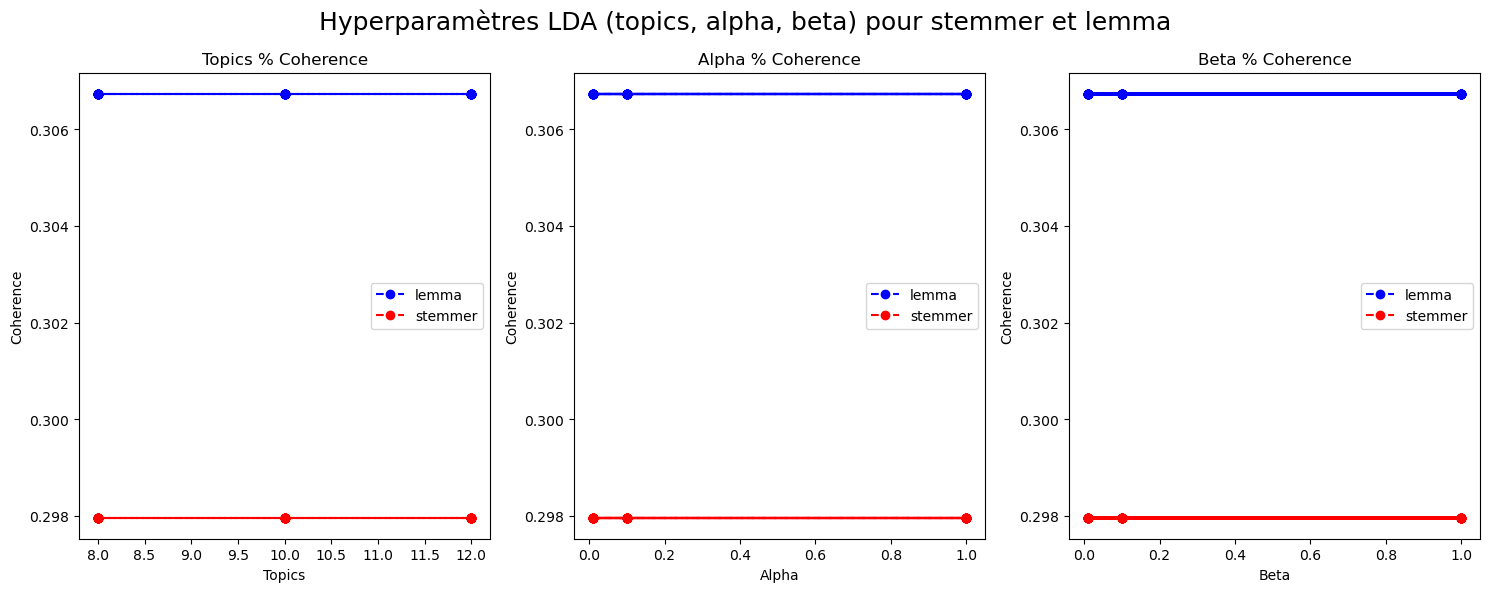

In [49]:
LDA_affichage_hyperparametres()

In [ ]:
#####################################################
# 4) Final Model                                    #
#####################################################

In [53]:
# Maj hyperparamètres : on prend la 1ère valeur de la plage car ils donnent tous le même résultat.
# Remarque : la cohérence est meilleure pour lemma que stemmer.
num_topics = 8    # Number of Topics
alpha      = 0.01 # Alpha parameter
beta       = 0.01 # Beta parameter

In [54]:
lda_model_lemma = gensim.models.LdaMulticore(corpus       = corpus_lemma,
                                             id2word      = id2word_lemma,
                                             num_topics   = num_topics, # hyperparamètre
                                             random_state = 100,
                                             chunksize    = 100,
                                             passes       = 10,
                                             alpha        = alpha,      # hyperparamètre
                                             eta          = beta)       # hyperparamètre

In [55]:
lda_model_stemmer = gensim.models.LdaMulticore(corpus       = corpus_stemmer,
                                               id2word      = id2word_stemmer,
                                               num_topics   = num_topics, # hyperparamètre
                                               random_state = 100,
                                               chunksize    = 100,
                                               passes       = 10,
                                               alpha        = alpha,      # hyperparamètre
                                               eta          = beta)       # hyperparamètre

In [66]:
#####################################################
# 5) Visualize Results                              #
#####################################################
def LDA_Visualize_Results(normalization_type_in, corpus_in, id2word_in, lda_model_in):

    # Visualize the topics
    pyLDAvis.enable_notebook()

    LDAvis_data_filepath = os.path.join('./results/ldavis_tuned_'+ str(num_topics))

    # this is a bit time consuming - make the if statement True
    # if you want to execute visualization prep yourself
    if 1 == 1:
        LDAvis_prepared = gensimvis.prepare(lda_model_in, corpus_in, id2word_in)
        with open(LDAvis_data_filepath, 'wb') as f:
            pickle.dump(LDAvis_prepared, f)

    # load the pre-prepared pyLDAvis data from disk
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)
    
    if (normalization_type_in == 'lemma'):
        pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_tuned_lemma_'+ str(num_topics) +'.html')
    elif (normalization_type_in == 'stemmer'):
        pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_tuned_stemmer_'+ str(num_topics) +'.html')
    else:
        pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_tuned_'+ str(num_topics) +'.html')

    LDAvis_prepared

In [67]:
LDA_Visualize_Results(normalization_type_in = 'lemma', 
                      corpus_in             = corpus_lemma, 
                      id2word_in            = id2word_lemma, 
                      lda_model_in          = lda_model_lemma)

In [68]:
LDA_Visualize_Results(normalization_type_in = 'stemmer', 
                      corpus_in             = corpus_stemmer, 
                      id2word_in            = id2word_stemmer, 
                      lda_model_in          = lda_model_stemmer)

In [ ]:
# transformation manuelle du fichier html --> jpg

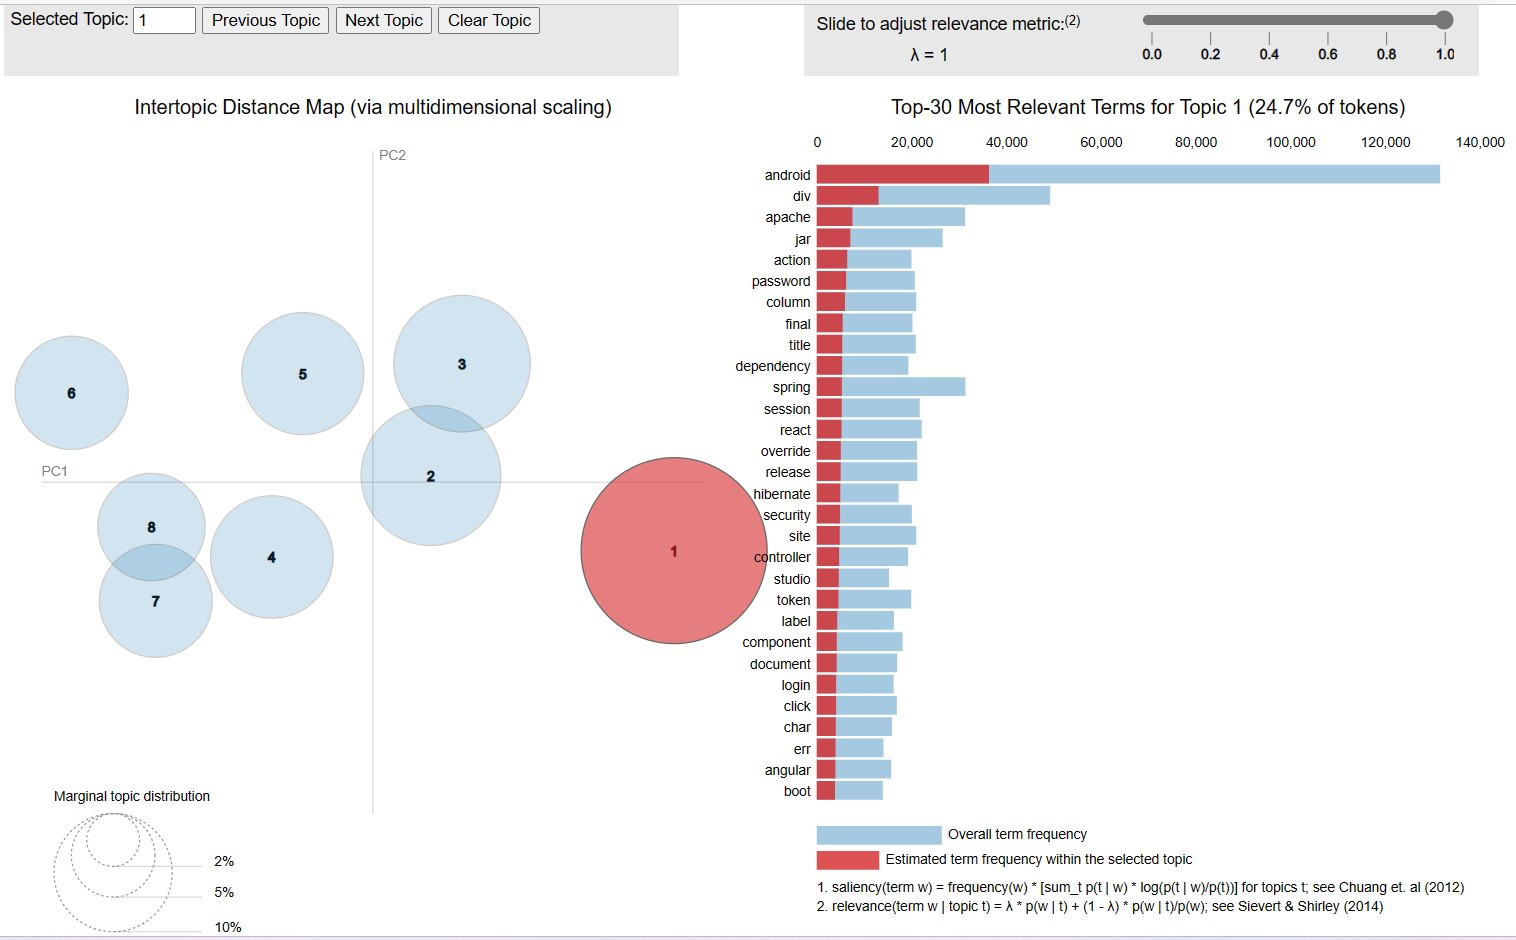

In [57]:
Image.open('./results/ldavis_tuned_lemma_8.jpg')

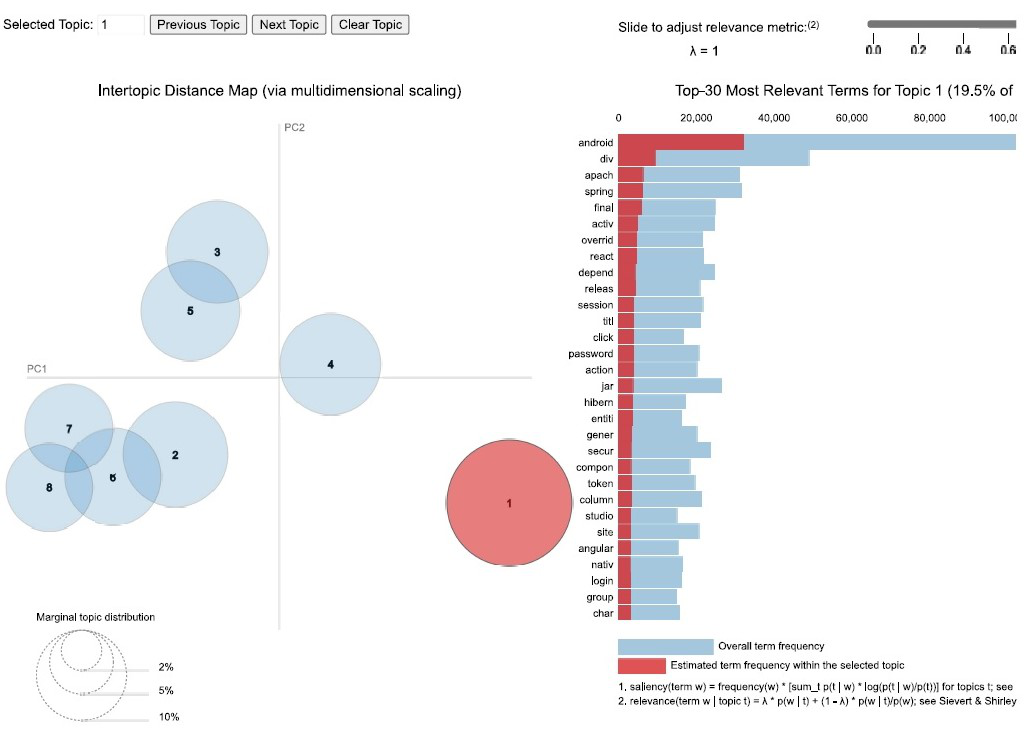

In [56]:
Image.open('./results/ldavis_tuned_stemmer_8.jpg')

# 3. MACHINE LEARNING SUPERVISE - APPROCHE BOW

# 3.1. EXTRACTION DES DONNEES

In [154]:
df.columns

Index(['_Tag_1', '_Tag_2', '_Text_sans_html', '_Tokens_stemmer_clean_final',
       '_Tokens_lemma_clean_final', '_Stemmer_clean_final',
       '_Lemma_clean_final'],
      dtype='object')

In [155]:
df.head()

_Tag_1 _Tag_2                                    _Text_sans_html  \
0  windows   None  registry vs. ini file for storing user configu...   
1     java   None  illegalargumentexception or nullpointerexcepti...   
2      c++   None  what is the best way to create a sparse array ...   
3      c++   None  thread safe lazy construction of a singleton i...   
4     .net   None  web services -- wcf vs. asmx ("standard") i am...   

                         _Tokens_stemmer_clean_final  \
0  ['registri', 'file', 'store', 'edit', 'store',...   
1                ['null', 'setter', 'null', 'throw']   
2  ['spars', 'project', 'matric', 'calcul', 'shor...   
3  ['construct', 'singleton', 'singleton', 'objec...   
4  ['web', 'project', 'web', 'servic', 'web', 'se...   

                           _Tokens_lemma_clean_final  \
0  ['registry', 'file', 'store', 'edit', 'store',...   
1                ['null', 'setter', 'null', 'throw']   
2  ['sparse', 'project', 'matrix', 'calculation',...   
3  ['construction', 'singleton', 'singleton', 'ob...   
4  ['web', 'project', 'web', 'service', 'web', 's...   

                                _Stemmer_clean_final  \
0  registri file store edit store appli button re...   
1                             null setter null throw   
2  spars project matric calcul short matrix spars...   
3  construct singleton singleton object singleton...   
4                  web project web servic web servic   

                                  _Lemma_clean_final  
0  registry file store edit store apply button re...  
1                             null setter null throw  
2  sparse project matrix calculation short matrix...  
3  construction singleton singleton object single...  
4                web project web service web service

# 3.1.1. EXTRACTION DONNEES X

In [ ]:
###############################################
# X : données d'entrée                        #
###############################################
# Travail à part dans les 2 colonnes texte (de manière isolée) :
#   ---> Colonne '_Stemmer_clean_final' --> corpus_liste_doc_stemmer
#   ---> Colonne '_Lemma_clean_final' ----> corpus_liste_doc_lemma
#
# corpus = ['This is the first document.',
#           'This document is the second document.',
#           'And this is the third one.',
#           'Is this the first document?']

# 3.1.1.1. APPROCHE BOW / COUNTVECTORIZER

In [ ]:
###########################################################################################################################
# EXTRACTION DE FEATURE A PARTIR DU TEXTE <=> nous créons une matrice de valeurs numériques pour représenter notre texte  #
# APPROCHE DE TYPE BAG-OF-WORDS (BOW) <=> 2 méthodes : CountVectorizer / TfidfVectorizer                                  #
###########################################################################################################################
# https://andhint.github.io/machine-learning/nlp/Feature-Extraction-From-Text/
# https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c

In [156]:
###################################################
# Méthode CountVectorizer                         #
###################################################
# CountVectorizer :
#  --> convertit le texte en données numériques.
#  --> adopte une approche bag-of-words (sac de mots) : chaque message est séparé en jetons et le nombre de fois 
#      où chaque jeton apparaît dans un message est compté.

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vect_stemmer = CountVectorizer()
vect_lemma   = CountVectorizer()

In [ ]:
#------------------------------------------------------------------------------------------------#
# Méthode fit :                                                                                  #
#------------------------------------------------------------------------------------------------#
# CountVectorizer() va apprendre quels tokens sont utilisés dans notre corpus_liste_doc_xxx.     #
# corpus list : one string for one document :                                                    #
# corpus = ['This is the first document.',                                                       #
#           'This document is the second document.',                                             #
#           'And this is the third one.',                                                        #
#           'Is this the first document?']                                                       #
#------------------------------------------------------------------------------------------------#

In [157]:
vect_stemmer.fit(corpus_liste_doc_stemmer)

CountVectorizer()

In [158]:
vect_lemma.fit(corpus_liste_doc_lemma)

CountVectorizer()

In [ ]:
#------------------------------------------------------------------------------------------------#
# Vocabulaire :                                                                                  #
# liste de mots uniques, identifés par leur indice dans la matrice                               #
#------------------------------------------------------------------------------------------------#

In [159]:
print(len(vect_stemmer.vocabulary_), 'mots de vocabulaire pour stemmer\n')

# Affichage des 20 premiers mots
res = dict(list(vect_stemmer.vocabulary_.items())[0:20])    
print('20 premiers mots du dictionnaire :', str(res), '\n')

#print('Stemmer vocabulary :', vect_stemmer.vocabulary_)

# Vérification avec le corpus stemmer (corpus_stemmer --> token_stemmer --> count_stemmer)
print('corpus_stemmer =', len(count_stemmer.index.tolist()), 'mots uniques')

1629 mots de vocabulaire pour stemmer

20 premiers mots du dictionnaire : {'registri': 1156, 'file': 528, 'store': 1390, 'edit': 438, 'appli': 67, 'button': 178, 'local': 799, 'null': 922, 'setter': 1290, 'throw': 1477, 'spars': 1358, 'project': 1072, 'matric': 827, 'calcul': 182, 'short': 1306, 'matrix': 828, 'undefin': 1537, 'preset': 1051, 'memori': 840, 'zero': 1625} 

corpus_stemmer = 1629 mots uniques


In [160]:
print(len(vect_lemma.vocabulary_), 'mots de vocabulaire pour lemma\n')

# Affichage des 20 premiers mots
res = dict(list(vect_lemma.vocabulary_.items())[0:20])    
print('20 premiers mots du dictionnaire :', str(res), '\n')

#print('Lemma vocabulary :', vect_lemma.vocabulary_)

# Vérification avec le corpus stemmer (corpus_lemma --> token_lemma --> count_lemma)
print('corpus_lemma =', len(count_lemma.index.tolist()), 'mots uniques')

1818 mots de vocabulaire pour lemma

20 premiers mots du dictionnaire : {'registry': 1298, 'file': 606, 'store': 1560, 'edit': 500, 'apply': 80, 'button': 205, 'local': 911, 'null': 1042, 'setter': 1452, 'throw': 1655, 'sparse': 1526, 'project': 1204, 'matrix': 944, 'calculation': 209, 'short': 1469, 'undefined': 1722, 'preset': 1181, 'memory': 956, 'zero': 1814, 'class': 261} 

corpus_lemma = 1818 mots uniques


In [ ]:
#------------------------------------------------------------------------------------------------#
# Méthode get_feature_names :                                                                    #
# liste des features créées pour nos messages (ou qui ont été apprises par CountVectorizer)      #
#------------------------------------------------------------------------------------------------#

In [161]:
print(len(vect_stemmer.get_feature_names()), 'stemmer feature_names\n')
print(vect_stemmer.get_feature_names()[0:30])

1629 stemmer feature_names

['abort', 'absolut', 'abstract', 'acceler', 'acceleromet', 'access', 'accessori', 'accordion', 'account', 'accumul', 'accuraci', 'ace', 'acm', 'acquir', 'across', 'act', 'action', 'activ', 'actor', 'adam', 'adapt', 'add', 'addit', 'administr', 'ado', 'adob', 'ae', 'affect', 'agent', 'aggreg']


C:\Users\valdu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [162]:
print(len(vect_lemma.get_feature_names()), 'lemma feature_names\n')
print(vect_lemma.get_feature_names()[0:30])

1818 lemma feature_names

['abort', 'absolute', 'abstract', 'abstraction', 'accelerate', 'acceleration', 'accelerometer', 'accessibility', 'accessible', 'accessory', 'accordion', 'account', 'accuracy', 'ace', 'acme', 'acquire', 'across', 'act', 'action', 'activation', 'activator', 'actor', 'adam', 'adapter', 'add', 'addition', 'administration', 'administrator', 'ado', 'adobe']


In [ ]:
#--------------------------------------------------------------------------------------------------#
# DTM (Document Term Matrix) :                                                                     #
# Sparse matrix <=> compressed sparse row format : le corpus se répartit sur différentes features  #
# <=> les lignes seront remplies avec une majorité de zéros.                                       #
#--------------------------------------------------------------------------------------------------#

In [163]:
dtm_lemma = vect_lemma.transform(corpus_liste_doc_lemma)
repr(dtm_lemma)

"<60001x1818 sparse matrix of type '<class 'numpy.int64'>'\n\twith 812562 stored elements in Compressed Sparse Row format>"

In [164]:
dtm_stemmer = vect_stemmer.transform(corpus_liste_doc_stemmer)
repr(dtm_stemmer)

"<60001x1629 sparse matrix of type '<class 'numpy.int64'>'\n\twith 804181 stored elements in Compressed Sparse Row format>"

In [44]:
print(dtm_lemma)

  (0, 81)	1
  (0, 208)	1
  (0, 508)	1
  (0, 615)	3
  (0, 927)	1
  (0, 1320)	2
  (0, 1584)	2
  (1, 1058)	2
  (1, 1475)	1
  (1, 1682)	1
  (2, 160)	1
  (2, 212)	1
  (2, 265)	1
  (2, 960)	2
  (2, 972)	1
  (2, 1201)	1
  (2, 1224)	1
  (2, 1438)	1
  (2, 1492)	1
  (2, 1550)	2
  (2, 1584)	4
  (2, 1644)	2
  (2, 1729)	2
  (2, 1750)	1
  (2, 1844)	1
  :	:
  (182409, 1434)	3
  (182409, 1593)	3
  (182409, 1783)	7
  (182410, 110)	2
  (182410, 328)	3
  (182410, 329)	2
  (182410, 583)	1
  (182410, 605)	1
  (182410, 675)	1
  (182410, 959)	1
  (182410, 1226)	2
  (182410, 1251)	1
  (182410, 1267)	1
  (182410, 1323)	2
  (182410, 1355)	2
  (182410, 1359)	2
  (182410, 1372)	1
  (182410, 1484)	1
  (182410, 1716)	1
  (182411, 18)	1
  (182411, 256)	1
  (182411, 615)	1
  (182411, 912)	1
  (182411, 1372)	1
  (182411, 1693)	1


In [45]:
print(dtm_stemmer)

  (0, 68)	1
  (0, 181)	1
  (0, 446)	1
  (0, 537)	3
  (0, 815)	1
  (0, 1177)	2
  (0, 1413)	2
  (1, 938)	2
  (1, 1312)	1
  (1, 1503)	1
  (2, 136)	1
  (2, 185)	1
  (2, 236)	1
  (2, 843)	1
  (2, 844)	1
  (2, 856)	1
  (2, 1071)	1
  (2, 1092)	1
  (2, 1281)	1
  (2, 1328)	1
  (2, 1381)	2
  (2, 1413)	4
  (2, 1467)	2
  (2, 1544)	2
  (2, 1564)	1
  :	:
  (182409, 1277)	3
  (182409, 1421)	3
  (182409, 1596)	7
  (182410, 93)	2
  (182410, 287)	3
  (182410, 288)	2
  (182410, 509)	1
  (182410, 529)	1
  (182410, 591)	1
  (182410, 842)	1
  (182410, 1093)	2
  (182410, 1116)	1
  (182410, 1131)	1
  (182410, 1180)	2
  (182410, 1207)	2
  (182410, 1210)	2
  (182410, 1219)	1
  (182410, 1320)	1
  (182410, 1534)	1
  (182411, 16)	1
  (182411, 227)	1
  (182411, 537)	1
  (182411, 803)	1
  (182411, 1219)	1
  (182411, 1514)	1


In [ ]:
#------------------------------------------------------------------------------------------------------#
# Conversion spare matrix --> dense matrix (pour gagner de la place)                                   #
#------------------------------------------------------------------------------------------------------#

In [165]:
df_lemma = pd.DataFrame(dtm_lemma.toarray(), columns = vect_lemma.get_feature_names())
print(df_lemma)

       abort  absolute  abstract  abstraction  accelerate  acceleration  \
0          0         0         0            0           0             0   
1          0         0         0            0           0             0   
2          0         0         0            0           0             0   
3          0         0         0            0           0             0   
4          0         0         0            0           0             0   
...      ...       ...       ...          ...         ...           ...   
59996      0         0         0            0           0             0   
59997      0         0         1            0           0             0   
59998      0         0         0            0           0             0   
59999      0         0         0            0           0             0   
60000      0         0         0            0           0             0   

       accelerometer  accessibility  accessible  accessory  ...  writer  \
0                  0    

In [166]:
df_stemmer = pd.DataFrame(dtm_stemmer.toarray(), columns = vect_stemmer.get_feature_names())
print(df_stemmer)

       abort  absolut  abstract  acceler  acceleromet  access  accessori  \
0          0        0         0        0            0       0          0   
1          0        0         0        0            0       0          0   
2          0        0         0        0            0       0          0   
3          0        0         0        0            0       0          0   
4          0        0         0        0            0       0          0   
...      ...      ...       ...      ...          ...     ...        ...   
59996      0        0         0        0            0       0          0   
59997      0        0         1        0            0       0          0   
59998      0        0         0        0            0       0          0   
59999      0        0         0        0            0       0          0   
60000      0        0         0        0            0       0          0   

       accordion  account  accumul  ...  writer  yahoo  yellow  yeoman  yield  \
0     

C:\Users\valdu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [167]:
df_lemma.columns

Index(['abort', 'absolute', 'abstract', 'abstraction', 'accelerate',
       'acceleration', 'accelerometer', 'accessibility', 'accessible',
       'accessory',
       ...
       'writer', 'yahoo', 'yellow', 'yeoman', 'yield', 'zend', 'zero', 'zip',
       'zone', 'zoom'],
      dtype='object', length=1818)

In [49]:
df_stemmer.columns

Index(['abort', 'absolut', 'abstract', 'acceler', 'acceleromet', 'access',
       'accessori', 'accordion', 'account', 'accumul',
       ...
       'yahoo', 'yarn', 'yellow', 'yeoman', 'yield', 'zend', 'zero', 'zip',
       'zone', 'zoom'],
      dtype='object', length=1658)

In [50]:
print('df_lemma shape\t\t=', df_lemma.shape)
print('df_stemmer shape\t=', df_stemmer.shape)

df_lemma shape		= (182412, 1848)
df_stemmer shape	= (182412, 1658)


# 3.1.2. EXTRACTION DONNEES Y

In [ ]:
###############################################
# y : données de sortie (résultat)            #
###############################################

In [168]:
# Copie des 2 sorties y (_Tag_1 et _Tag_2) dans un dataframe.
def Y_extraction_Tag_1_et_Tag_2(df_in):
    
    df_y = df_in[['_Tag_1', '_Tag_2']].copy()
    print('df_y shape =', df_y.shape)
    
    return df_y

In [169]:
df_y = Y_extraction_Tag_1_et_Tag_2(df_in = df)

df_y shape = (60001, 2)


In [170]:
# Vérifications de la mise à jour des tags dans le nouveau df.
def Y_verification_Tag_1_et_Tag_2(df_in, df_y_in):
    
    nb_ligne = 4
    
    # Vérification n°1
    for index, row in df_in.iterrows():
        if (row['_Tag_1'] != df_y_in.loc[index, '_Tag_1']):
            print('index =', index, ': _Tag_1 différent : df_in =', row['_Tag_1'], 
                  ', df_y_in =', df_y_in.loc[index, '_Tag_1'])
        if (row['_Tag_2'] != df_y_in.loc[index, '_Tag_2']):
            print('index =', index, ': _Tag_2 différent : df_in =', row['_Tag_2'], 
                  ', df_y_in =', df_y_in.loc[index, '_Tag_2'])
        

    # Vérification n°2
    print('@' * 16, 'df_in - head :', '@' * 16, '\n', df_in[['_Tag_1', '_Tag_2']].head(nb_ligne), '\n')
    print('@' * 15, 'df_y_in - head :', '@' * 15, '\n', df_y_in.head(nb_ligne), '\n\n')

    print('@' * 16, 'df_in - tail :', '@' * 16, '\n', df_in[['_Tag_1', '_Tag_2']].tail(nb_ligne), '\n')
    print('@' * 15, 'df_y_in - tail :', '@' * 15, '\n', df_y_in.tail(nb_ligne))        

In [171]:
Y_verification_Tag_1_et_Tag_2(df_in = df, df_y_in = df_y)

@@@@@@@@@@@@@@@@ df_in - head : @@@@@@@@@@@@@@@@ 
     _Tag_1 _Tag_2
0  windows   None
1     java   None
2      c++   None
3      c++   None 

@@@@@@@@@@@@@@@ df_y_in - head : @@@@@@@@@@@@@@@ 
     _Tag_1 _Tag_2
0  windows   None
1     java   None
2      c++   None
3      c++   None 


@@@@@@@@@@@@@@@@ df_in - tail : @@@@@@@@@@@@@@@@ 
            _Tag_1       _Tag_2
59997  javascript      node.js
59998         ios  objective-c
59999        html         None
60000         php       jquery 

@@@@@@@@@@@@@@@ df_y_in - tail : @@@@@@@@@@@@@@@ 
            _Tag_1       _Tag_2
59997  javascript      node.js
59998         ios  objective-c
59999        html         None
60000         php       jquery


In [172]:
# Conversion dataframe --> liste
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# @ Y : df_y --> list_y                                    @
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

def Y_conversion_df_to_liste(df_y_in):
    
    # https://stacklima.com/comment-convertir-pandas-dataframe-en-une-liste/
    list_y = df_y_in.values.tolist()

    # Vérification
    print('list_y :')
    print('\t- nb éléments\t\t=', len(list_y))
    print('\t- 10 premiers éléments\t=', list_y[0:10], '\n\n')
    
    
    # Suppression valeurs vides ('None') (qui correspondent à _Tag_2 non renseignés).
    # https://stacklima.com/python-supprimer-les-chaines-vides-de-la-liste-des-chaines/
    for i in range(len(list_y)):  
        ligne = list_y[i]
#        print('avant :', i, list_y[i])
    
        if ('None' in ligne):
            list_y[i].remove('None')
#        print('après :', i, list_y[i], '\n')    
    
    
    # Vérification après Suppresion des valeurs None
    print('list_y après suppression de \'None\' :')
    print('\t- nb éléments\t\t=', len(list_y))
    print('\t- 10 premiers éléments\t=', list_y[0:10])  
    
    return list_y

In [173]:
list_y = Y_conversion_df_to_liste(df_y_in = df_y)

list_y :
	- nb éléments		= 60001
	- 10 premiers éléments	= [['windows', 'None'], ['java', 'None'], ['c++', 'None'], ['c++', 'None'], ['.net', 'None'], ['.net', 'None'], ['sql', 'None'], ['c#', '.net'], ['c#', 'asp.net'], ['c#', 'performance']] 


list_y après suppression de 'None' :
	- nb éléments		= 60001
	- 10 premiers éléments	= [['windows'], ['java'], ['c++'], ['c++'], ['.net'], ['.net'], ['sql'], ['c#', '.net'], ['c#', 'asp.net'], ['c#', 'performance']]


In [188]:
########################################################################################################
# Nous sommes dans un cas de Multi-label text classification, car la sortie est sur _Tag_1 et _Tag_2.  #
# => Transform between iterable of iterables and a multilabel format.                                  #
########################################################################################################
def Y_transformation_to_multilabel(list_y_in):
    
    # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html
    # https://scikit-learn.org/stable/modules/preprocessing_targets.html
    # https://medium.com/analytics-vidhya/multi-label-text-classification-for-beginners-in-less-than-five-5-minutes-19502a96cf39

    mlb = MultiLabelBinarizer()

    #----------------------------------------------------------------------------------------------
    # fit_transform(y) : Fit the label sets binarizer and transform the given label sets.
    # Parameters:
    #   - y : iterable of iterables.
    #     A set of labels (any orderable and hashable object) for each sample. If the classes parameter is set, 
    #     y will not be iterated.

    # Returns:
    #    - y_indicator{ndarray, sparse matrix} of shape (n_samples, n_classes).
    #      A matrix such that y_indicator[i, j] = 1 iff classes_[j] is in y[i], and 0 otherwise. 
    #      Sparse matrix will be of CSR format.
    #----------------------------------------------------------------------------------------------
    mlb_indicator = mlb.fit_transform(list_y_in)

    print('type mlb_indicator =', type(mlb_indicator), '\n')
    print('mlb_indicator =\n', mlb_indicator, '\n')
    
    # Classes
    classes = mlb.classes_
    print('classes_ :')
    print('\t- nb éléments\t=', len(classes))
    print('\t- liste\t\t=\n', classes, '\n')

    # y
    #y = np.array(mlb)
    y = mlb_indicator

    print('y shape =', y.shape, '\n')
    print('y =\n', y)
    
    return y, classes

In [189]:
y, classes = Y_transformation_to_multilabel(list_y_in = list_y)

type mlb_indicator = <class 'numpy.ndarray'> 

mlb_indicator =
 [[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

classes_ :
	- nb éléments	= 27
	- liste		=
 ['.net' 'android' 'asp.net' 'c' 'c#' 'c++' 'css' 'html' 'ios' 'iphone'
 'java' 'javascript' 'jquery' 'json' 'linux' 'mysql' 'node.js'
 'objective-c' 'performance' 'php' 'python' 'ruby-on-rails' 'spring' 'sql'
 'swift' 'windows' 'xcode'] 

y shape = (60001, 27) 

y =
 [[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# SYNTHESE EXTRACTION DONNEES :
#-------------|-----------------|---------|
#             |        X        |    y    |
#-------------|-----------------|---------|
# Données     | df_lemma        |    y    |
#             | df_stemmer      |         |
#-------------|-----------------|---------|

# 3.2. STANDARDISATION DES DONNEES

In [ ]:
# https://ichi.pro/fr/analyse-en-composantes-principales-acp-avec-scikit-learn-33554981925296
# https://stacklima.com/analyse-des-composants-principaux-avec-python/

In [ ]:
########################################################################
# Standardisation des données (uniquement si problème de performance)  #
########################################################################
# https://ichi.pro/fr/pca-utilisant-python-scikit-learn-253248327425632
# https://www.geeksforgeeks.org/how-to-standardize-data-in-a-pandas-dataframe/
# https://www.kaggle.com/code/lilyelizabethjohn/standardization-using-standardscaler
# https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler
# https://stacklima.com/comment-mettre-a-l-echelle-les-colonnes-pandas-dataframe/

In [176]:
# Define standard scaler
scaler_lemma   = StandardScaler()
scaler_stemmer = StandardScaler()

In [71]:
# Transform data
df_norm_lemma = scaler_lemma.fit_transform(df_lemma)

# Maj type : numpy.ndarray --> panda dataframe
df_norm_lemma = pd.DataFrame(df_norm_lemma, columns = df_lemma.columns)

print('df_norm_lemma =', df_norm_lemma.shape) 

df_norm_lemma = (182412, 1848)


In [72]:
# Transform data
df_norm_stemmer = scaler_stemmer.fit_transform(df_stemmer)

# Maj type : numpy.ndarray --> panda dataframe
df_norm_stemmer = pd.DataFrame(df_norm_stemmer, columns = df_stemmer.columns)

print('df_norm_stemmer =', df_norm_stemmer.shape)

df_norm_stemmer = (182412, 1658)


In [63]:
# Vérification que la moyenne = 0 et l'écart type = 1
idx = ['mean', 'std']

In [64]:
# transpose met les attributs en ligne pour + de lisibilité
pd.DataFrame(df_norm_lemma).describe().round(2).loc[idx, :].transpose()

mean  std
abort         0.0  1.0
absolute      0.0  1.0
abstract      0.0  1.0
abstraction   0.0  1.0
accelerate    0.0  1.0
...           ...  ...
zend          0.0  1.0
zero         -0.0  1.0
zip           0.0  1.0
zone         -0.0  1.0
zoom          0.0  1.0

[1848 rows x 2 columns]

In [65]:
# transpose met les attributs en ligne pour + de lisibilité
pd.DataFrame(df_norm_stemmer).describe().round(2).loc[idx, :].transpose()

mean  std
abort         0.0  1.0
absolut       0.0  1.0
abstract     -0.0  1.0
acceler       0.0  1.0
acceleromet   0.0  1.0
...           ...  ...
zend          0.0  1.0
zero         -0.0  1.0
zip           0.0  1.0
zone         -0.0  1.0
zoom          0.0  1.0

[1658 rows x 2 columns]

In [ ]:
# SYNTHESE STANDARDISATION DONNEES :
#-------------|-----------------|---------|
#             |        X        |    y    |
#-------------|-----------------|---------|
# Données     | df_lemma        |    y    |
#             | df_stemmer      |         |
#-------------|-----------------|---------|
# Standardisé | df_norm_lemma   |    /    |
#             | df_norm_stemmer |         |
#-------------|-----------------|---------|

# 3.3. REDUCTION DE DIMENSION (ACP)

In [73]:
##########################################################################
# ACP sur notre ensemble de données (non normalisées et normalisées)     #
# pour voir comment il capture la variance des données.                  #
##########################################################################
def PCA_all(data_in, 
            data_name_in, 
            data_norm_in, 
            data_norm_name_in):
    
    # Nombre de colonnes
    nb_colonnes      = len(data_in.columns)
    nb_colonnes_norm = len(data_norm_in.columns)
    print('nb_colonnes\t\t= ', nb_colonnes)
    print('nb_colonnes_norm\t= ', nb_colonnes_norm, '\n')
    
    
    # PCA sur l'ensemble des données
    pca_all = PCA(n_components = nb_colonnes)
    pca_all.fit(data_in)
    
    pca_all_norm = PCA(n_components = nb_colonnes_norm)
    pca_all_norm.fit(data_norm_in)
    
    
    # Explained variance
    pca_all.explained_variance_ratio_
    pca_all_norm.explained_variance_ratio_        
    
    # Variance captée pour chaque composante
    scree      = (pca_all.explained_variance_ratio_ * 100).round(2)
    scree_norm = (pca_all_norm.explained_variance_ratio_ * 100).round(2)    
    print('scree\t\t\t=', scree)
    print('scree_norm\t\t=', scree_norm, '\n')    
    
    # Somme cumulée
    scree_cum      = scree.cumsum().round()
    scree_cum_norm = scree_norm.cumsum().round()    
    print('scree_cum\t\t=', scree_cum)
    print('scree_cum_norm\t\t=', scree_cum_norm, '\n')
    
    for pca in [pca_all, pca_all_norm]:
        if(pca == pca_all):
            print('@' * 32, data_name_in, ': pca_all', '@' * 32)
        elif(pca == pca_all_norm):
            print('\n')
            print('@' * 27, data_norm_name_in, ': pca_all_norm', '@' * 27)
        
        print('Variance explained by the First principal component\t=', np.cumsum(pca.explained_variance_ratio_ * 100)[0])
        print('Variance explained by the 2 principal components\t=', np.cumsum(pca.explained_variance_ratio_ * 100)[1])
        print('Variance explained by the 3 principal components\t=', np.cumsum(pca.explained_variance_ratio_ * 100)[2])
        print('Variance explained by the 10 principal components\t=', np.cumsum(pca.explained_variance_ratio_ * 100)[9])
        print('Variance explained by the 25 principal components\t=', np.cumsum(pca.explained_variance_ratio_ * 100)[24])    
        print('Variance explained by the 50 principal components\t=', np.cumsum(pca.explained_variance_ratio_ * 100)[49])
        if (nb_colonnes >= 99):
            print('Variance explained by the 100 principal components\t=', 
                  np.cumsum(pca.explained_variance_ratio_ * 100)[99])
        if (nb_colonnes >= 499):
            print('Variance explained by the 500 principal components\t=', 
                  np.cumsum(pca.explained_variance_ratio_ * 100)[499])
        if (nb_colonnes >= 749):
            print('Variance explained by the 750 principal components\t=', 
                  np.cumsum(pca.explained_variance_ratio_ * 100)[749])        
        if (nb_colonnes >= 999):
            print('Variance explained by the 1000 principal components\t=', 
                  np.cumsum(pca.explained_variance_ratio_ * 100)[999]) 
        if (nb_colonnes >= 1199):
            print('Variance explained by the 1200 principal components\t=', 
                  np.cumsum(pca.explained_variance_ratio_ * 100)[1199]) 
        if (nb_colonnes >= 1499):
            print('Variance explained by the 1500 principal components\t=', 
                  np.cumsum(pca.explained_variance_ratio_ * 100)[1499])   
        if (nb_colonnes >= 1999):
            print('Variance explained by the 2000 principal components\t=', 
                  np.cumsum(pca.explained_variance_ratio_ * 100)[1999])
        if (nb_colonnes >= 2499):
            print('Variance explained by the 2500 principal components\t=', 
                  np.cumsum(pca.explained_variance_ratio_ * 100)[2499])        
    
    # Variable avec la liste de nos composantes :
    x_list      = range(1, nb_colonnes + 1)
    x_list_norm = range(1, nb_colonnes_norm + 1)    
    list(x_list)
    list(x_list_norm)    
    
    
    # Graphique éboulis des valeurs graphiques (scree plot)
    # Remarque : on a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.
    plt.bar(x_list, scree)
    plt.bar(x_list_norm, scree_norm)
    
    plt.plot(x_list,      scree_cum,      c = 'red',  marker = 'o', label = data_name_in)
    plt.plot(x_list_norm, scree_cum_norm, c = 'blue', marker = 'o', label = data_norm_name_in)    
    plt.xlabel('Rang de l\'axe d\'inertie')
    plt.ylabel('Pourcentage d\'inertie')
    plt.title('Eboulis des valeurs propres')
    plt.legend(loc = 'best') # pour afficher label
    plt.show()

In [74]:
# Maj liste colonnes des principales composantes ('PC1', ..., 'PC1000')
def nom_colonne_PCA(nb_composant_in):
    columns = []
    for i in range(nb_composant_in):
        columns.append('PC' + str(i+1))
    print('10 premières colonnes :', columns[0:10])
    print('10 dernières colonnes :', columns[nb_composant_in-10:nb_composant_in])
    return columns

In [75]:
def PCA_reduit(data_in, n_components_in):
    
    # Appliquons PCA sur un nombre réduit de composants
    pca_reduit = PCA(n_components = n_components_in)
    pca_reduit.fit(data_in)
    data_pca_reduit = pca_reduit.transform(data_in)
    
    return data_pca_reduit

In [ ]:
#############################################
# PCA pour df_lemma & df_norm_lemma         #
#############################################

nb_colonnes		=  1848
nb_colonnes_norm	=  1848 

scree			= [13.84  8.97  4.03 ...  0.    0.    0.  ]
scree_norm		= [0.56 0.41 0.32 ... 0.   0.   0.  ] 

scree_cum		= [14. 23. 27. ... 99. 99. 99.]
scree_cum_norm		= [  1.   1.   1. ... 100. 100. 100.] 

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ df_lemma : pca_all @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Variance explained by the First principal component	= 13.84324827317333
Variance explained by the 2 principal components	= 22.81072203955167
Variance explained by the 3 principal components	= 26.83841419764677
Variance explained by the 10 principal components	= 40.18231785943876
Variance explained by the 25 principal components	= 51.7121392428991
Variance explained by the 50 principal components	= 62.34238515514946
Variance explained by the 100 principal components	= 73.35077560605443
Variance explained by the 500 principal components	= 93.68046528617573
Variance explained by the 750 principal components	= 96.73388128492905
Variance explained by the 1000 p

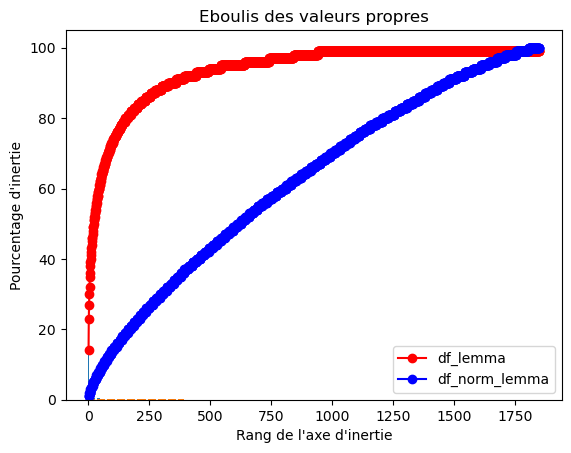

In [76]:
PCA_all(data_in           = df_lemma, 
        data_name_in      = 'df_lemma', 
        data_norm_in      = df_norm_lemma, 
        data_norm_name_in = 'df_norm_lemma')

# df_lemma :
#   - 79% de la variance est comprise dans les 100 premières composantes sur 1.501.
#   - 96% de la variance est comprise dans les 500 premières composantes sur 1.501.
#   - 98% de la variance est comprise dans les 750 premières composantes sur 1.501.
#
# df_norm_lemma :
#   - 69% de la variance est comprise dans les   750 premières composantes sur 1.501.
#   - 83% de la variance est comprise dans les 1.000 premières composantes sur 1.501.
#   - 91% de la variance est comprise dans les 1.200 premières composantes sur 1.501.

In [ ]:
#--------------------------------------------------------#
# Calculs pour df_lemma :                                #
# 98% de la variance avec 750 composants principaux      #
#                                                        #
#--------------------------------------------------------#

In [77]:
data_pca_lemma_750 = PCA_reduit(data_in         = df_lemma,
                                n_components_in = 750)

In [78]:
df_pca_lemma_750 = pd.DataFrame(data_pca_lemma_750, 
                                columns = nom_colonne_PCA(nb_composant_in = 750))

df_pca_lemma_750.shape

10 premières colonnes : ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
10 dernières colonnes : ['PC741', 'PC742', 'PC743', 'PC744', 'PC745', 'PC746', 'PC747', 'PC748', 'PC749', 'PC750']


(182412, 750)

In [ ]:
#############################################
# PCA pour df_stemmer & df_norm_stemmer     #
#############################################

nb_colonnes		=  1371
nb_colonnes_norm	=  1371 

scree			= [13.67  8.39  7.7  ...  0.    0.    0.  ]
scree_norm		= [0.79 0.58 0.43 ... 0.   0.   0.  ] 

scree_cum		= [14. 22. 30. ... 99. 99. 99.]
scree_cum_norm		= [  1.   1.   2. ... 100. 100. 100.] 

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ df_stemmer : pca_all @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Variance explained by the First principal component	= 13.669242924736224
Variance explained by the 2 principal components	= 22.06017963691788
Variance explained by the 3 principal components	= 29.75894824090939
Variance explained by the 10 principal components	= 43.833323814179245
Variance explained by the 25 principal components	= 56.746168896075176
Variance explained by the 50 principal components	= 67.45083732847712
Variance explained by the 100 principal components	= 78.13637730724483
Variance explained by the 500 principal components	= 96.32396249371199
Variance explained by the 750 principal components	= 98.53853992850094
Variance explained by the 

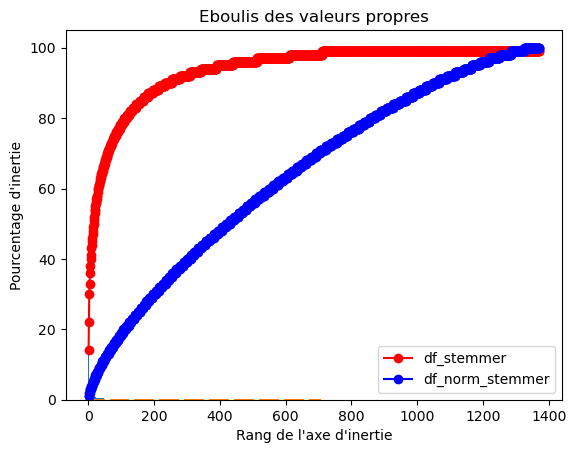

In [216]:
PCA_all(data_in           = df_stemmer, 
        data_name_in      = 'df_stemmer', 
        data_norm_in      = df_norm_stemmer, 
        data_norm_name_in = 'df_norm_stemmer')

# df_stemmer :
#   - 79% de la variance est comprise dans les 100 premières composantes sur 1.501.
#   - 96% de la variance est comprise dans les 500 premières composantes sur 1.501.
#   - 98% de la variance est comprise dans les 750 premières composantes sur 1.501.

# df_norm_stemmer :
#   - 69% de la variance est comprise dans les   750 premières composantes sur 1.501.
#   - 83% de la variance est comprise dans les 1.000 premières composantes sur 1.501.
#   - 91% de la variance est comprise dans les 1.200 premières composantes sur 1.501.

In [ ]:
#--------------------------------------------------------#
# Calculs pour df_stemmer :                              #
# 98% de la variance avec 750 composants principaux      #
#--------------------------------------------------------#

In [217]:
data_pca_stemmer_750 = PCA_reduit(data_in         = df_stemmer,
                                  n_components_in = 750)

In [218]:
df_pca_stemmer_750 = pd.DataFrame(data_pca_stemmer_750, 
                                  columns = nom_colonne_PCA(nb_composant_in = 750))

df_pca_stemmer_750.shape

10 premières colonnes : ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
10 dernières colonnes : ['PC741', 'PC742', 'PC743', 'PC744', 'PC745', 'PC746', 'PC747', 'PC748', 'PC749', 'PC750']


(62382, 750)

In [ ]:
# SYNTHESE REDUCTION DONNEES (ACP) :
#-------------|-----------------|-----------------------------------|
#             |        X        |              PCA                  |
#-------------|-----------------|-----------------------------------|
# Données     | df_lemma        | df_pca_lemma_750 (98% variance)   |
#             | df_stemmer      | df_pca_stemmer_750 (98% variance) |
#-------------|-----------------|-----------------------------------|
# Standardisé | df_norm_lemma   |               /                   |
#             | df_norm_stemmer |               /                   |
#-------------|-----------------|-----------------------------------|

# 3.4. DECOUPAGE DONNEES TRAIN / TEST

In [197]:
# Découpage des données X, y en données d'entrainement et de test
def decoupage_train_test(X_in, y_in):
    
    X_train, X_test, y_train, y_test = train_test_split(X_in, 
                                                        y_in, 
                                                        test_size    = 0.35,  # test_size = 0.35, train_size = 0.65
                                                        random_state = 42) 

    # Vérification
    print('X_train shape\t=', X_train.shape)
    print('X_test shape\t=',  X_test.shape)
    print('y_train shape\t=', y_train.shape)
    print('y_test shape\t=',  y_test.shape)
    
    return X_train, X_test, y_train, y_test

In [ ]:
##################################################
#                Données stemmer                 #
##################################################

In [220]:
# Tout le dataset
X_train_stemmer, X_test_stemmer, \
y_train_stemmer, y_test_stemmer = decoupage_train_test(X_in = df_stemmer,
                                                       y_in = y)

X_train	= (40548, 1371)
X_test	= (21834, 1371)
y_train	= (40548, 28)
y_test	= (21834, 28)


In [221]:
# 750 composants principaux
X_train_stemmer_750, X_test_stemmer_750, \
y_train_stemmer_750, y_test_stemmer_750 = decoupage_train_test(X_in = df_pca_stemmer_750,
                                                               y_in = y)

X_train	= (40548, 750)
X_test	= (21834, 750)
y_train	= (40548, 28)
y_test	= (21834, 28)


In [ ]:
##################################################
#                 Données lemma                  #
##################################################

In [80]:
# Tout le dataset
X_train_lemma, X_test_lemma, \
y_train_lemma, y_test_lemma = decoupage_train_test(X_in = df_lemma,
                                                   y_in = y)

X_train	= (118567, 1848)
X_test	= (63845, 1848)
y_train	= (118567, 28)
y_test	= (63845, 28)


In [81]:
# 750 composants principaux
X_train_lemma_750, X_test_lemma_750, \
y_train_lemma_750, y_test_lemma_750 = decoupage_train_test(X_in = df_pca_lemma_750,
                                                           y_in = y)

X_train	= (118567, 750)
X_test	= (63845, 750)
y_train	= (118567, 28)
y_test	= (63845, 28)


In [ ]:
# SYNTHESE DECOUPAGE TRAIN / TEST :
#---------------|--------------------|--------------------------------------------------------------------------|
#               |        X           |              Données train / test                                        |
#---------------|--------------------|--------------------------------------------------------------------------|
# Données       | df_lemma           | X_train_lemma, X_test_lemma, y_train_lemma, y_test_lemma                 |
#               | df_stemmer         | X_train_stemmer, X_test_stemmer, y_train_stemmer, y_test_stemmer         |
#---------------|--------------------|--------------------------------------------------------------------------|
# Données PCA   | df_pca_lemma_750   | X_train_lemma_750, X_test_lemma_750, y_train_lemma_750, y_test_lemma_750 |
#               | df_pca_stemmer_750 | X_train_lemma_750, X_test_lemma_750, y_train_lemma_750, y_test_lemma_750 |
#---------------|--------------------|--------------------------------------------------------------------------|
# Données       | df_norm_lemma      |               /                                                          |
# standardisées | df_norm_stemmer    |               /                                                          |
#---------------|--------------------|--------------------------------------------------------------------------|  
# Données stan- |         /          |               /                                                          |
# dardisées PCA |         /          |               /                                                          |
#---------------|--------------------|--------------------------------------------------------------------------|  

# 3.5. ALGORITHMES

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html
# https://www.kaggle.com/code/kkhandekar/1-vs-1-1-vs-rest-classification-sklearn
# https://towardsdatascience.com/multi-label-text-classification-with-scikit-learn-30714b7819c5

In [82]:
def algorithme_ovr(model_in, X_train_in, y_train_in, X_test_in):
    
    # Start the stopwatch / counter
    time_start_sec = perf_counter()
        
    
    # Define model
    model = model_in

    # Define the ovr (one-vs-rest) strategy
    ovr = OneVsRestClassifier(model)

    # Fitting the model with training data
    classifier = ovr.fit(X_train_in, y_train_in)
    
    # Making a prediction on the test set
    y_pred = ovr.predict(X_test_in)
    
   
    # Stop the stopwatch / counter
    time_stop_sec = perf_counter()
    
    # Affichage durée programme
    affichage_duree_programme(time_start_sec = time_start_sec, 
                              time_stop_sec  = time_stop_sec)
        
    return y_pred    

In [83]:
###################################################
# Métriques pour évaluer le modèle                #
###################################################
def metriques_algo(y_test_in, y_pred_in, afficher_all_matrices = False):
    
    # Initialisation
    f1_score_      = 0.0
    jaccard_score_ = 0.0
    
    
    
    # ------------------------- Accuracy classification score.
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    test_set_accuracy = accuracy_score(y_true = y_test_in, 
                                       y_pred = y_pred_in)
    print('Test Set Accuracy\t=', round(test_set_accuracy, 3), '\n')

    
    
    # ------------------------- F1 score.
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
    for average_F1 in ['micro', 'macro', 'samples', 'weighted']:
        f1_score_ = f1_score(y_true         = y_test_in,
                             y_pred         = y_pred_in,
                             average        = average_F1,
                             zero_division = 0.0)
        print('F1 score\t\t=', round(f1_score_, 3), ', average =', average_F1)
    print('\n')
    
    
    
    # ------------------------- Jaccard similarity coefficient score.
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html
    for average_jaccard in ['micro', 'macro', 'samples', 'weighted']: 
        jaccard_score_ = jaccard_score(y_true  = y_test_in, 
                                       y_pred  = y_pred_in,
                                       average = average_jaccard)
        print('Jaccard score\t\t=', round(jaccard_score_, 3), ', average =', average_jaccard)
    print('\n')
    

    
    # ------------------------- Main classification metrics.
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
    # Text summary of the precision, recall, F1 score for each class.
    classification_metrics = classification_report(y_true  = y_test_in,
                                                   y_pred  = y_pred_in)
    print('Classification metrics =\n', classification_metrics, '\n')
    
    
    
    # ------------------------- Confusion matrix to evaluate the accuracy of a classification.
    # >>>>>>> Matrice de confusion multilabel
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html#sklearn.metrics.multilabel_confusion_matrix
    confusion_matrices_ = multilabel_confusion_matrix(y_true = y_test_in, 
                                                      y_pred = y_pred_in)
#                                                     labels = list(mlb.classes_))

#    print('confusion_matrices_ =\n', confusion_matrices_) 
    
    
    # Liste des labels / tags / classes.
    labels = list(mlb.classes_)
#    print('labels =', labels)
    
    print('confusion_matrices_ par label :') 
    for i in np.arange(0, len(labels)):
        # matrice de confusion du label i
        cm = confusion_matrices_[i]    
        print(labels[i], ':\n', cm) 
        
        # matrice de confusion du label i normalisée        
        # https://stackoverflow.com/questions/20927368/how-to-normalize-a-confusion-matrix
        # https://fr.moonbooks.org/Articles/Arrondir-les-%C3%A9l%C3%A9ments-dune-matrice-avec-numpy-sous-python/           
        cmn = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print(labels[i], 'normalisé :\n', np.round(cmn, 2), '\n')
        
        
    
    # >>>>>>> Matrice de confusion totale (affichage optionnel pour limiter les traces)
    # https://stackoverflow.com/questions/46953967/multilabel-indicator-is-not-supported-for-confusion-matrix
    cm_argmax = confusion_matrix(y_test_in.argmax(axis = 1), y_pred_in.argmax(axis = 1))
        
    if (afficher_all_matrices):
        print('\nMatrice de confusion totale =\n', cm_argmax)
    
        mask = np.zeros_like(cm_argmax)
        mask[np.triu_indices_from(mask)] = True

        fig, ax = plt.subplots(figsize = (15, 15))

        # http://seaborn.pydata.org/generated/seaborn.heatmap.html
        ax = sns.heatmap(cm_argmax, 
                         mask        = mask, 
                         annot       = True, 
                         cmap        = 'coolwarm', 
                         xticklabels = labels, 
                         yticklabels = labels,
                         square      = True)

        # labels, title and ticks
        ax.set_xlabel('Classe prédite')
        ax.set_ylabel('Classe réelle')
        ax.set_title('Matrice de confusion')
        plt.show()    

        print('\n')
    
    
    # >>>>>>> Matrice de confusion totale normalisée
    # https://stackoverflow.com/questions/20927368/how-to-normalize-a-confusion-matrix
    cmn_argmax = cm_argmax.astype('float') / cm_argmax.sum(axis = 1)[:, np.newaxis]
    
    maskn = np.zeros_like(cmn_argmax)
    maskn[np.triu_indices_from(maskn)] = True
    
    fig, ax = plt.subplots(figsize = (15, 15))
    sns.heatmap(cmn_argmax, 
                mask        = maskn, 
                annot       = True, 
                cmap        = 'coolwarm', 
                fmt         = '.1f', 
                xticklabels = labels, 
                yticklabels = labels, 
                square      = True)
    
    # labels, title and ticks    
    ax.set_xlabel('Classe prédite')
    ax.set_ylabel('Classe réelle')
    ax.set_title('Matrice de confusion normalisée')
    plt.show()

# 3.5.1. ALGORITHME SVM (SUPPORT VECTOR MACHINE)

In [ ]:
# https://www.actuia.com/contribution/victorbigand/tutoriel-tal-pour-les-debutants-classification-de-texte/
# https://www.geeksforgeeks.org/one-vs-rest-strategy-for-multi-class-classification/
# https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/
    
# l'algorithme SVM (Support Vector Machine) :
# ---> Permet de réaliser des tâches de classification ou de régression.
# ---> Fonctionne bien sur des données textuelles, même si il est aujourd'hui largement surpassé par les réseaux 
#     de neurones profonds.
# ---> Sépare au maximum les exemples tirés des différentes classes.
# ---> Est un algorithme de classification binaire que nous utilisons avec l'heuristique One-vs-Rest pour effectuer
#      une classification multiclasse.

# 2 choix de modèles : 
#  --> modèle SVC
#  --> modèle LinearSVC (à privilégier por les gros datasets)

In [ ]:
##################################################
#                Données stemmer                 #
##################################################

In [92]:
# Modèle SVC
# >>>>>>> 750 composantes principales
y_pred_stemmer_svc_750 = algorithme_ovr(model_in   = SVC(), 
                                        X_train_in = X_train_stemmer_750, 
                                        y_train_in = y_train_stemmer_750, 
                                        X_test_in  = X_test_stemmer_750)  # PC : 210.163 min

Durée programme (start : 1522.173 --> stop : 14131.924 ) = 12609.751 sec ou 210.163 min



In [163]:
metriques_algo(y_test_in = y_test_stemmer_750,
               y_pred_in = y_pred_stemmer_svc_750)

Test Set Accuracy	= 0.175 

F1 score		= 0.492 , average = micro
F1 score		= 0.315 , average = macro
F1 score		= 0.39 , average = samples
F1 score		= 0.44 , average = weighted


Jaccard score		= 0.327 , average = micro
Jaccard score		= 0.226 , average = macro
Jaccard score		= 0.334 , average = samples
Jaccard score		= 0.322 , average = weighted


Classification metrics =
               precision    recall  f1-score   support

           0       0.76      0.19      0.30      1959
           1       0.92      0.69      0.79      1322
           2       0.70      0.30      0.42       642
           3       0.72      0.08      0.14       794
           4       0.85      0.45      0.59      2896
           5       0.80      0.10      0.18      1065
           6       0.57      0.01      0.01       614
           7       0.71      0.24      0.36      1785
           8       0.86      0.49      0.63      2788
           9       0.00      0.00      0.00       761
          10       0.92      0.

C:\Users\valdu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\valdu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# >>>>>>> Tout le dataset
y_pred_stemmer_svc = algorithme_ovr(model_in   = SVC(),
                                    X_train_in = X_train_stemmer, 
                                    y_train_in = y_train_stemmer, 
                                    X_test_in  = X_test_stemmer)

In [ ]:
metriques_algo(y_test_in = y_test_stemmer,
               y_pred_in = y_pred_stemmer_svc)

In [229]:
# Modèle LinearSVC
# >>>>>>> 750 composantes principales
y_pred_stemmer_LinearSVC_750 = algorithme_ovr(model_in   = LinearSVC(), 
                                              X_train_in = X_train_stemmer_750, 
                                              y_train_in = y_train_stemmer_750, 
                                              X_test_in  = X_test_stemmer_750) # PC : 20.307 min

C:\Users\valdu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\valdu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\valdu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\valdu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\valdu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\valdu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

Durée programme (start : 87736.118 --> stop : 88954.533 ) = 1218.415 sec ou 20.307 min



Test Set Accuracy	= 0.188 

F1 score		= 0.518 , average = micro
F1 score		= 0.399 , average = macro
F1 score		= 0.42 , average = samples
F1 score		= 0.492 , average = weighted


Jaccard score		= 0.349 , average = micro
Jaccard score		= 0.276 , average = macro
Jaccard score		= 0.36 , average = samples
Jaccard score		= 0.352 , average = weighted


Classification metrics =
               precision    recall  f1-score   support

           0       0.66      0.27      0.38      2701
           1       0.91      0.61      0.73      1848
           2       0.60      0.27      0.38       878
           3       0.64      0.20      0.31      1125
           4       0.80      0.48      0.60      3985
           5       0.65      0.21      0.32      1483
           6       0.47      0.13      0.20       872
           7       0.63      0.29      0.39      2572
           8       0.80      0.54      0.65      3900
           9       0.23      0.02      0.04      1069
          10       0.92      0.

C:\Users\valdu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


.net normalisé :
 [[0.98 0.02]
 [0.73 0.27]] 

android :
 [[19872   114]
 [  716  1132]]
android normalisé :
 [[0.99 0.01]
 [0.39 0.61]] 

asp.net :
 [[20793   163]
 [  637   241]]
asp.net normalisé :
 [[0.99 0.01]
 [0.73 0.27]] 

c :
 [[20581   128]
 [  895   230]]
c normalisé :
 [[0.99 0.01]
 [0.8  0.2 ]] 

c# :
 [[17355   494]
 [ 2061  1924]]
c# normalisé :
 [[0.97 0.03]
 [0.52 0.48]] 

c++ :
 [[20186   165]
 [ 1173   310]]
c++ normalisé :
 [[0.99 0.01]
 [0.79 0.21]] 

css :
 [[20832   130]
 [  759   113]]
css normalisé :
 [[0.99 0.01]
 [0.87 0.13]] 

html :
 [[18835   427]
 [ 1835   737]]
html normalisé :
 [[0.98 0.02]
 [0.71 0.29]] 

ios :
 [[17411   523]
 [ 1785  2115]]
ios normalisé :
 [[0.97 0.03]
 [0.46 0.54]] 

iphone :
 [[20690    75]
 [ 1046    23]]
iphone normalisé :
 [[1.   0.  ]
 [0.98 0.02]] 

java :
 [[18162   202]
 [ 1258  2212]]
java normalisé :
 [[0.99 0.01]
 [0.36 0.64]] 

javascript :
 [[16067   640]
 [ 2372  2755]]
javascript normalisé :
 [[0.96 0.04]
 [0.46 0.54

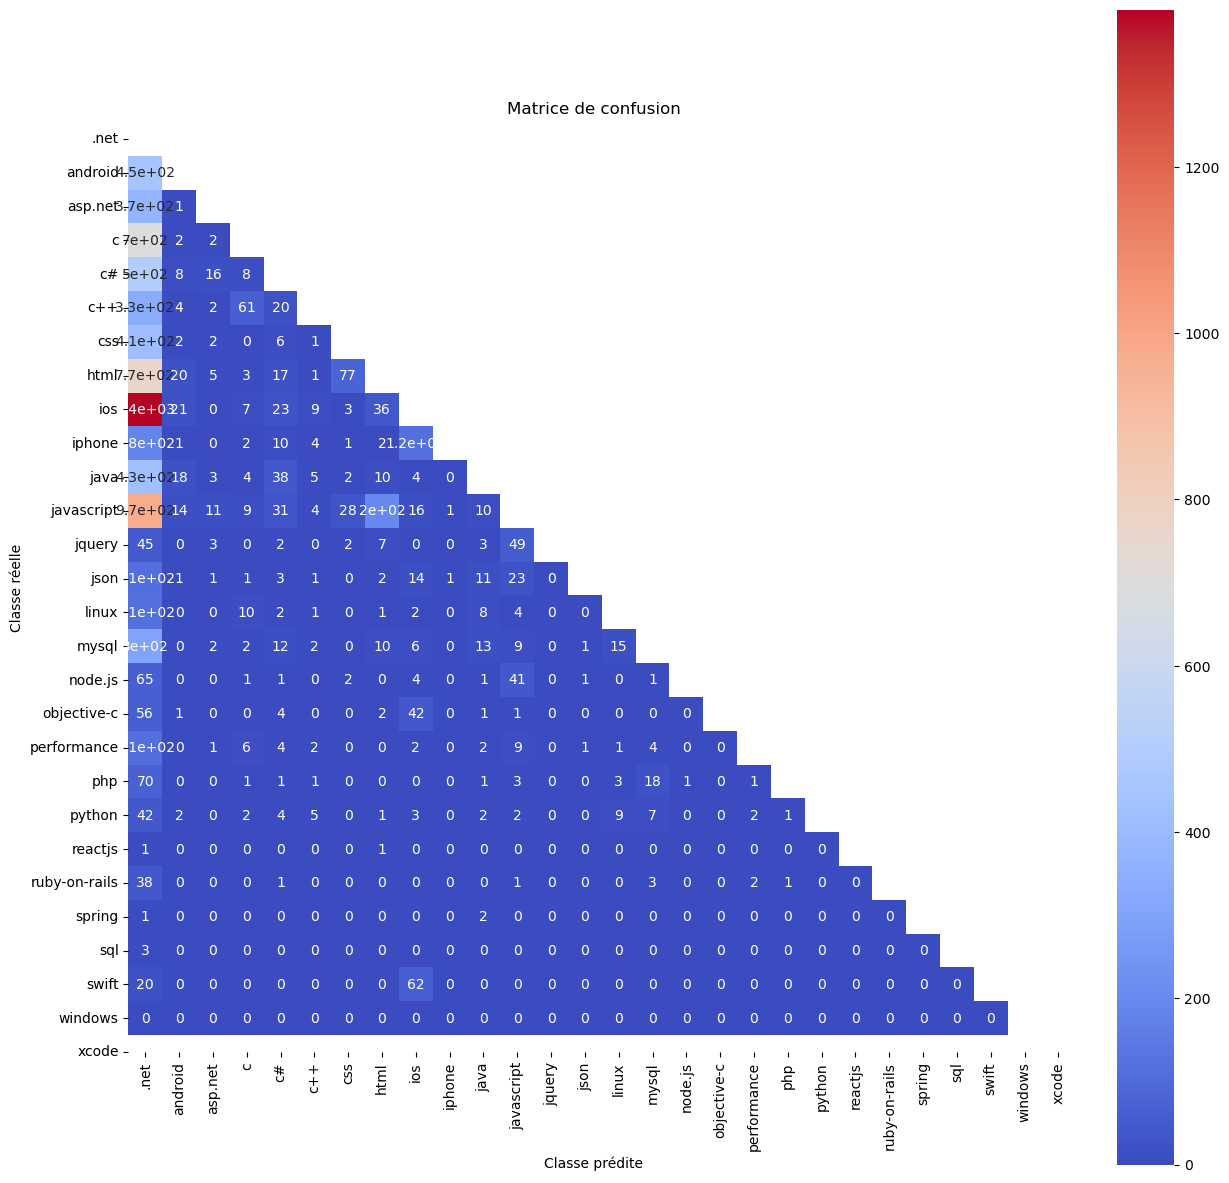

C:\Users\valdu\AppData\Local\Temp\ipykernel_7476\1449362897.py:107: RuntimeWarning: invalid value encountered in divide
  cmn_argmax = cm_argmax.astype('float') / cm_argmax.sum(axis = 1)[:, np.newaxis]


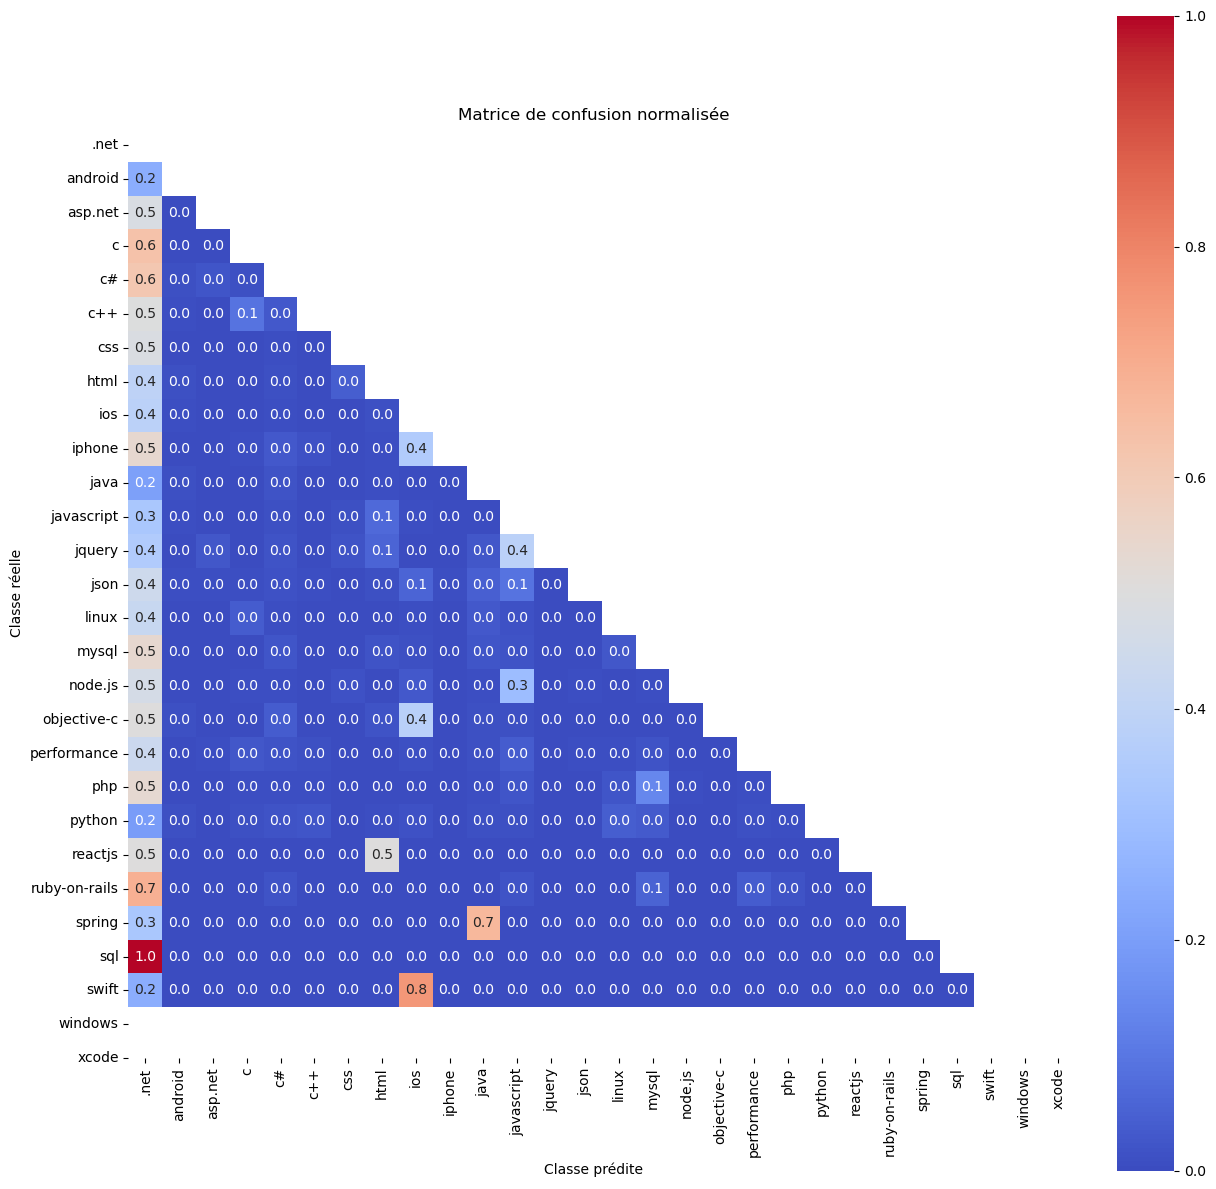

In [230]:
metriques_algo(y_test_in = y_test_stemmer_750,
               y_pred_in = y_pred_stemmer_LinearSVC_750)

In [231]:
# >>>>>>> Tout le dataset
y_pred_stemmer_LinearSVC = algorithme_ovr(model_in   = LinearSVC(),
                                          X_train_in = X_train_stemmer, 
                                          y_train_in = y_train_stemmer, 
                                          X_test_in  = X_test_stemmer) # PC : 1.751 min

C:\Users\valdu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\valdu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\valdu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\valdu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\valdu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\valdu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

Durée programme (start : 90187.952 --> stop : 90293.039 ) = 105.087 sec ou 1.751 min



Test Set Accuracy	= 0.197 

F1 score		= 0.536 , average = micro
F1 score		= 0.43 , average = macro
F1 score		= 0.45 , average = samples
F1 score		= 0.515 , average = weighted


Jaccard score		= 0.367 , average = micro
Jaccard score		= 0.298 , average = macro
Jaccard score		= 0.384 , average = samples
Jaccard score		= 0.371 , average = weighted


Classification metrics =
               precision    recall  f1-score   support

           0       0.66      0.29      0.40      2701
           1       0.89      0.65      0.75      1848
           2       0.55      0.29      0.38       878
           3       0.59      0.26      0.36      1125
           4       0.78      0.53      0.63      3985
           5       0.61      0.27      0.37      1483
           6       0.46      0.19      0.27       872
           7       0.64      0.30      0.41      2572
           8       0.78      0.57      0.66      3900
           9       0.21      0.03      0.06      1069
          10       0.89      0.

C:\Users\valdu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


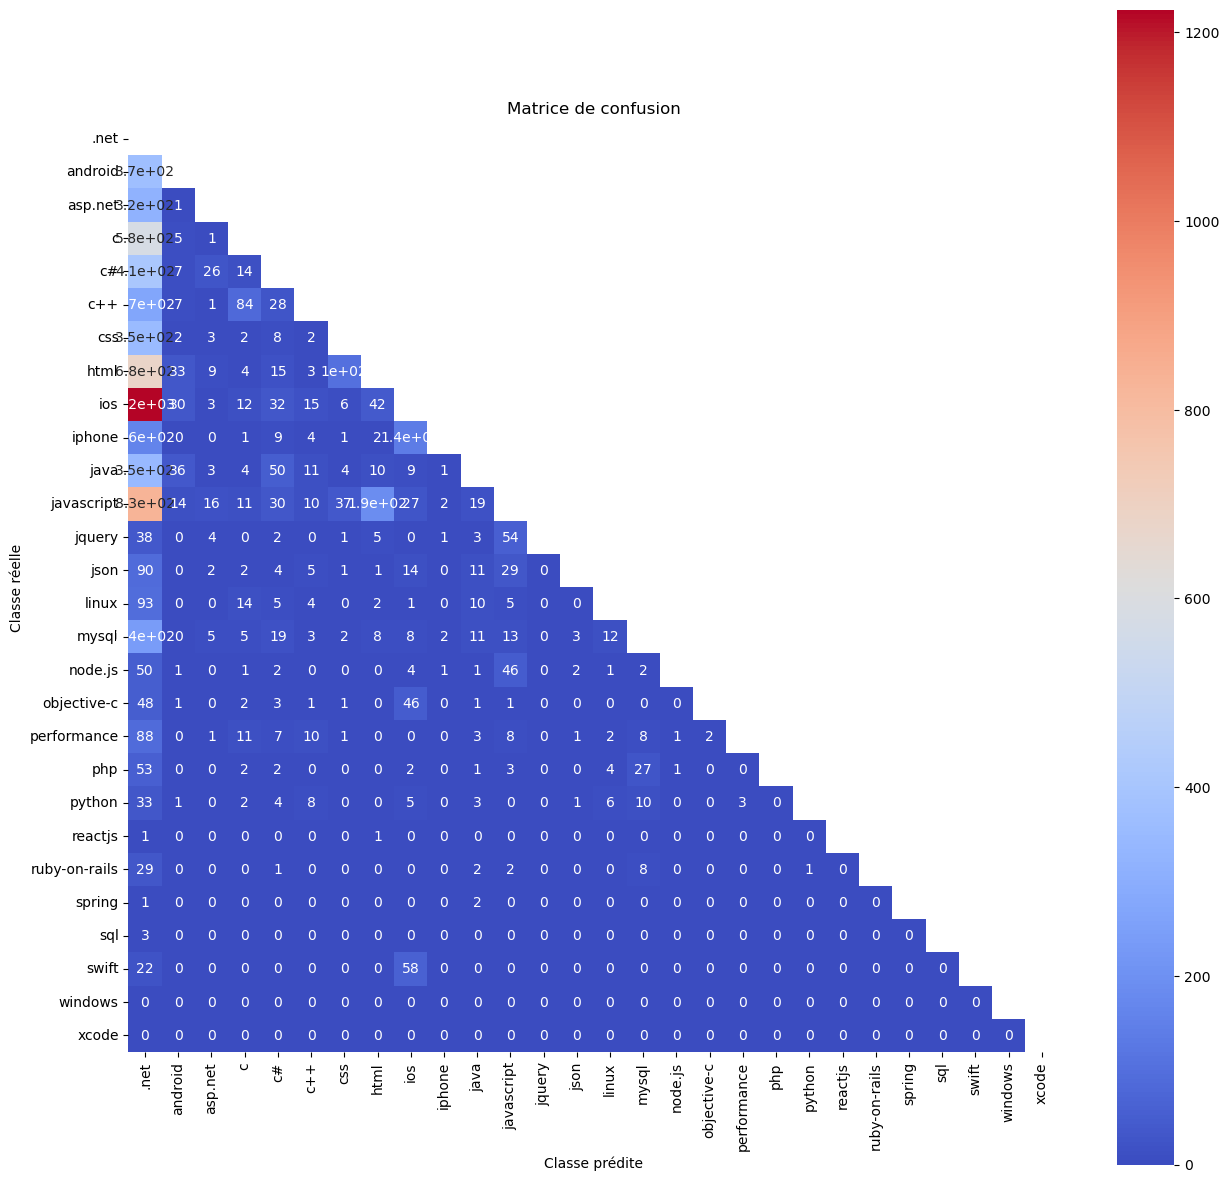

C:\Users\valdu\AppData\Local\Temp\ipykernel_7476\1449362897.py:107: RuntimeWarning: invalid value encountered in divide
  cmn_argmax = cm_argmax.astype('float') / cm_argmax.sum(axis = 1)[:, np.newaxis]


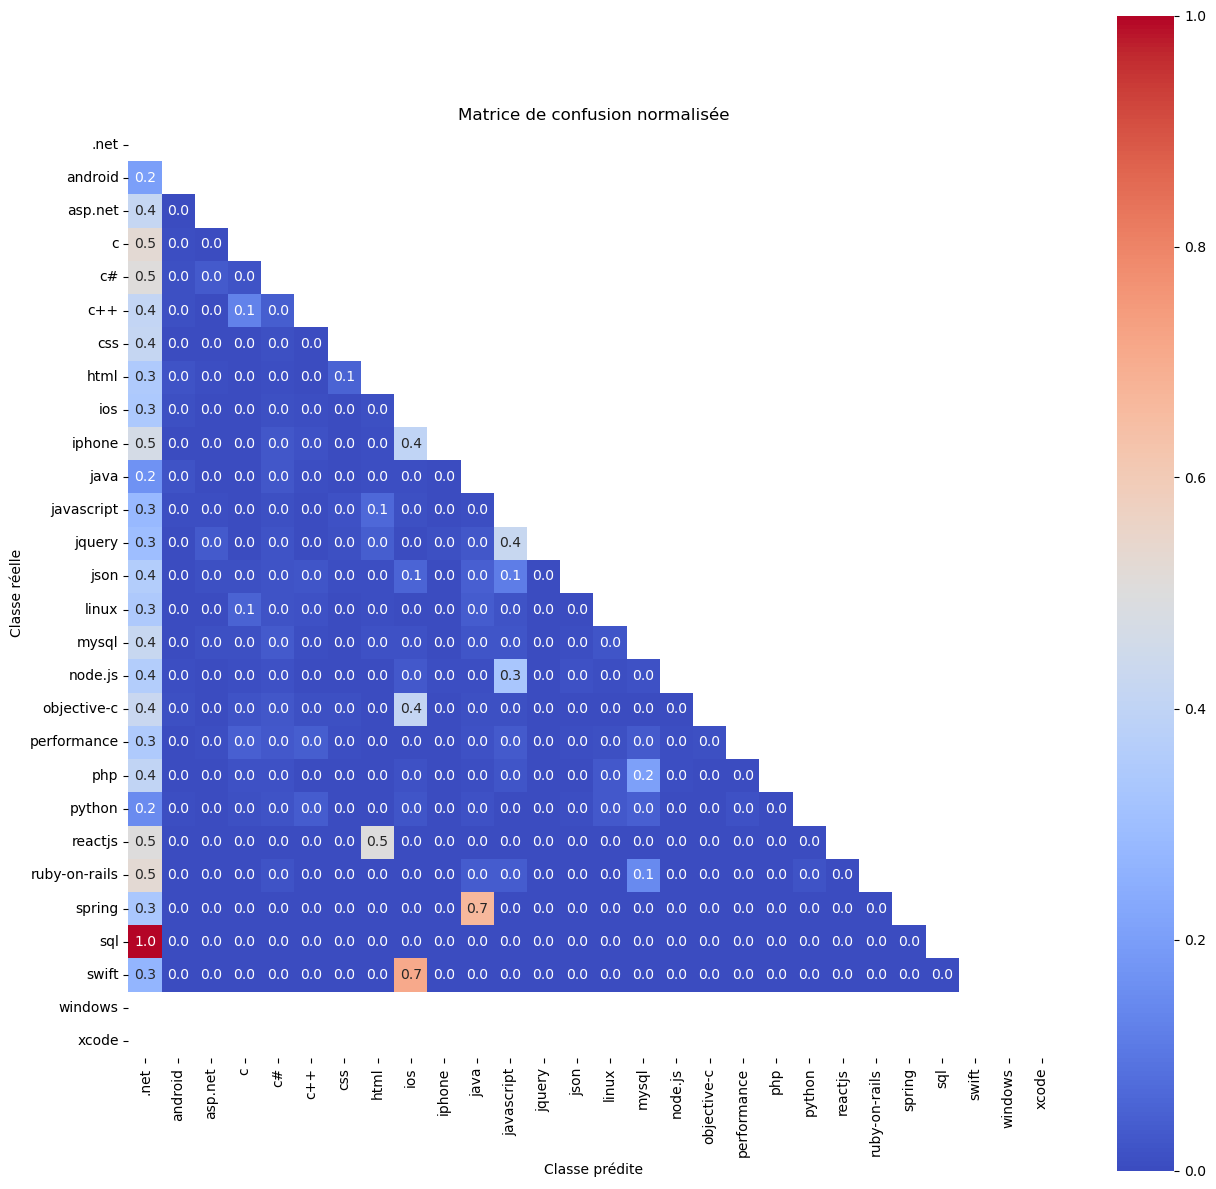

In [232]:
metriques_algo(y_test_in = y_test_stemmer,
               y_pred_in = y_pred_stemmer_LinearSVC)

In [ ]:
##################################################
#                 Données lemma                  #
##################################################

In [ ]:
# Modèle SVC
# >>>>>>> 750 composantes principales
y_pred_lemma_svc_750 = algorithme_ovr(model_in   = SVC(), 
                                      X_train_in = X_train_lemma_750, 
                                      y_train_in = y_train_lemma_750, 
                                      X_test_in  = X_test_lemma_750)

In [ ]:
metriques_algo(y_test_in = y_test_lemma_750,
               y_pred_in = y_pred_lemma_svc_750)

In [ ]:
# >>>>>>> Tout le dataset
y_pred_lemma_svc = algorithme_ovr(model_in   = SVC(),
                                  X_train_in = X_train_lemma, 
                                  y_train_in = y_train_lemma, 
                                  X_test_in  = X_test_lemma)

In [ ]:
metriques_algo(y_test_in = y_test_lemma,
               y_pred_in = y_pred_lemma_svc)

In [233]:
# Modèle LinearSVC
# >>>>>>> 750 composantes principales
y_pred_lemma_LinearSVC_750 = algorithme_ovr(model_in   = LinearSVC(), 
                                            X_train_in = X_train_lemma_750, 
                                            y_train_in = y_train_lemma_750, 
                                            X_test_in  = X_test_lemma_750) # PC : 20.438 min

C:\Users\valdu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\valdu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\valdu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\valdu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\valdu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\valdu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

Durée programme (start : 90460.234 --> stop : 91686.522 ) = 1226.288 sec ou 20.438 min



Test Set Accuracy	= 0.188 

F1 score		= 0.52 , average = micro
F1 score		= 0.403 , average = macro
F1 score		= 0.422 , average = samples
F1 score		= 0.494 , average = weighted


Jaccard score		= 0.351 , average = micro
Jaccard score		= 0.279 , average = macro
Jaccard score		= 0.362 , average = samples
Jaccard score		= 0.354 , average = weighted


Classification metrics =
               precision    recall  f1-score   support

           0       0.67      0.26      0.37      2701
           1       0.90      0.61      0.73      1848
           2       0.59      0.27      0.37       878
           3       0.65      0.21      0.32      1125
           4       0.80      0.48      0.60      3985
           5       0.65      0.22      0.33      1483
           6       0.47      0.14      0.22       872
           7       0.64      0.29      0.40      2572
           8       0.81      0.54      0.65      3900
           9       0.24      0.02      0.04      1069
          10       0.92      0

C:\Users\valdu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


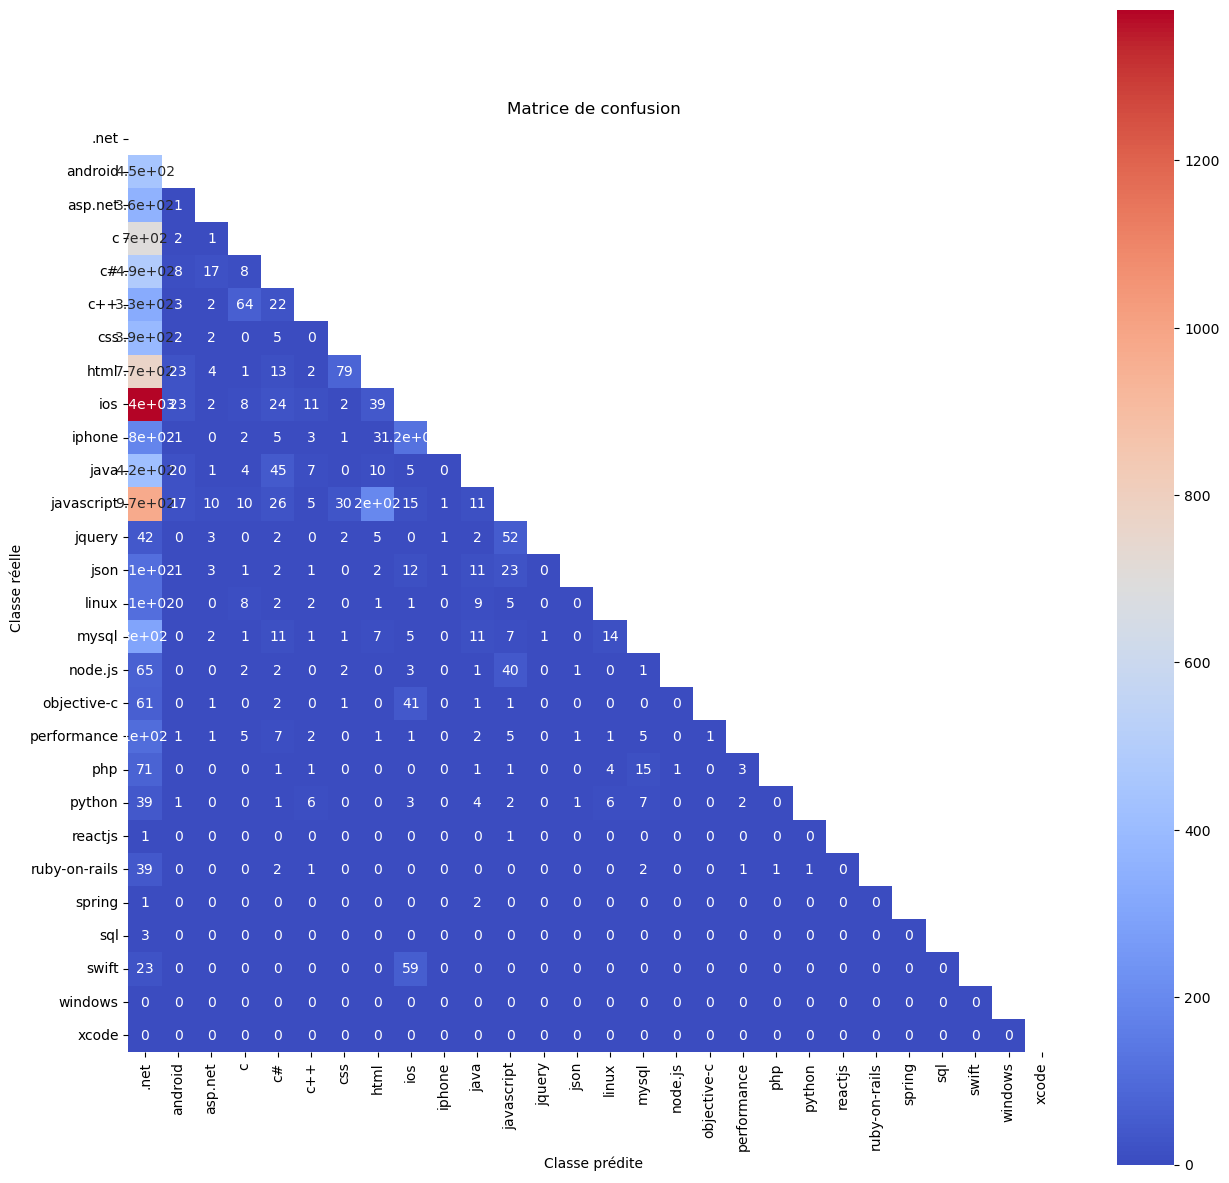

C:\Users\valdu\AppData\Local\Temp\ipykernel_7476\1449362897.py:107: RuntimeWarning: invalid value encountered in divide
  cmn_argmax = cm_argmax.astype('float') / cm_argmax.sum(axis = 1)[:, np.newaxis]


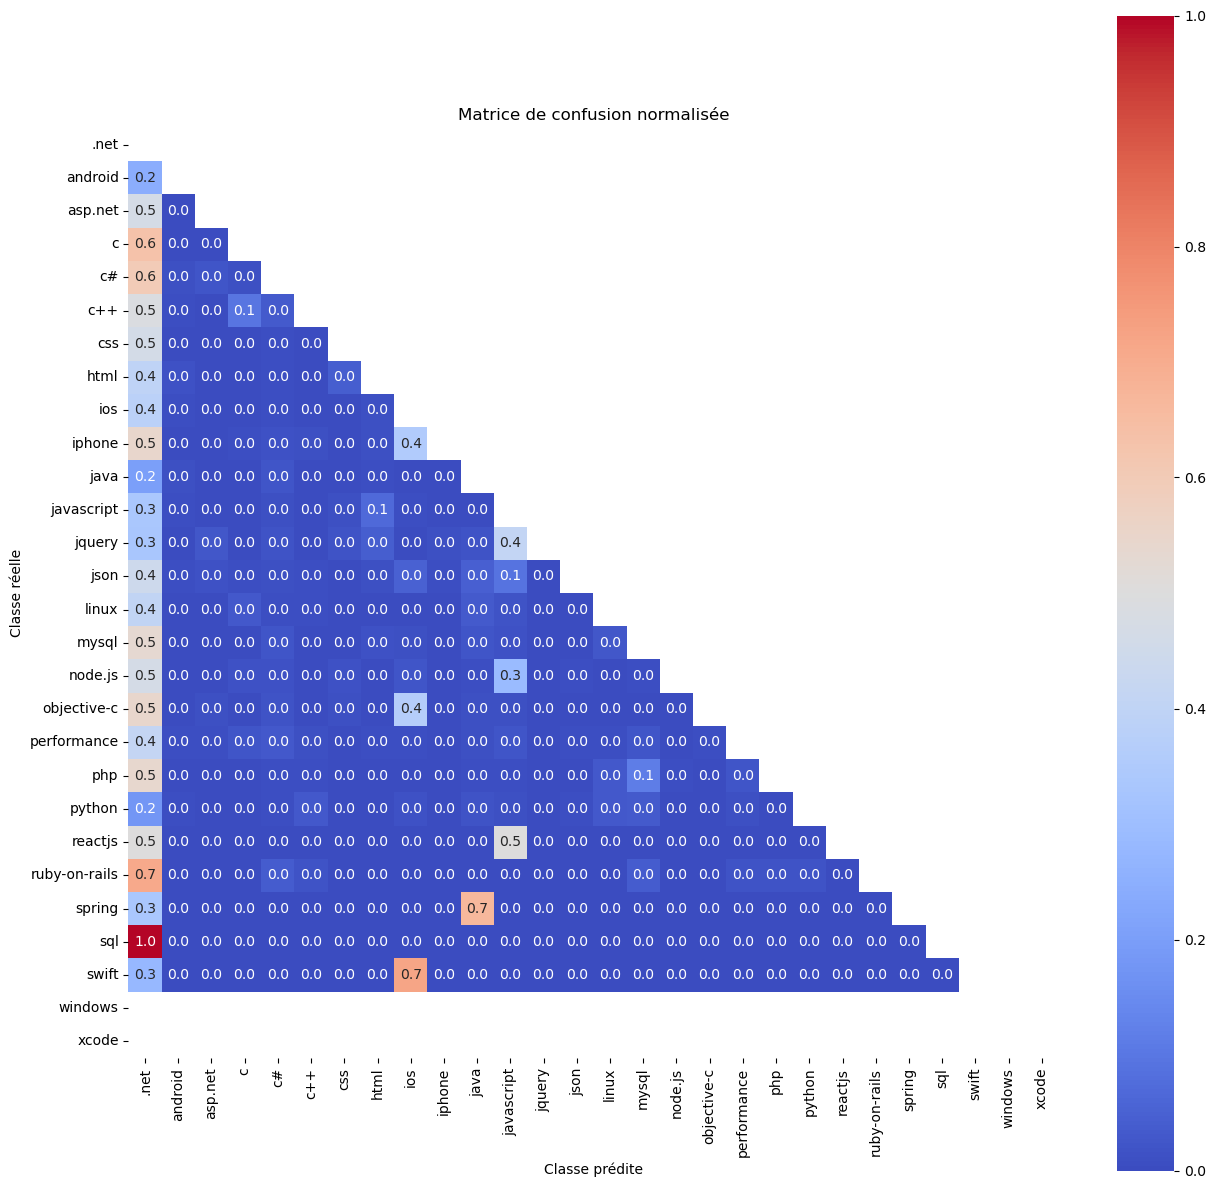

In [234]:
metriques_algo(y_test_in = y_test_lemma_750,
               y_pred_in = y_pred_lemma_LinearSVC_750)

In [76]:
# >>>>>>> Tout le dataset
y_pred_lemma_LinearSVC = algorithme_ovr(model_in   = LinearSVC(),
                                        X_train_in = X_train_lemma, 
                                        y_train_in = y_train_lemma, 
                                        X_test_in  = X_test_lemma) # PC : 15.874 min
# OK

C:\Users\valdu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\valdu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\valdu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\valdu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\valdu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\valdu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

Durée programme (start : 1688.058 --> stop : 2640.479 ) = 952.421 sec ou 15.874 min



Test Set Accuracy	= 0.269 

F1 score		= 0.482 , average = micro
F1 score		= 0.348 , average = macro
F1 score		= 0.384 , average = samples
F1 score		= 0.453 , average = weighted


Jaccard score		= 0.318 , average = micro
Jaccard score		= 0.235 , average = macro
Jaccard score		= 0.354 , average = samples
Jaccard score		= 0.32 , average = weighted




C:\Users\valdu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification metrics =
               precision    recall  f1-score   support

           0       0.42      0.05      0.10      3959
           1       0.92      0.68      0.78      5637
           2       0.56      0.20      0.29      1380
           3       0.53      0.15      0.23      2322
           4       0.76      0.37      0.50      8785
           5       0.79      0.42      0.55      5783
           6       0.52      0.21      0.30      1284
           7       0.54      0.16      0.25      3307
           8       0.72      0.33      0.46      5479
           9       0.16      0.01      0.02      1490
          10       0.81      0.45      0.58      9253
          11       0.72      0.35      0.47      8216
          12       0.42      0.09      0.14      1811
          13       0.33      0.04      0.07       999
          14       0.49      0.10      0.17      1731
          15       0.33      0.08      0.12      1061
          16       0.72      0.31      0.43      2145
 

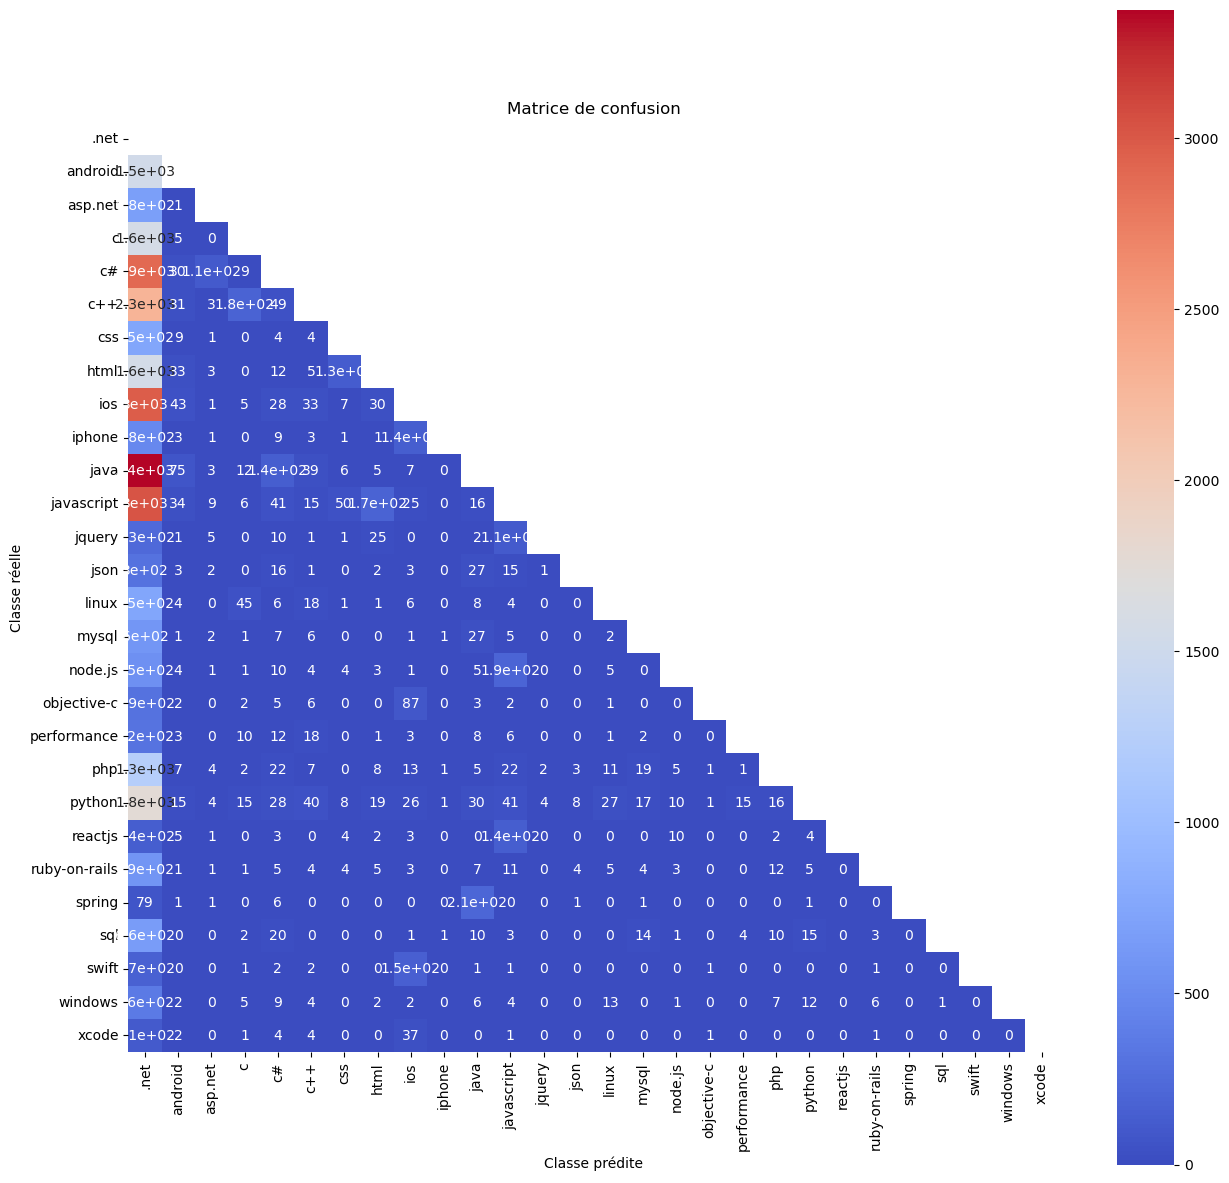

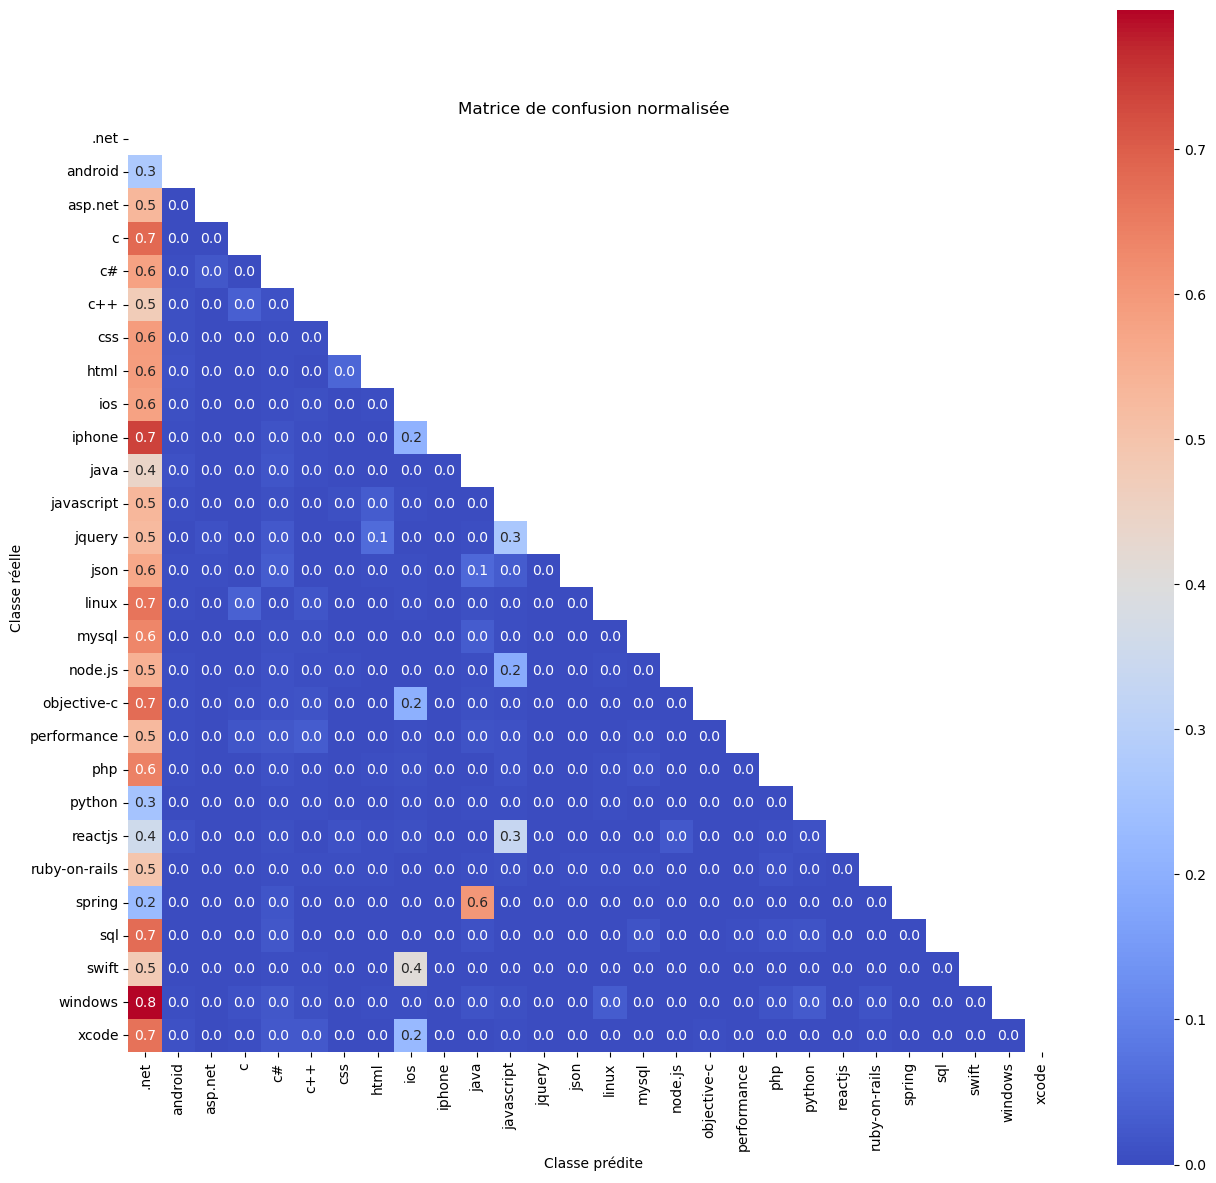

In [77]:
metriques_algo(y_test_in = y_test_lemma,
               y_pred_in = y_pred_lemma_LinearSVC)
# OK

# 3.5.2. ALGORITHME RANDOM FOREST CLASSIFIER

In [ ]:
##################################################
#                Données stemmer                 #
##################################################

In [103]:
# >>>>>>> 750 composantes principales
y_pred_stemmer_randomforest_750 = algorithme_ovr(model_in   = RandomForestClassifier(),
                                                 X_train_in = X_train_stemmer_750,
                                                 y_train_in = y_train_stemmer_750, 
                                                 X_test_in  = X_test_stemmer_750) # PC : 58 min

Durée programme (start : 17748.513 --> stop : 21247.808 ) = 3499.295 sec ou 58.322 min



In [104]:
metriques_algo(y_test_in = y_test_stemmer_750,
               y_pred_in = y_pred_stemmer_randomforest_750)

Test Set Accuracy	= 0.071 

F1 score		= 0.311 , average = micro
F1 score		= 0.18 , average = macro
F1 score		= 0.225 , average = samples
F1 score		= 0.272 , average = weighted


Jaccard score		= 0.184 , average = micro
Jaccard score		= 0.118 , average = macro
Jaccard score		= 0.186 , average = samples
Jaccard score		= 0.181 , average = weighted


Classification metrics =
               precision    recall  f1-score   support

           0       0.80      0.02      0.04      1959
           1       0.95      0.43      0.60      1322
           2       0.72      0.07      0.13       642
           3       0.85      0.01      0.03       794
           4       0.87      0.15      0.26      2896
           5       0.85      0.03      0.06      1065
           6       0.67      0.00      0.01       614
           7       0.78      0.08      0.15      1785
           8       0.88      0.29      0.44      2788
           9       0.00      0.00      0.00       761
          10       0.91      0

C:\Users\valdu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


UFuncTypeError: ufunc 'maximum' did not contain a loop with signature matching types (dtype('<U13'), dtype('<U13')) -> None

In [84]:
# >>>>>>> Tout le dataset
y_pred_stemmer_randomforest = algorithme_ovr(model_in   = RandomForestClassifier(),
                                             X_train_in = X_train_stemmer, 
                                             y_train_in = y_train_stemmer, 
                                             X_test_in  = X_test_stemmer) # PC : 39 min

NameError: name 'X_train_stemmer' is not defined

In [146]:
metriques_algo(y_test_in              = y_test_stemmer,
               y_pred_in              = y_pred_stemmer_randomforest,
               afficher_all_matrices = True)

Test Set Accuracy	= 0.251 

F1 score		= 0.59 , average = micro
F1 score		= 0.417 , average = macro
F1 score		= 0.506 , average = samples
F1 score		= 0.539 , average = weighted


Jaccard score		= 0.419 , average = micro
Jaccard score		= 0.308 , average = macro
Jaccard score		= 0.439 , average = samples
Jaccard score		= 0.413 , average = weighted


Classification metrics =
               precision    recall  f1-score   support

           0       0.76      0.31      0.44      1959
           1       0.90      0.82      0.86      1322
           2       0.70      0.28      0.40       642
           3       0.77      0.17      0.28       794
           4       0.85      0.59      0.69      2896
           5       0.76      0.26      0.38      1065
           6       0.75      0.06      0.12       614
           7       0.73      0.34      0.46      1785
           8       0.84      0.63      0.72      2788
           9       0.19      0.00      0.01       761
          10       0.88      0

C:\Users\valdu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\valdu\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


UFuncTypeError: ufunc 'maximum' did not contain a loop with signature matching types (dtype('<U11'), dtype('<U11')) -> None

In [ ]:
##################################################
#                 Données lemma                  #
##################################################

In [140]:
# >>>>>>> 750 composantes principales
y_pred_lemma_randomforest_750 = algorithme_ovr(model_in   = RandomForestClassifier(),
                                               X_train_in = X_train_lemma_750, 
                                               y_train_in = y_train_lemma_750, 
                                               X_test_in  = X_test_lemma_750) # 62 min

Durée programme (start : 59306.244 --> stop : 63058.029 ) = 3751.784 sec ou 62.530 min



In [142]:
metriques_algo(y_test_in = y_test_lemma_750,
               y_pred_in = y_pred_lemma_randomforest_750)

Test Set Accuracy	= 0.073 

F1 score		= 0.314 , average = micro
F1 score		= 0.182 , average = macro
F1 score		= 0.227 , average = samples
F1 score		= 0.275 , average = weighted


Jaccard score		= 0.186 , average = micro
Jaccard score		= 0.118 , average = macro
Jaccard score		= 0.188 , average = samples
Jaccard score		= 0.183 , average = weighted




C:\Users\valdu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\valdu\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


Classification metrics =
               precision    recall  f1-score   support

           0       0.81      0.02      0.05      1959
           1       0.94      0.41      0.57      1322
           2       0.70      0.08      0.14       642
           3       0.92      0.02      0.03       794
           4       0.88      0.16      0.27      2896
           5       0.79      0.03      0.05      1065
           6       0.60      0.00      0.01       614
           7       0.74      0.08      0.14      1785
           8       0.89      0.29      0.44      2788
           9       0.50      0.00      0.00       761
          10       0.92      0.59      0.72      2475
          11       0.83      0.35      0.49      3628
          12       0.57      0.00      0.01       900
          13       0.00      0.00      0.00       479
          14       1.00      0.01      0.01       535
          15       0.50      0.00      0.01       486
          16       0.84      0.08      0.14       885
 

UFuncTypeError: ufunc 'maximum' did not contain a loop with signature matching types (dtype('<U11'), dtype('<U11')) -> None

In [85]:
# >>>>>>> Tout le dataset
y_pred_lemma_randomforest = algorithme_ovr(model_in   = RandomForestClassifier(),
                                           X_train_in = X_train_lemma, 
                                           y_train_in = y_train_lemma, 
                                           X_test_in  = X_test_lemma) # PC : 37 min # en cours

KeyboardInterrupt: 

In [ ]:
metriques_algo(y_test_in             = y_test_lemma,
               y_pred_in             = y_pred_lemma_randomforest,
               afficher_all_matrices = True)

Test Set Accuracy	= 0.244 

F1 score		= 0.587 , average = micro
F1 score		= 0.411 , average = macro
F1 score		= 0.504 , average = samples
F1 score		= 0.534 , average = weighted


Jaccard score		= 0.415 , average = micro
Jaccard score		= 0.304 , average = macro
Jaccard score		= 0.436 , average = samples
Jaccard score		= 0.409 , average = weighted


Classification metrics =
               precision    recall  f1-score   support

           0       0.76      0.30      0.43      2701
           1       0.89      0.81      0.85      1848
           2       0.64      0.24      0.35       878
           3       0.71      0.18      0.28      1125
           4       0.85      0.58      0.69      3985
           5       0.75      0.25      0.38      1483
           6       0.77      0.06      0.11       872
           7       0.73      0.33      0.45      2572
           8       0.84      0.63      0.72      3900
           9       0.07      0.00      0.00      1069
          10       0.89      

C:\Users\valdu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Matrice de confusion totale =
 [[1769   11  104    4  654   10    0    6   24    2   45   46    0    0
     1    0    1    1    6    0   12    0    1    0    4    0    0    0]
 [ 149 1496    0    1    9    3    1   10   18    0   89   60    0    0
     0    1    0    1    0    0    2    1    1    0    0    0    0    0]
 [ 224    0  157    0  360    0    0    3    0    0    1   18    1    0
     0    0    0    0    1    0    1    0    0    0    0    0    0    0]
 [ 642    5    1  198   17  128    0    1   19    0   19    7    0    0
     9    1    0    1    6    2   53    0    1    0    0    0    0    0]
 [ 389   17   20    2  219    8    0    6   12    0   60   50    1    0
     0    0    0    0    2    2   17    1    1    0    3    0    0    0]
 [ 301   10    0   41   16  173    0    1   11    1   42   10    0    0
     6    0    0    2    6    0   48    0    0    0    0    0    0    0]
 [ 270    8    3    1    6    0   51  293   20    0    7  175    0    0
     0    0    0    0    0

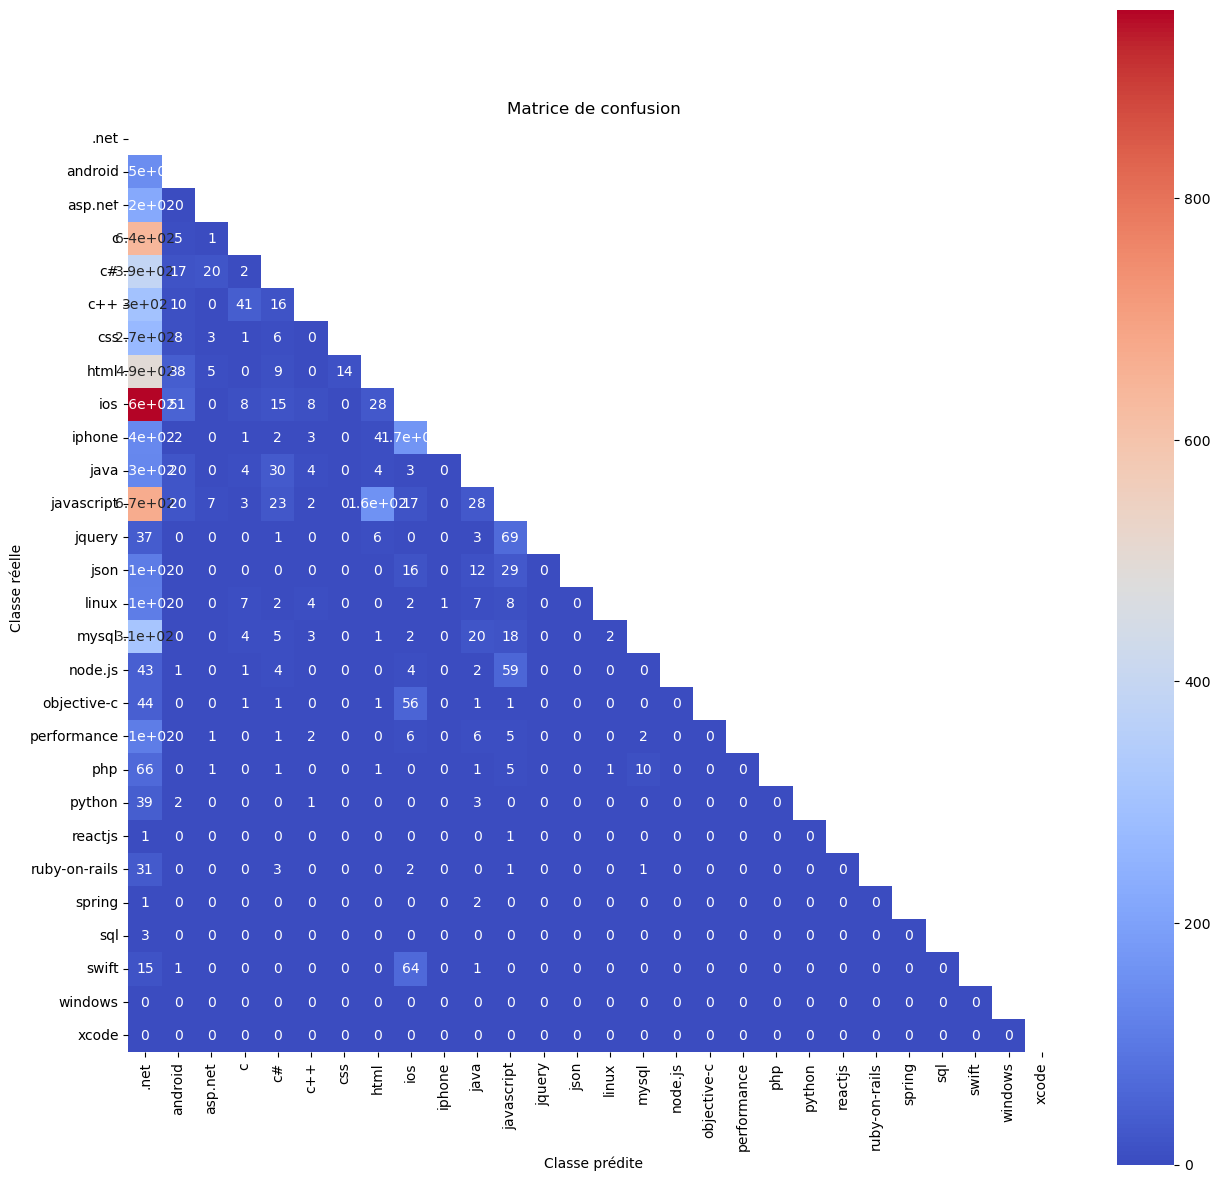

C:\Users\valdu\AppData\Local\Temp\ipykernel_7476\1449362897.py:107: RuntimeWarning: invalid value encountered in divide
  cmn_argmax = cm_argmax.astype('float') / cm_argmax.sum(axis = 1)[:, np.newaxis]


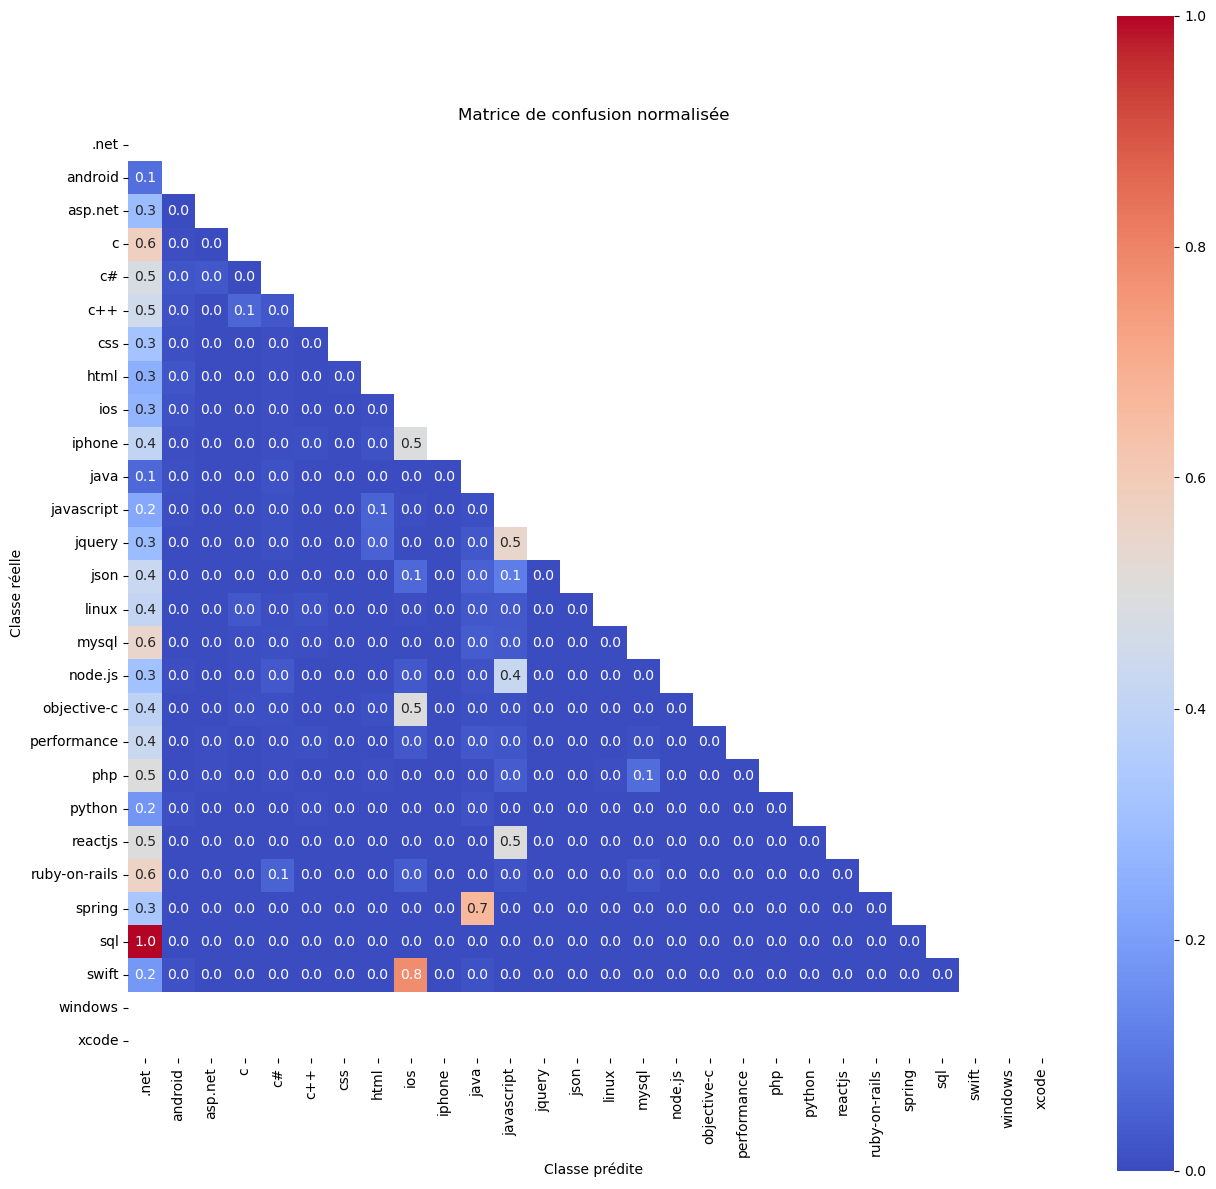

# 3.5.3. SYNTHESE ALGORITHMES

In [ ]:
Stemmer / lemma
Algo : 3



# 4. MACHINE LEARNING SUPERVISE - APPROCHE WORD / SENTENCE EMBEDDING

In [ ]:
_Text_tokens

+++++++++++++++++++++++++++++++++++++++


In [ ]:
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_

In [ ]:
# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des tweets par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des tweets par clusters')
    
    plt.show()
    print("ARI : ", ARI)

# 4.1. Word2Vec (ou Doc2Vec, Glove…)

In [ ]:
######################################################
#             Création du modèle Word2Vec            #
######################################################

In [ ]:
w2v_size = 300
w2v_window = 5
w2v_min_count = 1
w2v_epochs = 100
maxlen = 24 # adapt to length of sentences
sentences = data_T['sentence_bow_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [ ]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

In [ ]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

In [ ]:
######################################################
#        Création de la matrice d'embedding          #
######################################################

In [ ]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

In [ ]:
######################################################
#         Création du modèle d'embedding             #
######################################################

In [ ]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

In [ ]:
######################################################
#              Exécution du modèle                   #
######################################################

In [ ]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

In [ ]:
ARI, X_tsne, labels = ARI_fct(embeddings)

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# 4.2. BERT

In [ ]:
# Exemple de Word Embedding BERT via Huggingface :
# https://huggingface.co/docs/transformers/model_doc/bert#transformers.TFBertModel

# Exemple de Word Embedding BERT via le hub Tensorflow : 
# https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4

In [ ]:
https://towardsdatascience.com/text-classification-in-spark-nlp-with-bert-and-universal-sentence-encoders-e644d618ca32

# 4.3. USE - Universal Sentence Encoder

In [ ]:
# Exemple de Sentence Embedding USE (Universal Sentence Encoder) :
# https://tfhub.dev/google/universal-sentence-encoder/4

# Nous sommes dans une tâche de classification de phrases =>
# Text Classification with ClassifierDL and USE in Spark NLP

In [155]:
#!pip install tensorflow_datasets
#!pip install panda --upgrade
#!pip install jinja2 --upgrade

In [154]:
#!pip install pandas --upgrade
#import pandas as pd
#print(pd.__version__)
# 0.22.0

In [219]:
# https://krishnakshirsagar87.medium.com/text-classification-with-universal-sentence-encoder-b4bb471cc0af
# import librairies
import tensorflow as tf
#import tensorflow_datasets as tfds
import tensorflow_hub as hub
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [224]:
# Loading data
#ds = tfds.load('imdb_reviews')
#train = tfds.as_dataframe(ds['train'])
#test = tfds.as_dataframe(ds['test'])

# Loading data
# >>>>>>> X
X = df[['_Text_sans_html']].copy()
print('X shape\t\t=', X.shape)
# >>>>>>> y
y = df[['_Tag_1', '_Tag_2']].copy()
print('y shape\t\t=', y.shape, '\n')

# Découpage train / test
X_train, X_test, y_train, y_test = decoupage_train_test(X_in = X,
                                                        y_in = y)

X shape		= (60001, 1)
y shape		= (60001, 2) 

X_train shape	= (39000, 1)
X_test shape	= (21001, 1)
y_train shape	= (39000, 2)
y_test shape	= (21001, 2)


In [225]:
y.columns

Index(['_Tag_1', '_Tag_2'], dtype='object')

In [228]:
index = 9_330

print('index =', index)
print('X_train =', X_train.loc[index, '_Text_sans_html'])
print('y_train =', y_train.loc[index, '_Tag_1'], ', ', y_train.loc[index, '_Tag_2'])

index = 9330
X_train = determining stack space with visual studio i'm programming in c in visual studio 2005.  i have a multi-threaded program, but that's not especially important here.
how can i determine (approximately) how much stack space my threads use?
the technique i was planning to use is setting the stack memory to some predetermined value, say 0xdeadbeef, running the program for a long time, pausing the program, and investigating the stack.
how do i read and write stack memory with visual studio?
edit:  see, for example, "how to determine maximum stack usage."  that question talks about an embedded system, but here i'm trying to determine the answer on a regular pc.

y_train = c ,  None


In [216]:
## byte to string
#def byte_to_string(byte): return byte.decode("utf-8")
#train['text'] =  train['text'].apply(byte_to_string)
#test['text']  = test['text'].apply(byte_to_string)
#train.head(3)

# byte to string
#def byte_to_string(byte): return byte.decode("utf-8")
#X_train['_Text_sans_html'] =  X_train['_Text_sans_html'].apply(byte_to_string)
#X_test['_Text_sans_html']  = X_test['_Text_sans_html'].apply(byte_to_string)
#X_train.head(3)

In [220]:
# Initialize Universal sentence encoder as keras layer and set trainable parameter True
embedding = "https://tfhub.dev/google/universal-sentence-encoder/4" # USE (Universal Sentence Encoder)
hub_layer = hub.KerasLayer(embedding, 
                           input_shape = [], 
                           dtype       = tf.string, 
                           trainable    = True)

In [221]:
# Create Model Architecture
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(128, activation = 'elu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 256,863,617
Trainable params: 256,863,617
Non-trainable params: 0
_________________________________________________________________


In [231]:
# Model Training
model.compile(optimizer = 'adam',
              loss      = tf.keras.losses.BinaryCrossentropy(),
              metrics   = ['accuracy'])

history = model.fit(X_train['_Text_sans_html'], # train['text'], 
                    y_train['_Tag_1'], # train['label'], 
                    validation_split = 0.2, 
                    shuffle          = True, 
                    epochs           = 4,
                    batch_size       = 1024)

Epoch 1/4


UnimplementedError: Graph execution error:

Detected at node 'binary_crossentropy/Cast' defined at (most recent call last):
    File "C:\Users\valdu\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\valdu\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\valdu\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\valdu\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\valdu\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\valdu\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\valdu\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\valdu\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\valdu\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\valdu\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\valdu\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\valdu\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\valdu\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\valdu\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\valdu\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\valdu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "C:\Users\valdu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\Users\valdu\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\valdu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\valdu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\valdu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\valdu\AppData\Local\Temp\ipykernel_16212\462857426.py", line 6, in <module>
      history = model.fit(X_train['_Text_sans_html'], # train['text'],
    File "C:\Users\valdu\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\valdu\anaconda3\lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\valdu\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\valdu\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\valdu\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\valdu\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\valdu\anaconda3\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "C:\Users\valdu\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\valdu\anaconda3\lib\site-packages\keras\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\valdu\anaconda3\lib\site-packages\keras\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\valdu\anaconda3\lib\site-packages\keras\losses.py", line 2145, in binary_crossentropy
      y_true = tf.cast(y_true, y_pred.dtype)
Node: 'binary_crossentropy/Cast'
Cast string to float is not supported
	 [[{{node binary_crossentropy/Cast}}]] [Op:__inference_train_function_25587]

In [223]:
y_train.shape

(39000, 27)

In [ ]:
# Classification Report on Test Data
prediction = model.predict(test['text'])>0.5
print(classification_report(np.array(test['label']),prediction,labels=[0,1]))


In [121]:
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
X_train, X_test, y_train, y_test

print('index =', index, ':', X_train.loc[index, '_Text_sans_html'])

In [ ]:
df.columns

In [ ]:
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [90]:
# https://www.tensorflow.org/hub/tutorials/semantic_similarity_with_tf_hub_universal_encoder?hl=fr
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
# https://www.tensorflow.org/hub/tutorials/semantic_similarity_with_tf_hub_universal_encoder?hl=fr
word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
messages = [word, sentence, paragraph]

# Reduce logging output.
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(messages)

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
  print("Message: {}".format(messages[i]))
  print("Embedding size: {}".format(len(message_embedding)))
  message_embedding_snippet = ", ".join(
      (str(x) for x in message_embedding[:3]))
  print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

In [ ]:
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [88]:
import tensorflow_hub as hub

# Collection of universal sentence encoders trained on variety of data :
# https://tfhub.dev/google/collections/universal-sentence-encoder/1
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

embeddings = embed([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"])

print(embeddings)

# The following are example embedding output of 512 dimensions per sentence
# Embedding for: The quick brown fox jumps over the lazy dog.
# [-0.03133016 -0.06338634 -0.01607501, ...]
# Embedding for: I am a sentence for which I would like to get its embedding.
# [0.05080863 -0.0165243   0.01573782, ...]

tf.Tensor(
[[-0.03133016 -0.06338632 -0.016075   ... -0.0324278  -0.04575741
   0.05370456]
 [ 0.05080861 -0.01652432  0.01573778 ...  0.00976656  0.03170119
   0.01788119]], shape=(2, 512), dtype=float32)


In [89]:
corpus = ["The quick brown fox jumps over the lazy dog.",
          "I am a sentence for which I would like to get its embedding", 
           "bonjour, le petit chat est là"]
embeddings = embed(corpus)

print(embeddings)

for i in np.arange(0, len(corpus)):
    print('corpus', i, ':', corpus[i])
    print('embeddings', i, embeddings[i])

tf.Tensor(
[[-0.03133017 -0.06338634 -0.01607498 ... -0.03242778 -0.04575739
   0.05370455]
 [ 0.05080862 -0.01652432  0.01573777 ...  0.00976657  0.03170118
   0.01788119]
 [-0.05057357  0.03782574 -0.01385834 ... -0.02626352 -0.03489861
   0.00120708]], shape=(3, 512), dtype=float32)
corupus 0 : The quick brown fox jumps over the lazy dog.
embeddings 0 tf.Tensor(
[-3.13301720e-02 -6.33863360e-02 -1.60749778e-02 -1.03489542e-02
 -4.65009920e-02  3.72315869e-02  5.91586391e-03  7.17439950e-02
  1.66644510e-02  6.09076433e-02  6.65525869e-02  2.37051193e-02
  5.76497579e-04  5.68431988e-02  2.41616722e-02 -5.33625204e-03
  4.70477045e-02  1.92157198e-02  7.68255293e-02  5.66959335e-03
 -7.52822086e-02 -1.71372462e-02 -7.50271082e-02  7.63734803e-02
 -5.43795973e-02 -1.38909102e-03 -1.83018651e-02 -4.67204005e-02
 -4.72413823e-02  2.70678326e-02  3.23333926e-02  5.53706251e-02
  3.37095447e-02 -1.37066050e-02  5.52704558e-03 -8.22692439e-02
  1.41951051e-02  6.82791397e-02  1.83205288e-0

In [ ]:
@@@@@@@@@@@@@@@@@@@@@@@@@ NB OC

In [ ]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [ ]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")  # USE

In [ ]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [ ]:
batch_size = 10
sentences = data_T['sentence_dl'].to_list()

In [ ]:
features_USE = feature_USE_fct(sentences, batch_size)

In [ ]:
ARI, X_tsne, labels = ARI_fct(features_USE)

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)